In [ ]:
1.Quantum mechanics

In [ ]:
(* 2d potential well *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

sigmap=0.01;
V0=100;
{px0,py0}={0.1,0.1};
{tIni,tEnd}={0,50000};
{xMin,xMax}={-1000,1000};
{yMin,yMax}={-600,600};

packet[px_,py_]=(1/2*Pi/sigmap^2)*Exp[-((px-px0)^2+(py-py0)^2)/2/sigmap^2];
psiIni[x_,y_]=Exp[-sigmap^2*(x^2+y^2)/2]*Exp[I*(px0*x+py0*y)];
V[x_,y_]=V0*(1-HeavisideTheta[x-xMin]*HeavisideTheta[xMax-x]*HeavisideTheta[y-yMin]*HeavisideTheta[yMax-y]);

psi=NDSolveValue[{I*Derivative[1,0,0][psi][t,x,y]==-(1/2/m^2)*(Derivative[0,2,0][psi][t,x,y]+Derivative[0,0,2][psi][t,x,y]),psi[tIni,x,y]==psiIni[x,y],psi[t,xMin,y]==psiIni[xMin,y],psi[t,xMax,y]==psiIni[xMax,y],psi[t,x,yMin]==psiIni[x,yMin],psi[t,x,yMax]==psiIni[x,yMax]},psi,{t,tIni,tEnd},{x,xMin,xMax},{y,yMin,yMax},Method->{"MethodOfLines","SpatialDiscretization"->{"TensorProductGrid","MinPoints"->200,"MaxPoints"->200}}];

tblplt=Table[
{xC,yC}={Sum[x*Abs[psi[t,x,y]]^2,{x,xMin,xMax,(xMax-xMin)/100},{y,yMin,yMax,(yMax-yMin)/100}],Sum[y*Abs[psi[t,x,y]]^2,{x,xMin,xMax,(xMax-xMin)/100},{y,yMin,yMax,(yMax-yMin)/100}]}/Sum[Abs[psi[t,x,y]]^2,{x,xMin,xMax,(xMax-xMin)/100},{y,yMin,yMax,(yMax-yMin)/100}];
DensityPlot[Abs[psi[t,x,y]]^2,{x,xMin,xMax},{y,yMin,yMax},AspectRatio->0.6,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.15+0.85*#1]&),ColorFunctionScaling->None,Epilog->Inset[Style["★",Yellow,12],{xC,yC}],FrameTicks->None,ImageSize->200,PlotPoints->200,PlotRange->All],
{t,tIni,tEnd,(tEnd-tIni)/200}];
tblplt[[1]]
Export["1_potential_well.gif",tblplt];

tblplt=Table[
{xC,yC}={
If[t<10000,px0*t,If[t<30000,1000-px0*(t-10000),If[t<50000,-1000+px0*(t-30000),If[t<70000,1000-px0*(t-50000),If[t<90000,-1000+px0*(t-70000),1000-px0*(t-90000)]]]]],
If[t<6000,py0*t,If[t<18000,600-py0*(t-6000),If[t<30000,-600+py0*(t-18000),If[t<42000,600-py0*(t-30000),If[t<54000,-600+py0*(t-42000),If[t<66000,600-py0*(t-54000),If[t<78000,-600+py0*(t-66000),If[t<90000,600-py0*(t-78000),-600+py0*(t-90000)]]]]]]]]
};
DensityPlot[0,{x,xMin,xMax},{y,yMin,yMax},AspectRatio->0.6,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.15+0.85*#1]&),ColorFunctionScaling->None,Epilog->Inset[Style["★",Yellow,12],{xC,yC}],FrameTicks->None,ImageSize->200,PlotPoints->10,PlotRange->All],
{t,tIni,tEnd,(tEnd-tIni)/200}];
tblplt[[1]]
Export["1_potential_well_classical.gif",tblplt];


-Graphics-
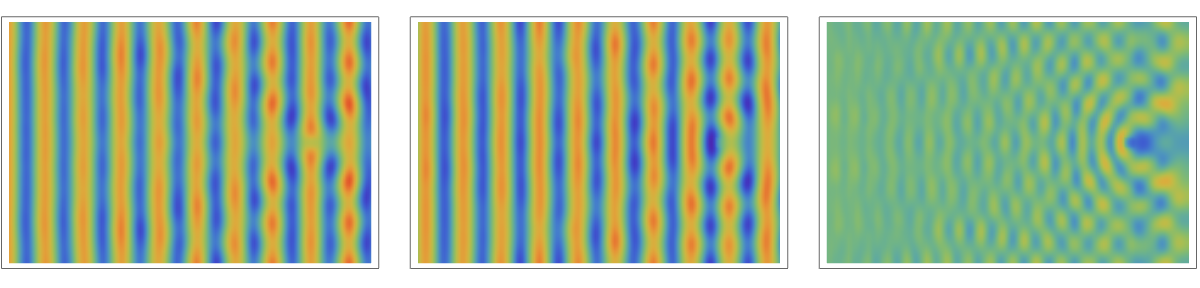

In [37]:
(* 2d potential well: scattering *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;
Off[General::munfl];

{tIni,tEnd}={0,10000};

tblplt=Table[
tbl=Import["2d_scattering/_t="<>ToString[1000*t]<>".dat"];
GraphicsGrid[{{
ListDensityPlot[{#[[4]],#[[5]],#[[6]]}&/@tbl,AspectRatio->2/3,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.5+0.3*#[[3]]]&),ColorFunctionScaling->None,FrameTicks->None,ImageSize->200,PlotRange->All],
ListDensityPlot[{#[[4]],#[[5]],#[[7]]}&/@tbl,AspectRatio->2/3,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.5+0.3*#[[3]]]&),ColorFunctionScaling->None,FrameTicks->None,ImageSize->200,PlotRange->All],
ListDensityPlot[{#[[4]],#[[5]],#[[6]]^2+#[[7]]^2}&/@tbl,AspectRatio->2/3,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.15+0.3*#[[3]]]&),ColorFunctionScaling->None,FrameTicks->None,ImageSize->200,PlotRange->All]
}},ImageSize->600],
{t,tIni,tEnd,100}];
tblplt[[-1]]
Export["1_scattering.gif",tblplt];


-Graphics-
-Graphics-
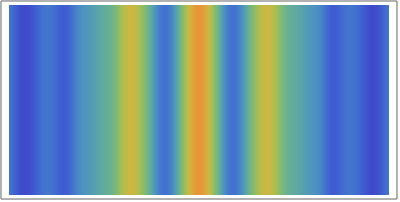
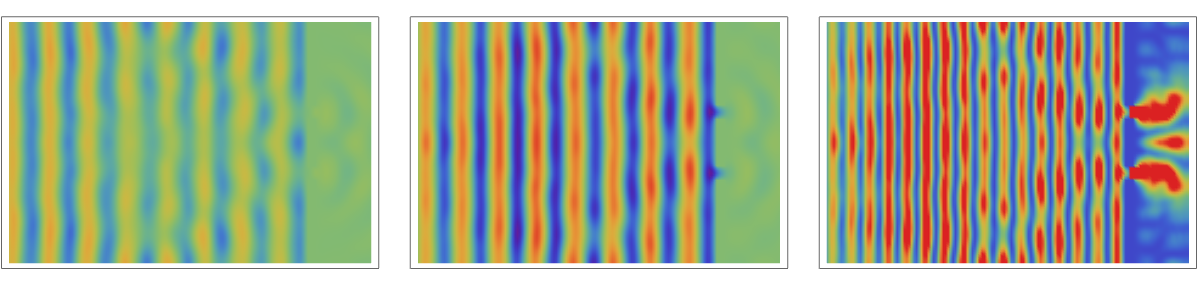

In [46]:
(* 2d potential well: Tonomura *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;
Off[General::munfl];

t=10000;
tbl=Import["2d_Tonomura/_t="<>ToString[1000*t]<>".dat"];
tbl=Select[tbl,#[[4]]>97&];
ListDensityPlot[Join[{#[[5]],-100,100*(#[[6]]^2+#[[7]]^2)}&/@tbl,{#[[5]],100,100*(#[[6]]^2+#[[7]]^2)}&/@tbl],AspectRatio->0.5,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.15+0.2*#[[3]]]&),ColorFunctionScaling->None,FrameTicks->None,ImageSize->200,PlotRange->All]

{tIni,tEnd}={0,10000};

tblplt=Table[
tbl=Import["2d_Tonomura/_t="<>ToString[1000*t]<>".dat"];
GraphicsGrid[{{
ListDensityPlot[{#[[4]],#[[5]],#[[6]]}&/@tbl,AspectRatio->2/3,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.5+0.2*#[[3]]]&),ColorFunctionScaling->None,FrameTicks->None,ImageSize->200,PlotRange->All],
ListDensityPlot[{#[[4]],#[[5]],#[[7]]}&/@tbl,AspectRatio->2/3,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.5+0.2*#[[3]]]&),ColorFunctionScaling->None,FrameTicks->None,ImageSize->200,PlotRange->All],
ListDensityPlot[{#[[4]],#[[5]],If[#[[4]]<0,#[[6]]^2+#[[7]]^2,100*(#[[6]]^2+#[[7]]^2)]}&/@tbl,AspectRatio->2/3,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.15+0.2*#[[3]]]&),ColorFunctionScaling->None,FrameTicks->None,ImageSize->200,PlotRange->All]
}},ImageSize->600],
{t,tIni,tEnd,100}];
tblplt[[-1]]
Export["1_Tonomura.gif",tblplt];


-Graphics-
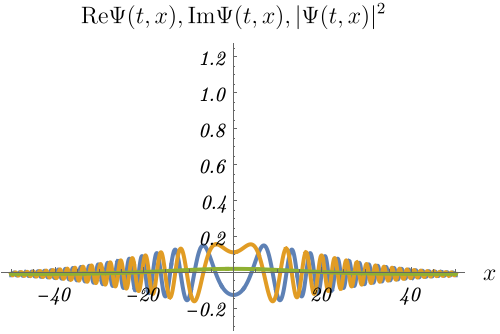

In [354]:
(* free particle *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;
Off[General::munfl];

a=0.5;
p0=0;
PsiIni[x_]:=Pi^(-1/4)*a^(-1/2)*Exp[I*p0*x-x^2/2/a^2];
PsiSol[t_,x_]:=Pi^(-1/4)*(a+I*t/a)^(-1/2)*Exp[a*(I*p0*x-x^2/2/a^2-I*p0^2*t/2)/(a+I*t/a)];

{tIni,tEnd}={0,10};
{xMin,xMax}={-50,50};
Quiet[Psi=NDSolveValue[{I*Derivative[1,0][Psi][t,x]==-(1/2)*Derivative[0,2][Psi][t,x],Psi[tIni,x]==PsiIni[x],Psi[t,xMin]==PsiIni[xMin],Psi[t,xMax]==PsiIni[xMax]},Psi,{t,tIni,tEnd},{x,xMin,xMax},Method->{"MethodOfLines","SpatialDiscretization"->{"TensorProductGrid","MinPoints"->500,"MaxPoints"->500}}]];

tblplt=Table[
Plot[{Im[PsiSol[t,x]],Re[PsiSol[t,x]],Abs[PsiSol[t,x]]^2},{x,xMin,xMax},
AxesLabel->MaTeX[{"x","{\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},
BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->250,PlotRange->{-0.3*PsiIni[0],1.2*PsiIni[0]},PlotStyle->({#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"])],
{t,tIni,tEnd,0.2}
];
tblplt[[-1]]
Export["1_free_particle.gif",tblplt];


In [ ]:
2.Time-independent Schroedinger equation

-Graphics-
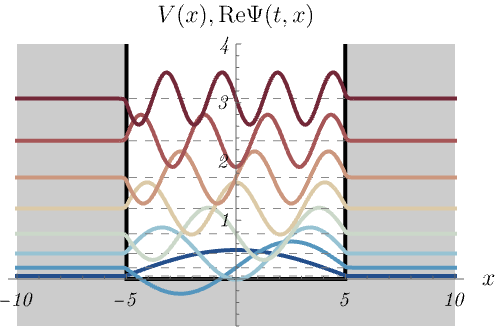

In [62]:
(* infinite well *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=100;
{xMin,xMax}={-10,10};
V[x_]=V0*(HeavisideTheta[xMin/2-x]+HeavisideTheta[x-xMax/2]);

{ev,ef}=NDEigensystem[{-(1/2)*phi''[x]+V[x]*phi[x]},phi[x],{x,xMin,xMax},8,Method->{"SpatialDiscretization"->{"FiniteElement",{"MeshOptions"->{"MaxCellMeasure"->0.1}}}}];
sign=Sign[ef/.{x->4.9}];
ef=ef/sign;

tblplt=Table[
Show[
Plot[{V[x],-100},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotRange->{-0.8,4},PlotStyle->Black],
Table[Plot[{ev[[i]],ev[[i]]+Re[Exp[-I*ev[[i]]*t]*ef[[i]]]},{x,xMin,xMax},PlotRange->All,PlotStyle->{{Gray,Dashed,Thickness[0.002]},ColorData["RedBlueTones"][1-(i-1)/7]}],{i,1,8}]
],
{t,0,2*Pi/ev[[1]]-2*Pi/ev[[1]]/200,2*Pi/ev[[1]]/200}
];
tblplt[[1]]
Export["2_infinite_well.gif",tblplt];


-Graphics-
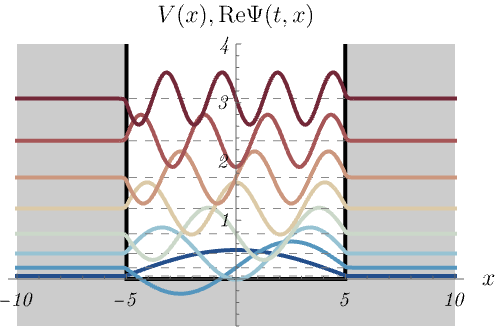

In [61]:
(* infinite well *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=100;
{xMin,xMax}={-10,10};
V[x_]=V0*(HeavisideTheta[xMin/2-x]+HeavisideTheta[x-xMax/2]);

{ev,ef}=NDEigensystem[{-(1/2)*phi''[x]+V[x]*phi[x]},phi[x],{x,xMin,xMax},8,Method->{"SpatialDiscretization"->{"FiniteElement",{"MeshOptions"->{"MaxCellMeasure"->0.1}}}}];
sign=Sign[ef/.{x->4.9}];
ef=ef/sign;

tblplt=Table[
Show[
Plot[{V[x],-100},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotRange->{-0.8,4},PlotStyle->Black],
Table[Plot[{ev[[i]],ev[[i]]+Re[Exp[-I*ev[[i]]*t]*ef[[i]]]},{x,xMin,xMax},PlotRange->All,PlotStyle->{{Gray,Dashed,Thickness[0.002]},ColorData["RedBlueTones"][1-(i-1)/7]}],{i,1,8}]
],
{t,0,0}
];
tblplt[[1]]
Export["2_infinite_well_material.pdf",tblplt];


-Graphics-
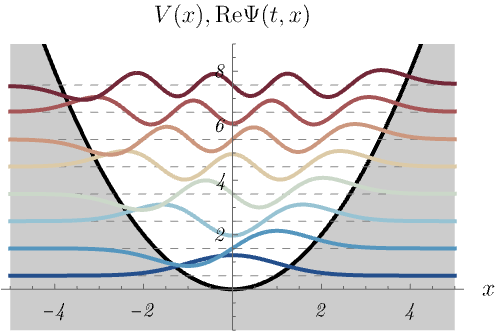

In [88]:
(* harmonic oscillator *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

{xMin,xMax}={-5,5};
V[x_]=x^2/2;

{ev,ef}=NDEigensystem[{-(1/2)*phi''[x]+V[x]*phi[x]},phi[x],{x,xMin,xMax},8,Method->{"SpatialDiscretization"->{"FiniteElement",{"MeshOptions"->{"MaxCellMeasure"->0.1}}}}];
sign=Sign[ef/.{x->4}];
ef=ef/sign;

tblplt=Table[
Show[
Plot[{V[x],-100},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Filling->{1->{2}},ImageSize->250,PlotRange->{-1.5,9},PlotStyle->Black],
Table[Plot[{ev[[i]],ev[[i]]+Re[Exp[-I*ev[[i]]*t]*ef[[i]]]},{x,xMin,xMax},PlotRange->All,PlotStyle->{{Gray,Dashed,Thickness[0.002]},ColorData["RedBlueTones"][1-(i-1)/7]}],{i,1,8}]
],
{t,0,2*Pi/ev[[1]]-2*Pi/ev[[1]]/200,2*Pi/ev[[1]]/200}
];
tblplt[[1]]
Export["2_harmonic_oscillator.gif",tblplt];


-Graphics-
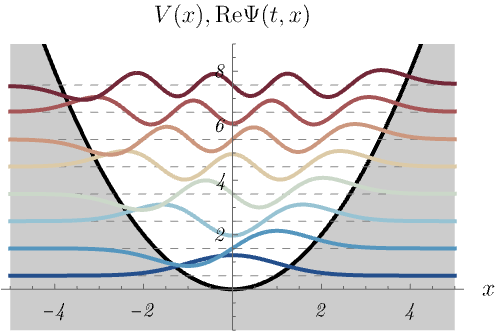

In [74]:
(* harmonic oscillator *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

{xMin,xMax}={-5,5};
V[x_]=x^2/2;

{ev,ef}=NDEigensystem[{-(1/2)*phi''[x]+V[x]*phi[x]},phi[x],{x,xMin,xMax},8,Method->{"SpatialDiscretization"->{"FiniteElement",{"MeshOptions"->{"MaxCellMeasure"->0.1}}}}];
sign=Sign[ef/.{x->4}];
ef=ef/sign;

tblplt=Table[
Show[
Plot[{V[x],-100},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Filling->{1->{2}},ImageSize->250,PlotRange->{-1.5,9},PlotStyle->Black],
Table[Plot[{ev[[i]],ev[[i]]+Re[Exp[-I*ev[[i]]*t]*ef[[i]]]},{x,xMin,xMax},PlotRange->All,PlotStyle->{{Gray,Dashed,Thickness[0.002]},ColorData["RedBlueTones"][1-(i-1)/7]}],{i,1,8}]
],
{t,0,0}
];
tblplt[[1]]
Export["2_harmonic_oscillator_material.pdf",tblplt[[1]]];


-Graphics-
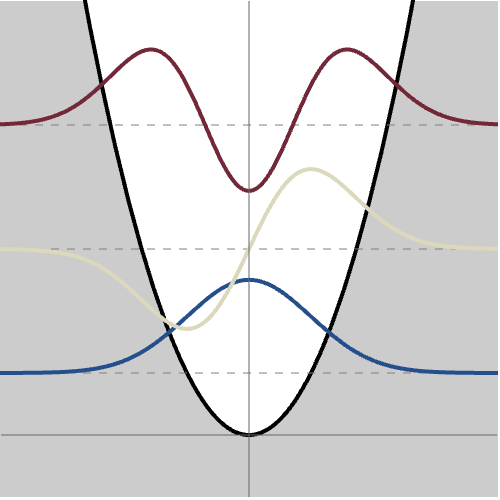

In [229]:
(* harmonic oscillator *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

{xMin,xMax}={-5,5};
V[x_]=x^2/2;

{ev,ef}=NDEigensystem[{-(1/2)*phi''[x]+V[x]*phi[x]},phi[x],{x,xMin,xMax},8,Method->{"SpatialDiscretization"->{"FiniteElement",{"MeshOptions"->{"MaxCellMeasure"->0.1}}}}];
sign=Sign[ef/.{x->4}];
ef=ef/sign;

tblplt=Table[
Show[
Plot[{V[x],-100},{x,xMin,xMax},AspectRatio->1,AxesLabel->None,BaseStyle->{FontFamily->"Latin Modern Roman"},Filling->{1->{2}},ImageSize->250,PlotRange->{{-4,4},{-0.5,3.5}},PlotStyle->Black,Ticks->None],
Table[Plot[{ev[[i]],ev[[i]]+Re[Exp[-I*ev[[i]]*t]*ef[[i]]]},{x,xMin,xMax},PlotRange->All,PlotStyle->{{Gray,Dashed,Thickness[0.002]},ColorData["RedBlueTones"][1-(i-1)/2]}],{i,1,3}]
],
{t,0,0}
];
tblplt[[1]]
Export["2_harmonic_oscillator_material_2.pdf",tblplt[[1]]];


-Graphics-
2_erfc_material.pdf
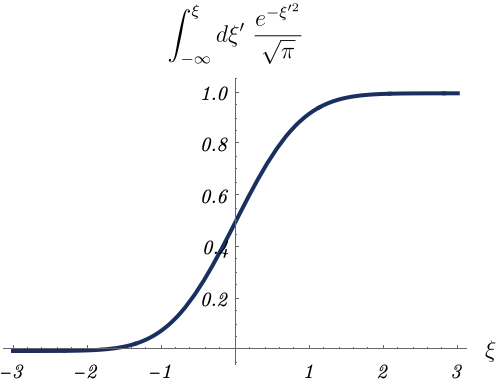
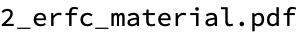

In [346]:
(* harmonic oscillator *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

plt=Plot[(1 + Erf[xi])/2,{xi,-3,3},AxesLabel->MaTeX[{"\\xi","\\int_{- \\infty}^{\\xi} d\\xi'~\\frac{e^{- \\xi'^2}}{\\sqrt{\\pi}}"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->250,PlotStyle->konjo];
plt
Export["2_erfc_material.pdf",plt]


-Graphics-
-Graphics-
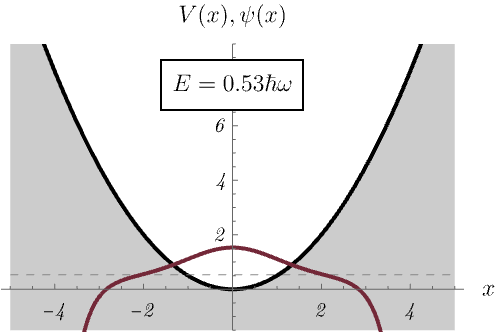
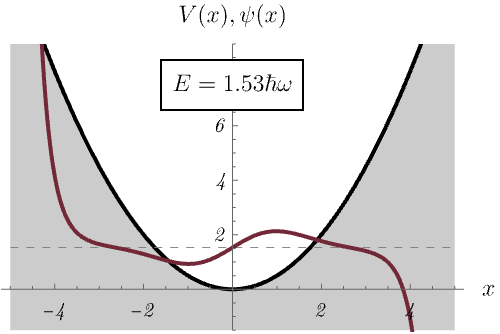

In [375]:
(* harmonic oscillator *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

{xMin,xMax}={-5,5};
V[x_]=x^2/2;

tblplt=Flatten[Table[
Clear[phi];
En=0.46+0.01*iEn;
phi=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[0]==1,phi'[0]==0},phi,{x,xMin,xMax}];
Table[
Show[
Plot[{V[x],-100},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Filling->{1->{2}},Epilog->Inset[Framed[Style[MaTeX["E="<>StringPadRight[ToString[N[Round[10^4*En]/10^4]],4,"0"]<>"\\hbar \\omega"]],Background->White],{0,7.5}],ImageSize->250,PlotRange->{-1.5,9},PlotStyle->Black],
Plot[En,{x,xMin,xMax},PlotStyle->{Gray,Dashed,Thickness[0.002]}],
Plot[En+phi[x],{x,-xPR,xPR},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][1-(iEn-1)/6]]
],
{xPR,1,5,0.2}],
{iEn,1,7}]];

tblplt[[-1]]
Export["2_harmonic_oscillator_level1.gif",tblplt];

tblplt=Flatten[Table[
Clear[phi];
En=1.46+0.01*iEn;
phi=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[0]==0,phi'[0]==1},phi,{x,xMin,xMax}];
Table[
Show[
Plot[{V[x],-100},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Filling->{1->{2}},Epilog->Inset[Framed[Style[MaTeX["E="<>StringPadRight[ToString[N[Round[10^4*En]/10^4]],4,"0"]<>"\\hbar \\omega"]],Background->White],{0,7.5}],ImageSize->250,PlotRange->{-1.5,9},PlotStyle->Black],
Plot[En,{x,xMin,xMax},PlotStyle->{Gray,Dashed,Thickness[0.002]}],
Plot[En+phi[x],{x,-xPR,xPR},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][1-(iEn-1)/6]]
],
{xPR,1,5,0.2}],
{iEn,1,7}]];

tblplt[[-1]]
Export["2_harmonic_oscillator_level2.gif",tblplt];


-Graphics-
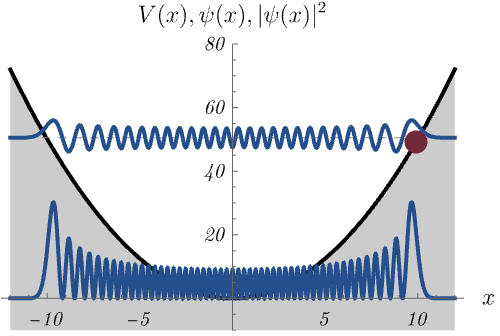

In [112]:
(* harmonic oscillator *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

{xMin,xMax}={-12,12};
V[x_]=x^2/2;
En=50+0.5;

phi=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[0]==-3,phi'[0]==0},phi,{x,xMin,xMax}];

tblplt=Table[
Show[
Plot[{V[x],-100},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), \\psi(x), |\\psi(x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{ColorData["RedBlueTones"][0],PointSize[0.05],Point[{10*Cos[t],V[10*Cos[t]]}]},Filling->{1->{2}},ImageSize->250,PlotRange->{-10,80},PlotStyle->Black],
Plot[{En,En+phi[x],Abs[phi[x]]^2},{x,xMin,xMax},PlotStyle->{{Gray,Dashed,Thickness[0.002]},ColorData["RedBlueTones"][1],ColorData["RedBlueTones"][1]}]
],
{t,0,2*Pi-2*Pi/50,2*Pi/50}];

tblplt[[-1]]
Export["2_harmonic_oscillator_oscillation.gif",tblplt];


-Graphics-
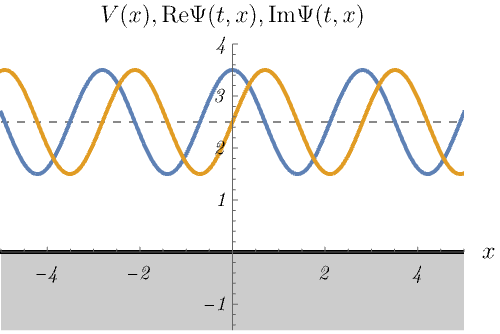

In [330]:
(* potential well: large energy  *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

{xMin,xMax}={-5,5};
 
tblplt=Flatten[Table[
En=0.1*iEn;
p=Sqrt[2*En];
Plot[{0,-100,En,En+Re[Exp[I*(p*x-En*t)]],En+Im[Exp[I*(p*x-En*t)]]},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotRange->{{xMin,xMax},{-1.5,4}},PlotStyle->({Black,Black,{Black,Dashed,Thickness[0.002]},#[[1]],#[[2]]}&@ColorData[97,"ColorList"])],
{iEn,5,25},{t,0,2*Pi/(0.1*iEn),0.1*2*Pi}
]];
tblplt[[-1]]
Export["2_plane_wave.gif",tblplt];


-Graphics-
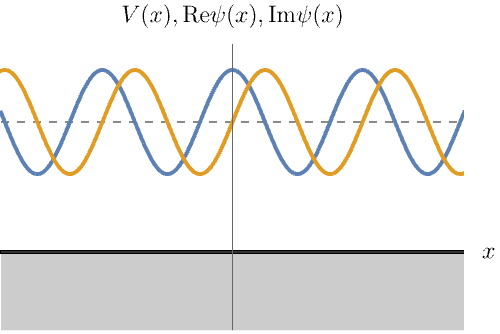

In [353]:
(* potential well: large energy  *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

{xMin,xMax}={-5,5};
 
tblplt=Flatten[Table[
En=0.1*iEn;
p=Sqrt[2*En];
Plot[{0,-100,En,En+Re[Exp[I*(p*x-En*t)]],En+Im[Exp[I*(p*x-En*t)]]},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\psi(x), {\\rm Im}\\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotRange->{{xMin,xMax},{-1.5,4}},PlotStyle->({Black,Black,{Black,Dashed,Thickness[0.002]},#[[1]],#[[2]]}&@ColorData[97,"ColorList"]),Ticks->None],
{iEn,25,25},{t,0,0}
]];
tblplt[[-1]]
Export["2_plane_wave_material.pdf",tblplt[[1]]];


-Graphics-
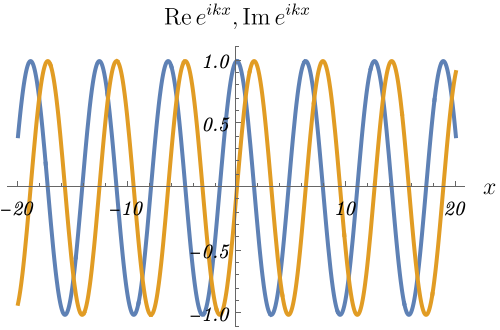

In [78]:
(* wave packet *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

p=1;
plt=Plot[{Re[Exp[I*p*x]],Im[Exp[I*p*x]]},{x,-20,20},AxesLabel->MaTeX[{"x","{\\rm Re}\,e^{ikx}, {\\rm Im}\,e^{ikx}"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->250];

plt
Export["2_wave_packet_plane_wave.gif",plt];


-Graphics-
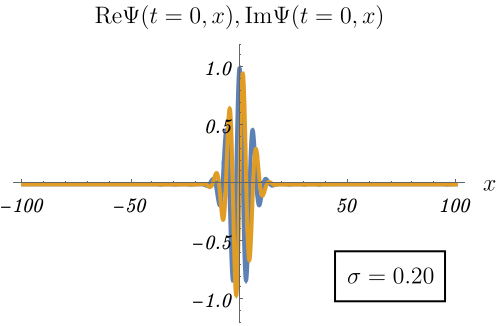

In [1684]:
(* wave packet *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

p0=1;
packet[p_]:=(1/Sqrt[2*Pi]/sigmap)*Exp[-(p-p0)^2/2/sigmap^2];
psi[x_]:=E^(I*p0*x - (sigmap^2*x^2)/2);(* Integrate[Exp[I*p*x]*packet[p],{p,-Infinity,Infinity}] *)

plt={};
For[isigmap=2,isigmap<=40,isigmap++,
sigmap=0.005*isigmap;
AppendTo[plt,Plot[{Re[psi[x]],Im[psi[x]]},{x,-100,100},AxesLabel->MaTeX[{"x","{\\rm Re}\\Psi(t = 0, x), {\\rm Im}\\Psi(t = 0, x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->250,PlotRange->{-1.2,1.2},Epilog->Inset[Framed[Style[MaTeX["\\sigma="<>StringPadRight[ToString[N[Round[10^4*sigmap]/10^4]],4,"0"]]],Background->White],{70,-0.8}]]];
];

plt[[-1]]
Export["2_wave_packet_sigma.gif",plt];


-Graphics-
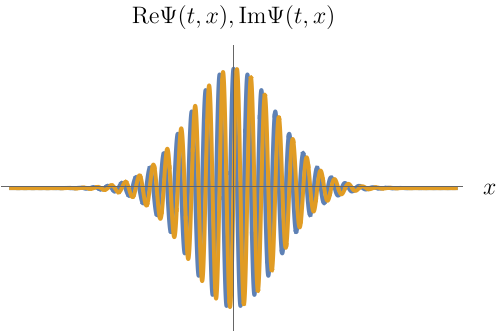

In [23]:
(* wave packet *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

p0=1;
packet[p_]:=(1/Sqrt[2*Pi]/sigmap)*Exp[-(p-p0)^2/2/sigmap^2];
psi[x_]:=E^(I*p0*x - (sigmap^2*x^2)/2);(* Integrate[Exp[I*p*x]*packet[p],{p,-Infinity,Infinity}] *)

plt={};
For[isigmap=10,isigmap<=10,isigmap++,
sigmap=0.005*isigmap;
AppendTo[plt,Plot[{Re[psi[x]],Im[psi[x]]},{x,-100,100},AxesLabel->MaTeX[{"x","{\\rm Re}\\Psi(t, x), {\\rm Im}\\Psi(t, x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->250,PlotPoints->200,PlotRange->{-1.2,1.2},Ticks->None]];
];

plt[[-1]]
Export["2_wave_packet_sigma_material.pdf",plt[[1]]];


-Graphics-
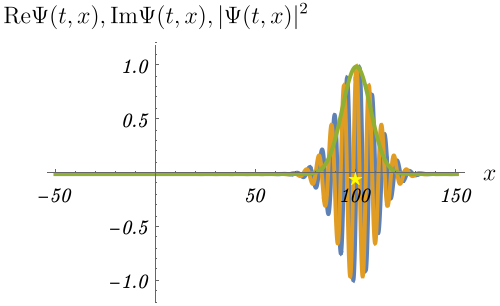

In [330]:
(* wave packet: massless *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

sigmap=0.1;
p0=1;

packet[p_]:=(1/Sqrt[2*Pi]/sigmap)*Exp[-(p-p0)^2/2/sigmap^2];
Psi[t_,x_]:=E^(-1/2*(((2*I)*p0 + sigmap^2*(t - x))*(t - x)));(* Integrate[Exp[-I*omega[p]*t]*Exp[I*p*x]*packet[p],{p,-Infinity,Infinity}] *)

{tIni,tEnd}={0,100};
{xMin,xMax}={-50,150};
tblplt=Table[
Plot[{Im[Psi[t,x]],Re[Psi[t,x]],Abs[Psi[t,x]]^2},{x,xMin,xMax},AxesLabel->MaTeX[{"x","{\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->Inset[Style["★",Yellow,12],{t,0}],ImageSize->250,PlotRange->{-1.2,1.2},PlotStyle->({#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"])],
{t,tIni,tEnd,1}];
tblplt[[-1]]
Export["2_wave_packet_photon.gif",tblplt];


-Graphics-
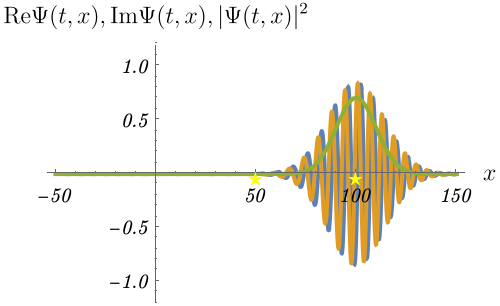

In [29]:
(* wave packet: massive *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

sigmap=0.1;
p0=1;

packet[p_]:=(1/Sqrt[2*Pi]/sigmap)*Exp[-(p-p0)^2/2/sigmap^2];
PsiIni[x_]:=Exp[I*p0*x]*Exp[-sigmap^2*x^2/2];(* Integrate[Exp[I*p*x]*packet[p],{p,-Infinty,Infinity}] *)

{tIni,tEnd}={0,100};
{xMin,xMax}={-50,150};
Psi=NDSolveValue[{I*Derivative[1,0][Psi][t,x]==-(1/2)*Derivative[0,2][Psi][t,x],Psi[tIni,x]==PsiIni[x],Psi[t,xMin]==PsiIni[xMin],Psi[t,xMax]==PsiIni[xMax]},Psi,{t,tIni,tEnd},{x,xMin,xMax},Method->{"MethodOfLines","SpatialDiscretization"->{"TensorProductGrid","MinPoints"->500,"MaxPoints"->500}}];

tblplt=Table[
Plot[{Im[Psi[t,x]],Re[Psi[t,x]],Abs[Psi[t,x]]^2},{x,xMin,xMax},AxesLabel->MaTeX[{"x","{\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Style["★",Yellow,12],{p0*t,0}],Inset[Style["★",Yellow,12],{(p0/2)*t,0}]},ImageSize->250,PlotRange->{-1.2,1.2},PlotStyle->({#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"])],
{t,tIni,tEnd,1}
];
tblplt[[-1]]
Export["2_wave_packet_electron.gif",tblplt];


-Graphics-
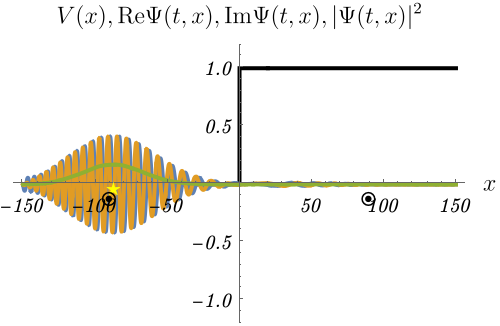

In [312]:
(* wave packet: reflection *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;
Off[General::munfl];

sigmap=0.2;
V0=1;
x0=-60;
p0=1;
En=p0^2/2;
V[x_]=V0*HeavisideTheta[x];

packet[p_]=(1/Sqrt[2*Pi]/sigmap)*Exp[-(p-p0)^2/2/sigmap^2];
PsiIni[x_]=Exp[I*p0*x]*Exp[-sigmap^2*(x-x0)^2/2];

{tIni,tEnd}={0,150};
{xMin,xMax}={-150,150};
Psi=NDSolveValue[{I*Derivative[1,0][Psi][t,x]==-(1/2)*Derivative[0,2][Psi][t,x]+V[x]*Psi[t,x],Psi[tIni,x]==PsiIni[x],Psi[t,xMin]==PsiIni[xMin],Psi[t,xMax]==PsiIni[xMax]},Psi,{t,tIni,tEnd},{x,xMin,xMax},Method->{"MethodOfLines","SpatialDiscretization"->{"TensorProductGrid","MinPoints"->500,"MaxPoints"->500}}];

tblplt=Table[
xC=Sum[x*Abs[Psi[t,x]]^2,{x,xMin,xMax,(xMax-xMin)/100}]/Sum[Abs[Psi[t,x]]^2,{x,xMin,xMax,(xMax-xMin)/100}];
Plot[{V[x],Re[Psi[t,x]],Im[Psi[t,x]],Abs[Psi[t,x]]^2},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},
Epilog->{Inset[Style["★",Yellow,12],{xC,0}],Inset[Style["⦿",Black,12],{x0+p0*t,-0.1}],Inset[Style["⦿",Black,12],{If[t<60,x0+p0*t,-p0*(t-60)],-0.1}]},Exclusions->None,ImageSize->250,PlotPoints->100,PlotRange->{-1.2,1.2},PlotStyle->({Black,#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"])],
{t,tIni,tEnd,2}];
tblplt[[-1]]
Export["2_wave_packet_reflection.gif",tblplt];


-Graphics-
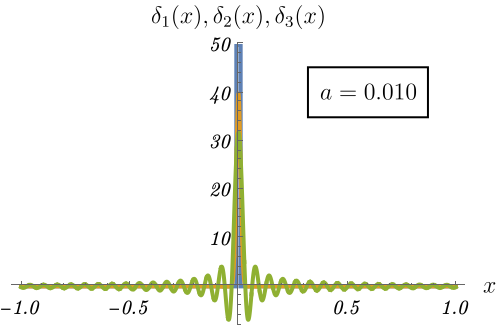

In [1661]:
(* delta function *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

delta1[a_,x_]:=(1/2/a)*HeavisideTheta[x+a]*HeavisideTheta[a-x];
delta2[a_,x_]:=(1/Sqrt[2*Pi*a^2])*Exp[-x^2/2/a^2];
delta3[a_,x_]:=Sin[x/a]/Pi/x;

a=0.1;
plt={};
For[ia=1,ia<=40,ia++,
a=0.1^(ia/20);
AppendTo[plt,Plot[{delta1[a,x],delta2[a,x],delta3[a,x]},{x,-1,1},AxesLabel->MaTeX[{"x","\\delta_1(x), \\delta_2(x), \\delta_3(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->Inset[Framed[Style[MaTeX["a="<>StringPadRight[ToString[N[Round[10^4*a]/10^4]],5,"0"]]],Background->White],{0.6,40}],Exclusions->None,ImageSize->250,PlotPoints->200,PlotRange->{-8,50}]];
]

plt[[-1]]
Export["2_delta.gif",plt];


-Graphics-
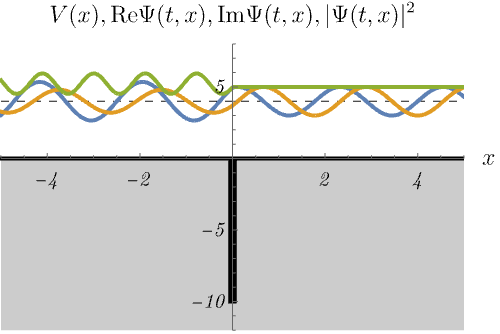

In [1498]:
(* delta well: large energy *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=10;
V[x_]=V0*(HeavisideTheta[x-0.05]+HeavisideTheta[-x-0.05]-1);

{xMin,xMax}={-5,5};
For[iEn=0,iEn<=20,iEn++,
En=2+iEn*0.1;
phiSol[En]=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[xMax]==1,phi'[xMax]/phi[xMax]==I*Sqrt[2*En]},phi,{x,xMin,xMax}];
Psi[iEn_,t_,x_]:=Exp[-I*En*t]*phiSol[En][x];
];

tblplt=Flatten[Table[
En=2+iEn*0.1;
Plot[{V[x],-100,En,En+Re[Psi[iEn,t,x]],En+Im[Psi[iEn,t,x]],En+Abs[Psi[iEn,t,x]]^2},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotPoints->200,PlotRange->{{xMin,xMax},{-12,8}},PlotStyle->({Black,Black,{Black,Dashed,Thickness[0.002]},#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"])],
{iEn,0,20},{t,0,2*Pi/2-2*Pi/20,2*Pi/20}
]];

tblplt[[-1]]
Export["2_delta_well_large.gif",tblplt];


-Graphics-
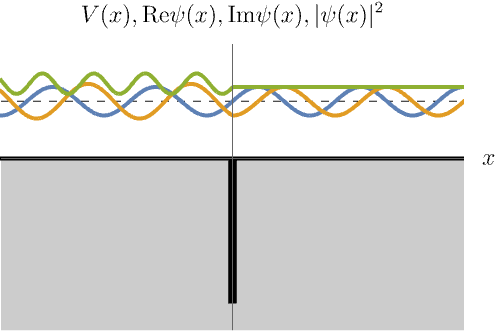

In [223]:
(* delta well: large energy *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=10;
V[x_]=V0*(HeavisideTheta[x-0.05]+HeavisideTheta[-x-0.05]-1);

{xMin,xMax}={-5,5};
For[iEn=0,iEn<=20,iEn++,
En=2+iEn*0.1;
phiSol[En]=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[xMax]==1,phi'[xMax]/phi[xMax]==I*Sqrt[2*En]},phi,{x,xMin,xMax}];
Psi[iEn_,t_,x_]:=Exp[-I*En*t]*phiSol[En][x];
];

tblplt=Flatten[Table[
En=2+iEn*0.1;
Plot[{V[x],-100,En,En+Re[Psi[iEn,t,x]],En+Im[Psi[iEn,t,x]],En+Abs[Psi[iEn,t,x]]^2},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\psi(x), {\\rm Im}\\psi(x), |\\psi(x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotPoints->200,PlotRange->{{xMin,xMax},{-12,8}},PlotStyle->({Black,Black,{Black,Dashed,Thickness[0.002]},#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"]),Ticks->None],
{iEn,20,20},{t,0,0}
]];

tblplt[[-1]]
Export["2_delta_well_large_material.pdf",tblplt[[1]]];


-Graphics-
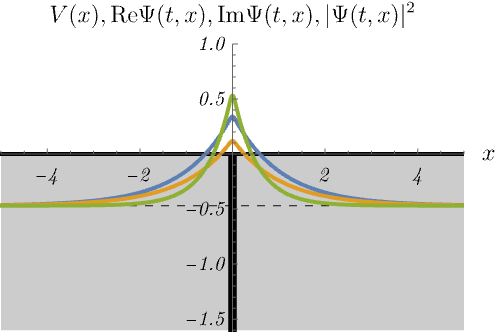

In [1439]:
(* delta well: small energy *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=10;
En=-0.469;
V[x_]=V0*(HeavisideTheta[x-0.05]+HeavisideTheta[-x-0.05]-1);

{xMin,xMax}={-5,5};
phiSol=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[0]==1,phi'[0]==0},phi,{x,xMin,xMax}];
Psi[iEn_,t_,x_]:=Exp[-I*En*t]*phiSol[x];

tblplt=Flatten[Table[
Plot[{V[x],-100,En,En+Re[Psi[iEn,t,x]],En+Im[Psi[iEn,t,x]],En+Abs[Psi[iEn,t,x]]^2},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotPoints->200,PlotRange->{{xMin,xMax},{-1.6,1}},PlotStyle->({Black,Black,{Black,Dashed,Thickness[0.002]},#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"])],
{iEn,0,0},{t,0,2*Pi/En-2*Pi/En/10,2*Pi/En/10}
]];
tblplt[[-1]]
Export["2_delta_well_small.gif",tblplt];


-Graphics-
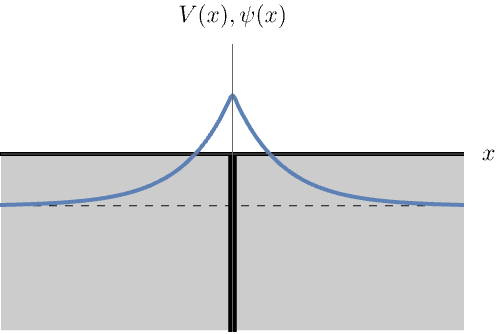

In [199]:
(* delta well: small energy *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=10;
En=-0.469;
V[x_]=V0*(HeavisideTheta[x-0.05]+HeavisideTheta[-x-0.05]-1);

{xMin,xMax}={-5,5};
phiSol=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[0]==1,phi'[0]==0},phi,{x,xMin,xMax}];
Psi[iEn_,t_,x_]:=Exp[-I*En*t]*phiSol[x];

tblplt=Flatten[Table[
Plot[{V[x],-100,En,En+Re[Psi[iEn,t,x]]},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotPoints->200,PlotRange->{{xMin,xMax},{-1.6,1}},PlotStyle->({Black,Black,{Black,Dashed,Thickness[0.002]},#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"]),Ticks->None],
{iEn,0,0},{t,0,0}
]];
tblplt[[-1]]
Export["2_delta_well_small_material.pdf",tblplt[[1]]];


-Graphics-
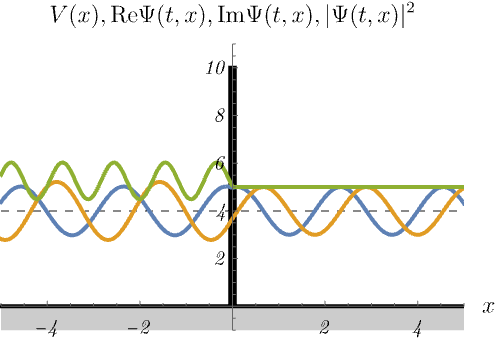

In [1575]:
(* delta barrier *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=10;
V[x_]=V0*(1-HeavisideTheta[x-0.05]-HeavisideTheta[-x-0.05]);

{xMin,xMax}={-5,5};
For[iEn=0,iEn<=20,iEn++,
En=2+iEn*0.1;
phiSol[En]=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[xMax]==1,phi'[xMax]/phi[xMax]==I*Sqrt[2*En]},phi,{x,xMin,xMax}];
Psi[iEn_,t_,x_]:=Exp[-I*En*t]*phiSol[En][x];
];

tblplt=Flatten[Table[
En=2+iEn*0.1;
Plot[{V[x],-100,En,En+Re[Psi[iEn,t,x]],En+Im[Psi[iEn,t,x]],En+Abs[Psi[iEn,t,x]]^2},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotPoints->200,PlotRange->{{xMin,xMax},{-1,11}},PlotStyle->({Black,Black,{Black,Dashed,Thickness[0.002]},#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"])],
{iEn,0,20},{t,0,2*Pi/2-2*Pi/20,2*Pi/20}
]];

tblplt[[-1]]
Export["2_delta_barrier.gif",tblplt];


-Graphics-
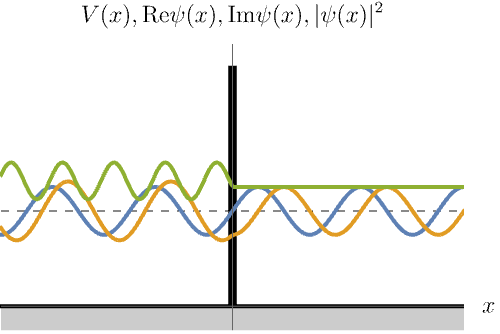

In [188]:
(* delta barrier *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=10;
V[x_]=V0*(1-HeavisideTheta[x-0.05]-HeavisideTheta[-x-0.05]);

{xMin,xMax}={-5,5};
For[iEn=0,iEn<=20,iEn++,
En=2+iEn*0.1;
phiSol[En]=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[xMax]==1,phi'[xMax]/phi[xMax]==I*Sqrt[2*En]},phi,{x,xMin,xMax}];
Psi[iEn_,t_,x_]:=Exp[-I*En*t]*phiSol[En][x];
];

tblplt=Flatten[Table[
En=2+iEn*0.1;
Plot[{V[x],-100,En,En+Re[Psi[iEn,t,x]],En+Im[Psi[iEn,t,x]],En+Abs[Psi[iEn,t,x]]^2},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\psi(x), {\\rm Im}\\psi(x), |\\psi(x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotPoints->200,PlotRange->{{xMin,xMax},{-1,11}},PlotStyle->({Black,Black,{Black,Dashed,Thickness[0.002]},#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"]),Ticks->None],
{iEn,0,20},{t,0,0}
]];

tblplt[[-1]]
Export["2_delta_barrier_material.pdf",tblplt[[1]]];


-Graphics-
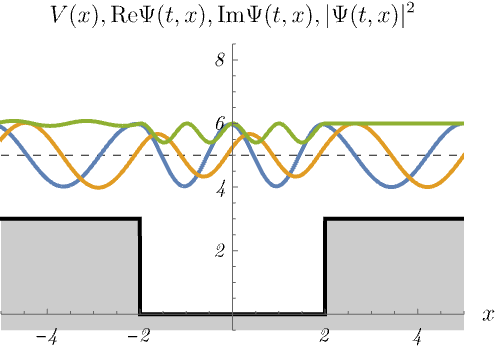

In [96]:
(* potential well: large energy  *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=3;
En=4;
V[x_]=V0*(HeavisideTheta[x-2]+HeavisideTheta[-x-2]);

{xMin,xMax}={-5,5};
For[iEn=0,iEn<=10,iEn++,
En=5+iEn*0.1;
phiSol[En]=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[xMax]==1,phi'[xMax]/phi[xMax]==I*Sqrt[2*(En-V0)]},phi,{x,xMin,xMax}];
Psi[iEn_,t_,x_]:=Exp[-I*En*t]*phiSol[En][x];
];

tblplt=Flatten[Table[
En=5+iEn*0.1;
Plot[{V[x],-100,En,En+Re[Psi[iEn,t,x]],En+Im[Psi[iEn,t,x]],En+Abs[Psi[iEn,t,x]]^2},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotRange->{{xMin,xMax},{-0.5,8.5}},PlotStyle->({Black,Black,{Black,Dashed,Thickness[0.002]},#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"])],
{iEn,0,10},{t,0,2*Pi/En,2*Pi/50}
]];
tblplt[[1]]
Export["2_finite_well_large.gif",tblplt];


-Graphics-
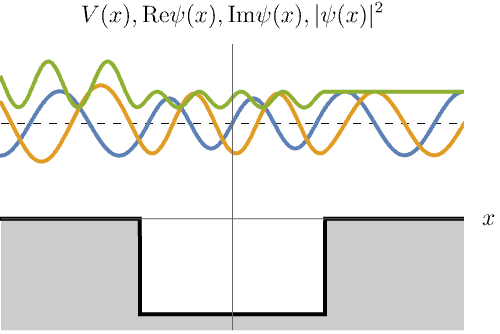

In [289]:
(* potential well: large energy  *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=3;
En=4;
V[x_]=V0*(HeavisideTheta[x-2]+HeavisideTheta[-x-2]);

{xMin,xMax}={-5,5};
For[iEn=0,iEn<=10,iEn++,
En=5+iEn*0.1;
phiSol[En]=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[xMax]==1,phi'[xMax]/phi[xMax]==I*Sqrt[2*(En-V0)]},phi,{x,xMin,xMax}];
Psi[iEn_,t_,x_]:=Exp[-I*En*t]*phiSol[En][x];
];

tblplt=Flatten[Table[
En=5+iEn*0.1;
Plot[{V[x],-100,En,En+Re[Psi[iEn,t,x]],En+Im[Psi[iEn,t,x]],En+Abs[Psi[iEn,t,x]]^2},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\psi(x), {\\rm Im}\\psi(x), |\\psi(x)|^2"}],AxesOrigin->{Automatic,3},BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotRange->{{xMin,xMax},{-0.5,8.5}},PlotStyle->({Black,Black,{Black,Dashed,Thickness[0.002]},#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"]),Ticks->None],
{iEn,10,10},{t,0,0}
]];
tblplt[[1]]
Export["2_finite_well_large_material.pdf",tblplt[[1]]];


-Graphics-
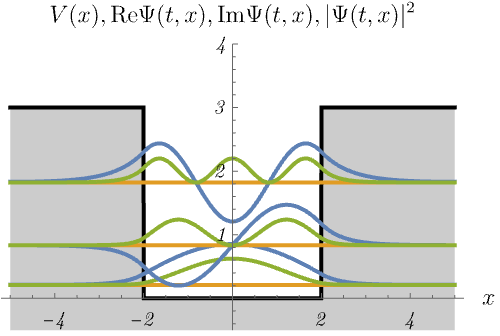

In [123]:
(* potential well: small energy *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=3;
{xMin,xMax}={-5,5};
V[x_]=V0*(HeavisideTheta[x-2]+HeavisideTheta[-x-2]);

{ev,ef}=NDEigensystem[{-(1/2)*phi''[x]+V[x]*phi[x]},phi[x],{x,xMin,xMax},3,Method->{"SpatialDiscretization"->{"FiniteElement",{"MeshOptions"->{"MaxCellMeasure"->0.1}}}}];
sign=Sign[ef/.{x->1.9}];
ef=ef/sign;

tblplt=Table[
Show[
Plot[{V[x],-100},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotRange->{-0.5,4},PlotStyle->{Black,Black}],
Table[Plot[{ev[[i]],ev[[i]]+Re[Exp[-I*ev[[i]]*t]*ef[[i]]],ev[[i]]+Im[Exp[-I*ev[[i]]*t]*ef[[i]]],ev[[i]]+Abs[Exp[-I*ev[[i]]*t]*ef[[i]]]^2},{x,xMin,xMax},PlotRange->{-0.5,4},PlotStyle->({{Gray,Dashed,Thickness[0.002]},#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"])],{i,1,3}]
],
{t,0,2*Pi/ev[[1]]-2*Pi/ev[[1]]/100,2*Pi/ev[[1]]/100}
];
tblplt[[1]]
Export["2_finite_well_small.gif",tblplt[[1]]];


-Graphics-
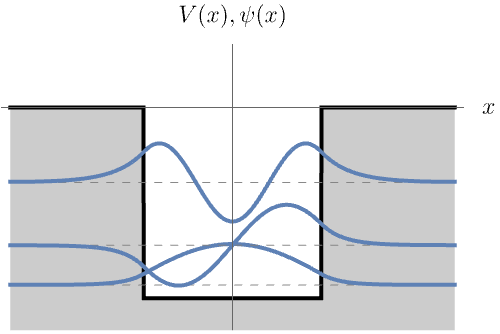

In [136]:
(* potential well: small energy *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=3;
{xMin,xMax}={-5,5};
V[x_]=V0*(HeavisideTheta[x-2]+HeavisideTheta[-x-2]);

{ev,ef}=NDEigensystem[{-(1/2)*phi''[x]+V[x]*phi[x]},phi[x],{x,xMin,xMax},3,Method->{"SpatialDiscretization"->{"FiniteElement",{"MeshOptions"->{"MaxCellMeasure"->0.1}}}}];
sign=Sign[ef/.{x->1.9}];
ef=ef/sign;

tblplt=Table[
Show[
Plot[{V[x],-100},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],AxesOrigin->{Automatic,3},BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotRange->{-0.5,4},PlotStyle->{Black,Black},Ticks->None],
Table[Plot[{ev[[i]],ev[[i]]+Re[Exp[-I*ev[[i]]*t]*ef[[i]]]},{x,xMin,xMax},PlotRange->{-0.5,4},PlotStyle->({{Gray,Dashed,Thickness[0.002]},#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"])],{i,1,3}]
],
{t,0,0}
];
tblplt[[1]]
Export["2_finite_well_small_material.pdf",tblplt[[1]]];


-Graphics-
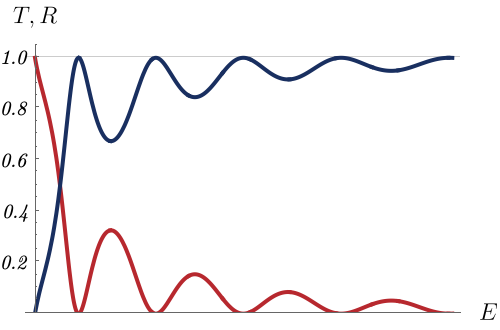

In [1683]:
(* potential well *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

mV0=1/2;
a=10;
l[k_]=Sqrt[2*mV0+k^2];
R[k_,l_]=((k^2-l^2)^2*Sin[2*l*a]^2)/(4*k^2*l^2+(k^2-l^2)^2*Sin[2*l*a]^2);
T[k_,l_]=4*k^2*l^2/(4*k^2*l^2+(k^2-l^2)^2*Sin[2*l*a]^2);

plt=Plot[{R[Sqrt[kSq],l[Sqrt[kSq]]],T[Sqrt[kSq],l[Sqrt[kSq]]]},{kSq,0,2},AxesLabel->MaTeX[{"E","T,R"}],BaseStyle->{FontFamily->"Latin Modern Roman"},GridLines->{None,{1}},ImageSize->250,PlotRange->{0,1.05},PlotStyle->{akane,konjo},Ticks->{None,Automatic}];
plt
Export["2_finite_well_TR_material.pdf",plt];


-Graphics-
-Graphics-
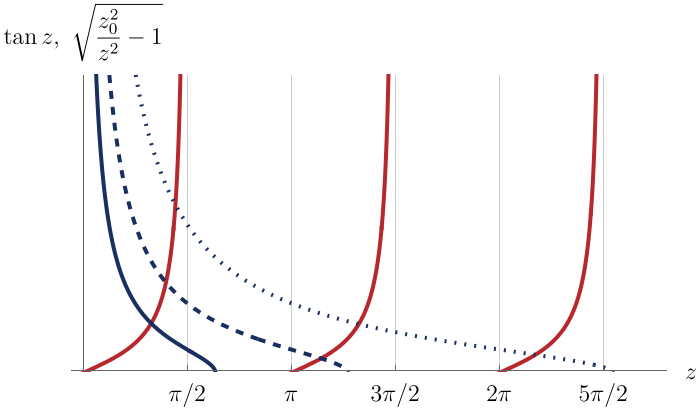
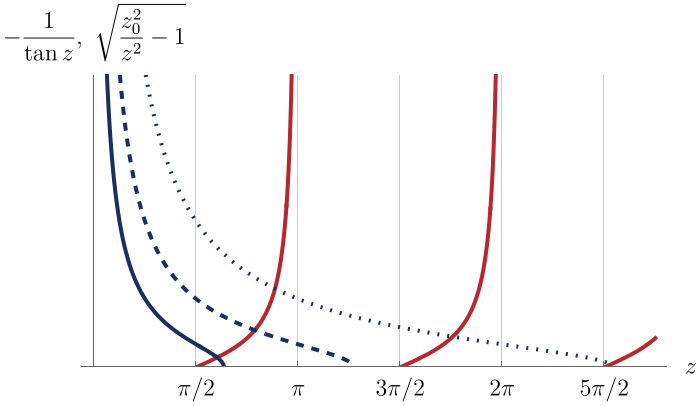

In [944]:
(* potential well *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

plt=Plot[{Tan[z],z0=2;Sqrt[z0^2/z^2-1],z0=4;Sqrt[z0^2/z^2-1],z0=8;Sqrt[z0^2/z^2-1]},{z,0,2.75*Pi},AxesLabel->MaTeX[{"z","\\tan z,~\\sqrt{\\frac{z_0^2}{z^2}-1}"}],AspectRatio->0.5,BaseStyle->{FontFamily->"Latin Modern Roman"},GridLines->{Table[(i/2)*Pi,{i,1,5}],{}},ImageSize->350,PlotRange->{0,10},PlotStyle->{akane,konjo,{konjo,Dashed},{konjo,Dotted}},Ticks->{{{Pi/2,MaTeX["\\pi/2"]},{Pi,MaTeX["\\pi"]},{3*Pi/2,MaTeX["3\\pi/2"]},{2*Pi,MaTeX["2\\pi"]},{5*Pi/2,MaTeX["5\\pi/2"]}},None}];
plt
Export["2_finite_well_sol1_material.pdf",plt];

plt=Plot[{-1/Tan[z],z0=2;Sqrt[z0^2/z^2-1],z0=4;Sqrt[z0^2/z^2-1],z0=8;Sqrt[z0^2/z^2-1]},{z,0,2.75*Pi},AxesLabel->MaTeX[{"z","-\\frac{1}{\\tan z},~\\sqrt{\\frac{z_0^2}{z^2}-1}"}],AspectRatio->0.5,BaseStyle->{FontFamily->"Latin Modern Roman"},GridLines->{Table[(i/2)*Pi,{i,1,5}],{}},ImageSize->350,PlotRange->{0,10},PlotStyle->{akane,konjo,{konjo,Dashed},{konjo,Dotted}},Ticks->{{{Pi/2,MaTeX["\\pi/2"]},{Pi,MaTeX["\\pi"]},{3*Pi/2,MaTeX["3\\pi/2"]},{2*Pi,MaTeX["2\\pi"]},{5*Pi/2,MaTeX["5\\pi/2"]}},None}];
plt
Export["2_finite_well_sol2_material.pdf",plt];


-Graphics-
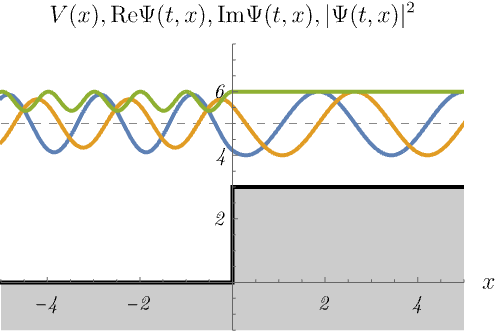

In [1635]:
(* potential barrier: large energy  *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=3;
En=5;
V[x_]=V0*HeavisideTheta[x];

{xMin,xMax}={-5,5};
phi=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[xMax]==1,phi'[xMax]/phi[xMax]==I*Sqrt[2*(En-V0)]},phi,{x,xMin,xMax}];
Psi[t_,x_]=Exp[-I*En*t]*phi[x];

tblplt=Table[
Plot[{V[x],-100,En,En+Re[Psi[t,x]],En+Im[Psi[t,x]],En+Abs[Psi[t,x]]^2},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Filling->{1->{2}},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotRange->{{xMin,xMax},{-0.5*V0,1.5*En}},PlotStyle->({Black,Black,{Gray,Dashed,Thickness[0.002]},#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"])],
{t,0,5*2*Pi/En,2*Pi/En/10}
];
tblplt[[1]]
Export["2_barrier_large.gif",tblplt];


-Graphics-
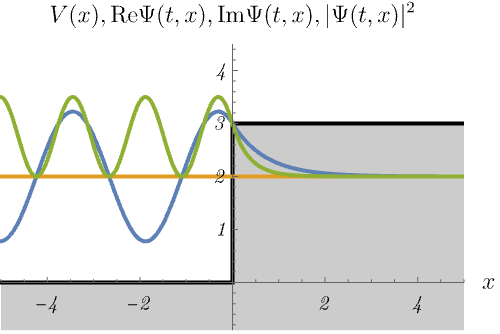

In [1648]:
(* potential barrier: small energy  *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

V0=3;
En=2;
V[x_]=V0*HeavisideTheta[x];

{xMin,xMax}={-5,5};
phi=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==En*phi[x],phi[xMax]==1,phi'[xMax]/phi[xMax]==-Sqrt[2*(V0-En)]},phi,{x,xMin,xMax}];
Psi[t_,x_]=Exp[-I*En*t]*phi[x]/Abs[phi[0]];

tblplt=Table[
Plot[{V[x],-100,En,En+Re[Psi[t,x]],En+Im[Psi[t,x]],En+Abs[Psi[t,x]]^2},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,Filling->{1->{2}},ImageSize->250,PlotRange->{{xMin,xMax},{-0.9,4.5}},PlotStyle->({Black,Black,{Gray,Dashed,Thickness[0.002]},#[[1]],#[[2]],#[[3]]}&@ColorData[97,"ColorList"])],{t,0,2*Pi/En-2*Pi/En/10,2*Pi/En/10}
];
tblplt[[1]]
Export["2_barrier_small.gif",tblplt];


In [ ]:
3.Formalism

-Graphics-
-Graphics3D-
-Graphics3D-
wavelet.gif
wavelet_x.gif
wavelet_p.gif
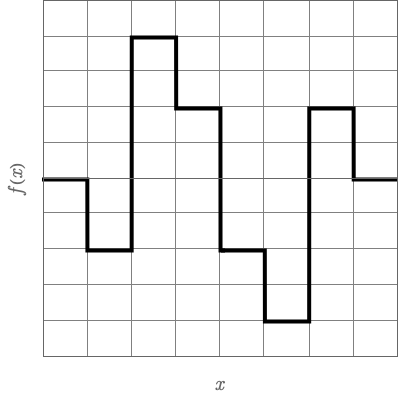
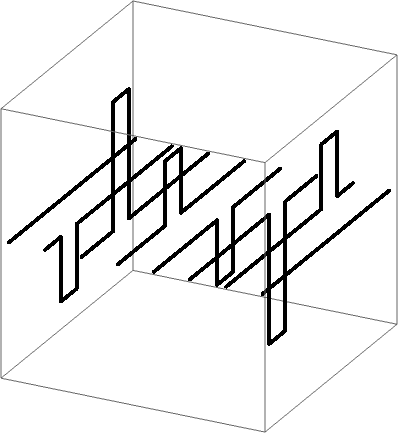
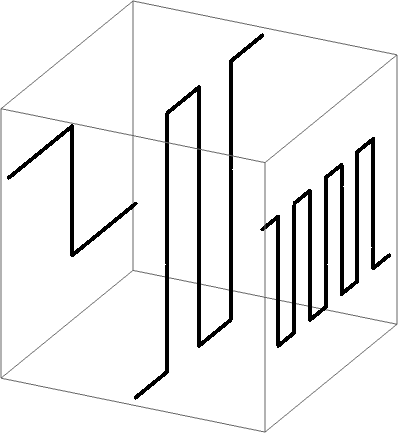
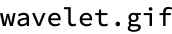
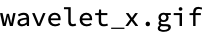
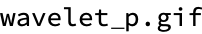

In [257]:
(* Fourier transform *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

fx[n_,i_,x_]:=WaveletPhi[HaarWavelet[],n*x-i];
fp[n_,x_]:=Sum[WaveletPsi[HaarWavelet[],n*x-i],{i,0,n-1}];

plt=Plot[fp[1,x]-2*fp[2,x]+fp[4,x],{x,0,1},AspectRatio->1,BaseStyle->{FontFamily->"Latin Modern Roman"},Exclusions->None,FrameLabel->{"x","f(x)"},GridLines->{Table[i/8,{i,0,8}],Table[j,{j,-8,8}]},GridLinesStyle->Thickness[0.002],Frame->True,ImageSize->200,PlotRange->{{0,1},{-5,5}},PlotStyle->Black,FrameTicks->None];

pltx1=Plot[0*fx[8,0,x],{x,0,1},Exclusions->None,GridLines->{Table[i/8,{i,0,8}],Table[j,{j,-8,8}]},GridLinesStyle->Thickness[0.002],Frame->True,ImageSize->200,PlotRange->{{0,1},{-5,5}},PlotStyle->Black,FrameTicks->None];
pltx2=Plot[-2*fx[8,1,x],{x,0,1},Exclusions->None,GridLines->{Table[i/8,{i,0,8}],Table[j,{j,-8,8}]},GridLinesStyle->Thickness[0.002],Frame->True,ImageSize->200,PlotRange->{{0,1},{-5,5}},PlotStyle->Black,FrameTicks->None];
pltx3=Plot[4*fx[8,2,x],{x,0,1},Exclusions->None,GridLines->{Table[i/8,{i,0,8}],Table[j,{j,-8,8}]},GridLinesStyle->Thickness[0.002],Frame->True,ImageSize->200,PlotRange->{{0,1},{-5,5}},PlotStyle->Black,FrameTicks->None];
pltx4=Plot[2*fx[8,3,x],{x,0,1},Exclusions->None,GridLines->{Table[i/8,{i,0,8}],Table[j,{j,-8,8}]},GridLinesStyle->Thickness[0.002],Frame->True,ImageSize->200,PlotRange->{{0,1},{-5,5}},PlotStyle->Black,FrameTicks->None];
pltx5=Plot[-2*fx[8,4,x],{x,0,1},Exclusions->None,GridLines->{Table[i/8,{i,0,8}],Table[j,{j,-8,8}]},GridLinesStyle->Thickness[0.002],Frame->True,ImageSize->200,PlotRange->{{0,1},{-5,5}},PlotStyle->Black,FrameTicks->None];
pltx6=Plot[-4*fx[8,5,x],{x,0,1},Exclusions->None,GridLines->{Table[i/8,{i,0,8}],Table[j,{j,-8,8}]},GridLinesStyle->Thickness[0.002],Frame->True,ImageSize->200,PlotRange->{{0,1},{-5,5}},PlotStyle->Black,FrameTicks->None];
pltx7=Plot[2*fx[8,6,x],{x,0,1},Exclusions->None,GridLines->{Table[i/8,{i,0,8}],Table[j,{j,-8,8}]},GridLinesStyle->Thickness[0.002],Frame->True,ImageSize->200,PlotRange->{{0,1},{-5,5}},PlotStyle->Black,FrameTicks->None];
pltx8=Plot[0*fx[8,7,x],{x,0,1},Exclusions->None,GridLines->{Table[i/8,{i,0,8}],Table[j,{j,-8,8}]},GridLinesStyle->Thickness[0.002],Frame->True,ImageSize->200,PlotRange->{{0,1},{-5,5}},PlotStyle->Black,FrameTicks->None];

pltp1=Plot[fp[1,x],{x,0,1},Exclusions->None,GridLines->{Table[i/8,{i,0,8}],Table[j,{j,-8,8}]},GridLinesStyle->Thickness[0.002],Frame->True,ImageSize->200,PlotRange->{{0,1},{-5,5}},PlotStyle->Black,FrameTicks->None];
pltp2=Plot[-2*fp[2,x],{x,0,1},Exclusions->None,GridLines->{Table[i/8,{i,0,8}],Table[j,{j,-8,8}]},GridLinesStyle->Thickness[0.002],Frame->True,ImageSize->200,PlotRange->{{0,1},{-5,5}},PlotStyle->Black,FrameTicks->None];
pltp3=Plot[fp[4,x],{x,0,1},Exclusions->None,GridLines->{Table[i/8,{i,0,8}],Table[j,{j,-8,8}]},GridLinesStyle->Thickness[0.002],Frame->True,ImageSize->200,PlotRange->{{0,1},{-5,5}},PlotStyle->Black,FrameTicks->None];

pltx=Graphics3D[
{
{pltx1[[1]]}/.{x_?NumericQ,y_?NumericQ}:>{1/8,x,y},
{pltx2[[1]]}/.{x_?NumericQ,y_?NumericQ}:>{2/8,x,y},
{pltx3[[1]]}/.{x_?NumericQ,y_?NumericQ}:>{3/8,x,y},
{pltx4[[1]]}/.{x_?NumericQ,y_?NumericQ}:>{4/8,x,y},
{pltx5[[1]]}/.{x_?NumericQ,y_?NumericQ}:>{5/8,x,y},
{pltx6[[1]]}/.{x_?NumericQ,y_?NumericQ}:>{6/8,x,y},
{pltx7[[1]]}/.{x_?NumericQ,y_?NumericQ}:>{7/8,x,y},
{pltx8[[1]]}/.{x_?NumericQ,y_?NumericQ}:>{8/8,x,y}
},
BoxRatios->{1,1,1},ImageSize->200,ViewPoint->1000*{1,-2,1}
];

pltp=Graphics3D[
{
{pltp1[[1]]}/.{x_?NumericQ,y_?NumericQ}:>{1/3,x,y},
{pltp2[[1]]}/.{x_?NumericQ,y_?NumericQ}:>{2/3,x,y},
{pltp3[[1]]}/.{x_?NumericQ,y_?NumericQ}:>{3/3,x,y}
},
BoxRatios->{1,1,1},ImageSize->200,ViewPoint->1000*{1,-2,1}
];
plt
pltx
pltp
Export["wavelet.gif",plt]
Export["wavelet_x.gif",GraphicsRow[{plt,Text[Style[" = ",FontSize->20]],pltx},Spacings->50]]
Export["wavelet_p.gif",GraphicsRow[{plt,Text[Style[" = ",FontSize->20]],pltp},Spacings->50]]


-Graphics-
3_Fourier.gif
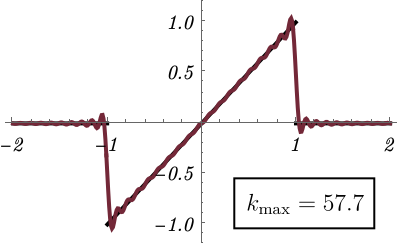
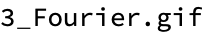

In [175]:
(* Fourier transform *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

fk[k_]:=(2*I/Sqrt[2*Pi]/k^2)*(k*Cos[k]-Sin[k]);
fx[kMax_,x_]:=(1/Sqrt[2*Pi])*NIntegrate[fk[k]*Exp[I*k*x],{k,-kMax,kMax}];

plt={};
For[ikMax=1,ikMax<=20,ikMax++,
kMax=1.5^(ikMax/2);
Quiet[tbl=Table[{x,Chop[fx[kMax,x]]},{x,-2,2,0.01}]];
AppendTo[plt,
Show[
Plot[HeavisideTheta[x+1]*HeavisideTheta[1-x]*x,{x,-2,2},BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->Inset[Framed[Style[MaTeX["k_{\\rm max}="<>StringPadRight[ToString[N[Round[10*kMax]/10]],4,"0"]]],Background->White],{1.1,-0.8}],ImageSize->200,PlotRange->{-1.2,1.2},PlotStyle->Black],
ListPlot[tbl,Joined->True,PlotStyle->ColorData["RedBlueTones"][1-ikMax/20]]
]
];
];
plt[[-1]]
Export["3_Fourier.gif",plt]


-Graphics-
3_rep1.gif
-Graphics-
3_rep2.gif
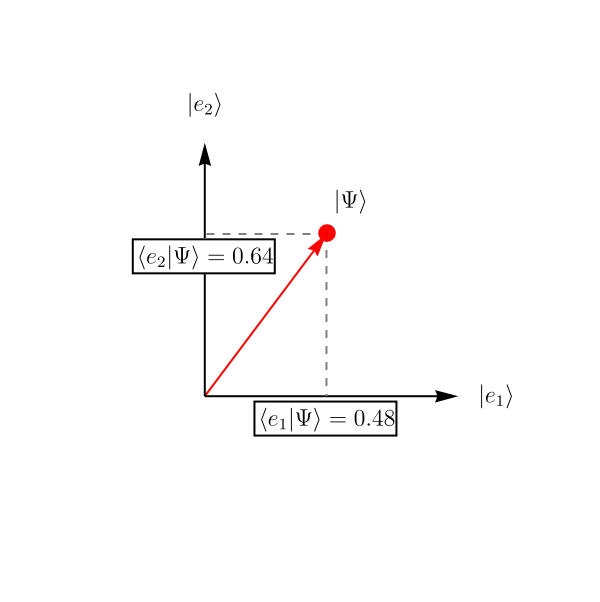
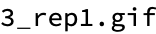
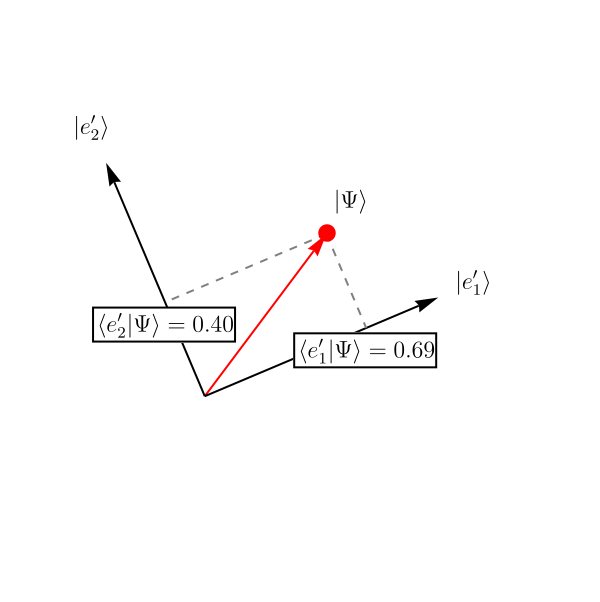
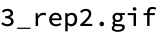

In [447]:
(* wave function: basis *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

p=0.8*{0.6,0.8};
c[theta_]=Cos[theta];
s[theta_]=Sin[theta];

u=0;
tblplt={};
{t1,t2}={0,0};
For[t1=0,t1<=1,t1=t1+1/16,
plt=Plot[{10},{x,0,1},AspectRatio->1,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},p}]},{Arrow[{{0,0},{c[u],s[u]}}]},{Arrow[{{0,0},{-s[u],c[u]}}]},{Inset[MaTeX["\\left| e_1 \\right>"],1.15*{c[u],s[u]}]},{Inset[MaTeX["\\left| e_2 \\right>"],1.15*{-s[u],c[u]}]},{Gray,Dashed,Line[{p,t1*p.{c[u],s[u]}*{c[u],s[u]}+(1-t1)*p}]},{Gray,Dashed,Line[{p,t2*p.{-s[u],c[u]}*{-s[u],c[u]}+(1-t2)*p}]},{Red,PointSize[0.03],Point[p]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*p]},{Inset[Framed[Style[MaTeX["\\left< e_1 | \\Psi \\right> = "<>StringPadRight[ToString[N[Round[10^3*p.{c[u],s[u]}]/10^3]],4,"0"]]],Background->White,FrameMargins->None],p.{c[u],s[u]}*{c[u],s[u]}-{0,0.1}]},{Inset[Framed[Style[MaTeX["\\left< e_2 | \\Psi \\right> = "<>StringPadRight[ToString[N[Round[10^3*p.{-s[u],c[u]}]/10^3]],4,"0"]]],Background->White,FrameMargins->None],p.{-s[u],c[u]}*{-s[u],c[u]}-{0,0.1}]}},ImageSize->300,PlotRange->{{-0.8,1.5},{-0.8,1.5}},PlotStyle->White];
AppendTo[tblplt,plt];
];
{t1,t2}={1,0};
For[t2=0,t2<=1,t2=t2+1/16,
plt=Plot[{10},{x,0,1},AspectRatio->1,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},p}]},{Arrow[{{0,0},{c[u],s[u]}}]},{Arrow[{{0,0},{-s[u],c[u]}}]},{Inset[MaTeX["\\left| e_1 \\right>"],1.15*{c[u],s[u]}]},{Inset[MaTeX["\\left| e_2 \\right>"],1.15*{-s[u],c[u]}]},{Gray,Dashed,Line[{p,t1*p.{c[u],s[u]}*{c[u],s[u]}+(1-t1)*p}]},{Gray,Dashed,Line[{p,t2*p.{-s[u],c[u]}*{-s[u],c[u]}+(1-t2)*p}]},{Red,PointSize[0.03],Point[p]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*p]},{Inset[Framed[Style[MaTeX["\\left< e_1 | \\Psi \\right> = "<>StringPadRight[ToString[N[Round[10^3*p.{c[u],s[u]}]/10^3]],4,"0"]]],Background->White,FrameMargins->None],p.{c[u],s[u]}*{c[u],s[u]}-{0,0.1}]},{Inset[Framed[Style[MaTeX["\\left< e_2 | \\Psi \\right> = "<>StringPadRight[ToString[N[Round[10^3*p.{-s[u],c[u]}]/10^3]],4,"0"]]],Background->White,FrameMargins->None],p.{-s[u],c[u]}*{-s[u],c[u]}-{0,0.1}]}},ImageSize->300,PlotRange->{{-0.8,1.5},{-0.8,1.5}},PlotStyle->White];
AppendTo[tblplt,plt];
];
plt
Export["3_rep1.gif",tblplt]

u=0.4;
tblplt={};
{t1,t2}={0,0};
For[t1=0,t1<=1,t1=t1+1/16,
plt=Plot[{10},{x,0,1},AspectRatio->1,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},p}]},{Arrow[{{0,0},{c[u],s[u]}}]},{Arrow[{{0,0},{-s[u],c[u]}}]},{Inset[MaTeX["\\left| e'_1 \\right>"],1.15*{c[u],s[u]}]},{Inset[MaTeX["\\left| e'_2 \\right>"],1.15*{-s[u],c[u]}]},{Gray,Dashed,Line[{p,t1*p.{c[u],s[u]}*{c[u],s[u]}+(1-t1)*p}]},{Gray,Dashed,Line[{p,t2*p.{-s[u],c[u]}*{-s[u],c[u]}+(1-t2)*p}]},{Red,PointSize[0.03],Point[p]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*p]},{Inset[Framed[Style[MaTeX["\\left< e'_1 | \\Psi \\right> = "<>StringPadRight[ToString[N[Round[10^3*p.{c[u],s[u]}]/10^3]],4,"0"]]],Background->White,FrameMargins->None],p.{c[u],s[u]}*{c[u],s[u]}-{0,0.1}]},{Inset[Framed[Style[MaTeX["\\left< e'_2 | \\Psi \\right> = "<>StringPadRight[ToString[N[Round[10^3*p.{-s[u],c[u]}]/10^3]],4,"0"]]],Background->White,FrameMargins->None],p.{-s[u],c[u]}*{-s[u],c[u]}-{0,0.1}]}},ImageSize->300,PlotRange->{{-0.8,1.5},{-0.8,1.5}},PlotStyle->White];
AppendTo[tblplt,plt];
];
{t1,t2}={1,0};
For[t2=0,t2<=1,t2=t2+1/16,
plt=Plot[{10},{x,0,1},AspectRatio->1,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},p}]},{Arrow[{{0,0},{c[u],s[u]}}]},{Arrow[{{0,0},{-s[u],c[u]}}]},{Inset[MaTeX["\\left| e'_1 \\right>"],1.15*{c[u],s[u]}]},{Inset[MaTeX["\\left| e'_2 \\right>"],1.15*{-s[u],c[u]}]},{Gray,Dashed,Line[{p,t1*p.{c[u],s[u]}*{c[u],s[u]}+(1-t1)*p}]},{Gray,Dashed,Line[{p,t2*p.{-s[u],c[u]}*{-s[u],c[u]}+(1-t2)*p}]},{Red,PointSize[0.03],Point[p]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*p]},{Inset[Framed[Style[MaTeX["\\left< e'_1 | \\Psi \\right> = "<>StringPadRight[ToString[N[Round[10^3*p.{c[u],s[u]}]/10^3]],4,"0"]]],Background->White,FrameMargins->None],p.{c[u],s[u]}*{c[u],s[u]}-{0,0.1}]},{Inset[Framed[Style[MaTeX["\\left< e'_2 | \\Psi \\right> = "<>StringPadRight[ToString[N[Round[10^3*p.{-s[u],c[u]}]/10^3]],4,"0"]]],Background->White,FrameMargins->None],p.{-s[u],c[u]}*{-s[u],c[u]}-{0,0.1}]}},ImageSize->300,PlotRange->{{-0.8,1.5},{-0.8,1.5}},PlotStyle->White];
AppendTo[tblplt,plt];
];
plt
Export["3_rep2.gif",tblplt]


-Graphics-
3_rep1_material.pdf
-Graphics-
3_rep2_material.pdf
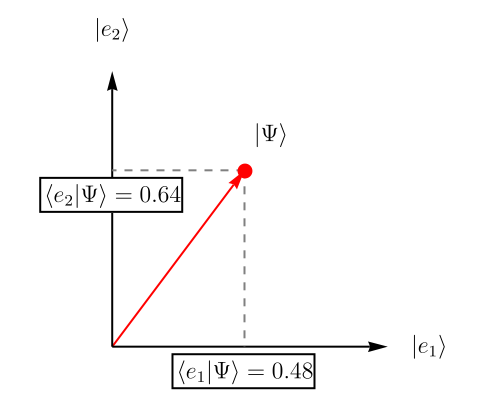
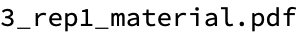
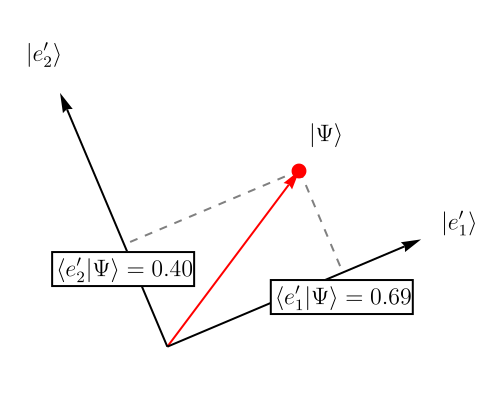
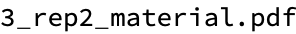

In [878]:
(* wave function: basis *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

p=0.8*{0.6,0.8};
c[theta_]=Cos[theta];
s[theta_]=Sin[theta];

u=0;
{t1,t2}={1,1};
plt=Plot[{10},{x,0,1},AspectRatio->14/18,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},p}]},{Arrow[{{0,0},{c[u],s[u]}}]},{Arrow[{{0,0},{-s[u],c[u]}}]},{Inset[MaTeX["\\left| e_1 \\right>"],1.15*{c[u],s[u]}]},{Inset[MaTeX["\\left| e_2 \\right>"],1.15*{-s[u],c[u]}]},{Gray,Dashed,Line[{p,t1*p.{c[u],s[u]}*{c[u],s[u]}+(1-t1)*p}]},{Gray,Dashed,Line[{p,t2*p.{-s[u],c[u]}*{-s[u],c[u]}+(1-t2)*p}]},{Red,PointSize[0.03],Point[p]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*p]},{Inset[Framed[Style[MaTeX["\\left< e_1 | \\Psi \\right> = "<>StringPadRight[ToString[N[Round[10^3*p.{c[u],s[u]}]/10^3]],4,"0"]]],Background->White,FrameMargins->None],p.{c[u],s[u]}*{c[u],s[u]}-{0,0.1}]},{Inset[Framed[Style[MaTeX["\\left< e_2 | \\Psi \\right> = "<>StringPadRight[ToString[N[Round[10^3*p.{-s[u],c[u]}]/10^3]],4,"0"]]],Background->White,FrameMargins->None],p.{-s[u],c[u]}*{-s[u],c[u]}-{0,0.1}]}},ImageSize->250,PlotRange->{{-0.4,1.4},{-0.2,1.2}},PlotStyle->White];
plt
Export["3_rep1_material.pdf",plt]

u=0.4;
{t1,t2}={1,1};
plt=Plot[{10},{x,0,1},AspectRatio->14/18,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},p}]},{Arrow[{{0,0},{c[u],s[u]}}]},{Arrow[{{0,0},{-s[u],c[u]}}]},{Inset[MaTeX["\\left| e'_1 \\right>"],1.15*{c[u],s[u]}]},{Inset[MaTeX["\\left| e'_2 \\right>"],1.15*{-s[u],c[u]}]},{Gray,Dashed,Line[{p,t1*p.{c[u],s[u]}*{c[u],s[u]}+(1-t1)*p}]},{Gray,Dashed,Line[{p,t2*p.{-s[u],c[u]}*{-s[u],c[u]}+(1-t2)*p}]},{Red,PointSize[0.03],Point[p]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*p]},{Inset[Framed[Style[MaTeX["\\left< e'_1 | \\Psi \\right> = "<>StringPadRight[ToString[N[Round[10^3*p.{c[u],s[u]}]/10^3]],4,"0"]]],Background->White,FrameMargins->None],p.{c[u],s[u]}*{c[u],s[u]}-{0,0.1}]},{Inset[Framed[Style[MaTeX["\\left< e'_2 | \\Psi \\right> = "<>StringPadRight[ToString[N[Round[10^3*p.{-s[u],c[u]}]/10^3]],4,"0"]]],Background->White,FrameMargins->None],p.{-s[u],c[u]}*{-s[u],c[u]}-{0,0.1}]}},ImageSize->250,PlotRange->{{-0.6,1.2},{-0.2,1.2}},PlotStyle->White];
plt
Export["3_rep2_material.pdf",plt]


-Graphics-
3_repx.gif
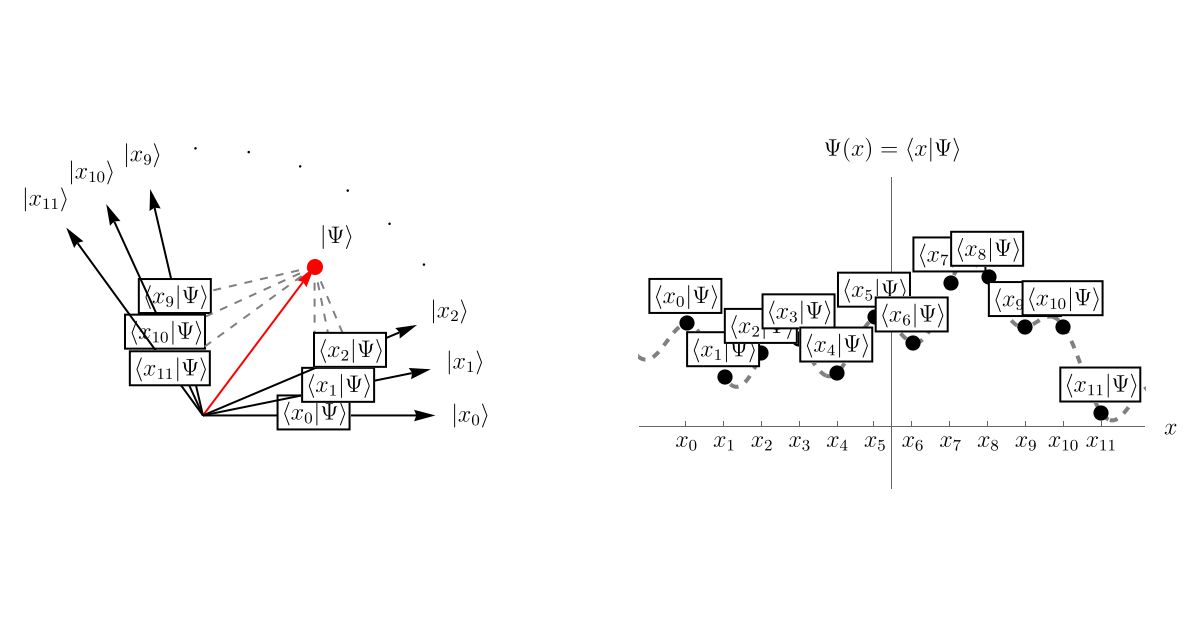
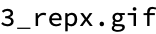

In [1695]:
(* wave function: x representation *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

pt:=0.8*{0.6,0.8};
c[theta_]=Cos[theta];
s[theta_]=Sin[theta];
l[v_,x_,y_]=Line[{pt,v*pt.{x,y}*{x,y}+(1-v)*pt}];
arrow[v_,u_,n_]:={{Arrow[{{0,0},{c[u],s[u]}}]},{Inset[MaTeX["\\left| x_{"<>ToString[n]<>"}\\right>"],1.15*{c[u],s[u]}]},{Gray,Dashed,l[v,c[u],s[u]]},{Inset[Framed[Style[MaTeX["\\left< x_{"<>ToString[n]<>"} | \\Psi \\right>"]],Background->White,FrameMargins->None],pt.{c[u],s[u]}*{c[u],s[u]}]}};
noarrow[t_,u_,n_]:={{Inset[MaTeX["\\cdot"],1.15*{c[u],s[u]}]}};
fx[t_,x_]=Re[5.5+(3.53*Exp[I*(1*x-1^2*t+0.12)]+3.12*Exp[I*(2*x-2^2*t-1.79)]+0.93*Exp[I*(4*x-4^2*t-3.15)]+2.1*Exp[I*(8*x-8^2*t+1.15)])];
fp[t_,x_]=Re[5.5+(-3.53*Exp[I*(1*x-1^2*t+0.12)]+3.12*Exp[I*(2*x-2^2*t-1.79)]-0.93*Exp[I*(4*x-4^2*t-3.15)]+2.1*Exp[I*(8*x-8^2*t+1.15)])];
xg[n_]=-1.75+0.32*n;
pg[n_]=-1.75+0.32*n;

t=0;
tblplt={};
For[nMax=0,nMax<=11,nMax++,
For[n=0,n<=nMax-1,n++,v[n]=1];
For[v[nMax]=0,v[nMax]<=1,v[nMax]=v[nMax]+If[3<=nMax<=8,1,1/16],
plt1=Plot[{10},{x,0,1},AspectRatio->1,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},pt}]},Join[Table[arrow[v[n],0.2*n,n],{n,0,2}],Table[noarrow[v[n],0.2*n,n],{n,3,8}],Table[arrow[v[n],0.2*n,n],{n,9,11}]][[1;;nMax+1]],{Red,PointSize[0.03],Point[pt]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*pt]}},ImageSize->400,PlotRange->{{-0.8,1.5},{-0.8,1.5}},PlotStyle->White];
plt2=Plot[fx[t,x],{x,-3,3},AxesLabel->MaTeX[{"x","\\Psi (x) = \\left< x | \\Psi \\right>"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Table[Inset[Style[MaTeX["x_{"<>ToString[n]<>"}"]],{xg[n],-1}],{n,0,nMax}],Table[{PointSize[0.03],Point[{xg[n],fx[t,xg[n]]}]},{n,0,nMax}],Table[Inset[Framed[Style[MaTeX["\\left< x_{"<>ToString[n]<>"} | \\Psi \\right>"]],Background->White,FrameMargins->None],{xg[n],fx[t,xg[n]]}+{0,2}],{n,0,nMax}]},ImageSize->400,PlotRange->{{-2.15,2.15},{-5,20}},PlotStyle->{Gray,Dashed},Ticks->{Table[{xg[n],""},{n,0,nMax}],None}];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}}]];
];
];
tblplt[[-1]]
Export["3_repx.gif",tblplt]


-Graphics-
3_repx_material.pdf
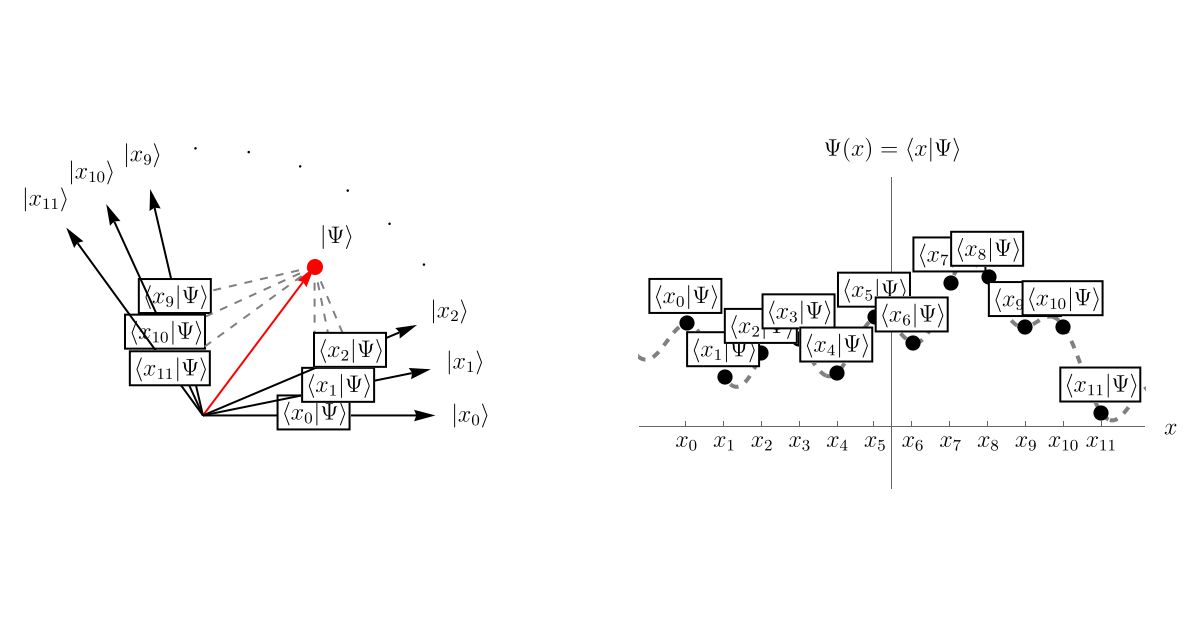
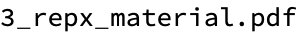

In [1714]:
(* wave function: x representation *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

pt:=0.8*{0.6,0.8};
c[theta_]=Cos[theta];
s[theta_]=Sin[theta];
l[v_,x_,y_]=Line[{pt,v*pt.{x,y}*{x,y}+(1-v)*pt}];
arrow[v_,u_,n_]:={{Arrow[{{0,0},{c[u],s[u]}}]},{Inset[MaTeX["\\left| x_{"<>ToString[n]<>"}\\right>"],1.15*{c[u],s[u]}]},{Gray,Dashed,l[v,c[u],s[u]]},{Inset[Framed[Style[MaTeX["\\left< x_{"<>ToString[n]<>"} | \\Psi \\right>"]],Background->White,FrameMargins->None],pt.{c[u],s[u]}*{c[u],s[u]}]}};
noarrow[t_,u_,n_]:={{Inset[MaTeX["\\cdot"],1.15*{c[u],s[u]}]}};
fx[t_,x_]=Re[5.5+(3.53*Exp[I*(1*x-1^2*t+0.12)]+3.12*Exp[I*(2*x-2^2*t-1.79)]+0.93*Exp[I*(4*x-4^2*t-3.15)]+2.1*Exp[I*(8*x-8^2*t+1.15)])];
fp[t_,x_]=Re[5.5+(-3.53*Exp[I*(1*x-1^2*t+0.12)]+3.12*Exp[I*(2*x-2^2*t-1.79)]-0.93*Exp[I*(4*x-4^2*t-3.15)]+2.1*Exp[I*(8*x-8^2*t+1.15)])];
xg[n_]=-1.75+0.32*n;
pg[n_]=-1.75+0.32*n;

t=0;
nMax=11;
For[n=0,n<=nMax,n++,v[n]=1];
plt1=Plot[{10},{x,0,1},AspectRatio->1,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},pt}]},Join[Table[arrow[v[n],0.2*n,n],{n,0,2}],Table[noarrow[v[n],0.2*n,n],{n,3,8}],Table[arrow[v[n],0.2*n,n],{n,9,11}]][[1;;nMax+1]],{Red,PointSize[0.03],Point[pt]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*pt]}},ImageSize->400,PlotRange->{{-0.8,1.5},{-0.8,1.5}},PlotStyle->White];
plt2=Plot[fx[t,x],{x,-3,3},AxesLabel->MaTeX[{"x","\\Psi (x) = \\left< x | \\Psi \\right>"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Table[Inset[Style[MaTeX["x_{"<>ToString[n]<>"}"]],{xg[n],-1}],{n,0,nMax}],Table[{PointSize[0.03],Point[{xg[n],fx[t,xg[n]]}]},{n,0,nMax}],Table[Inset[Framed[Style[MaTeX["\\left< x_{"<>ToString[n]<>"} | \\Psi \\right>"]],Background->White,FrameMargins->None],{xg[n],fx[t,xg[n]]}+{0,2}],{n,0,nMax}]},ImageSize->400,PlotRange->{{-2.15,2.15},{-5,20}},PlotStyle->{Gray,Dashed},Ticks->{Table[{xg[n],""},{n,0,nMax}],None}];
plt=GraphicsGrid[{{plt1,plt2}}];
plt
Export["3_repx_material.pdf",plt]


-Graphics-
3_repp.gif
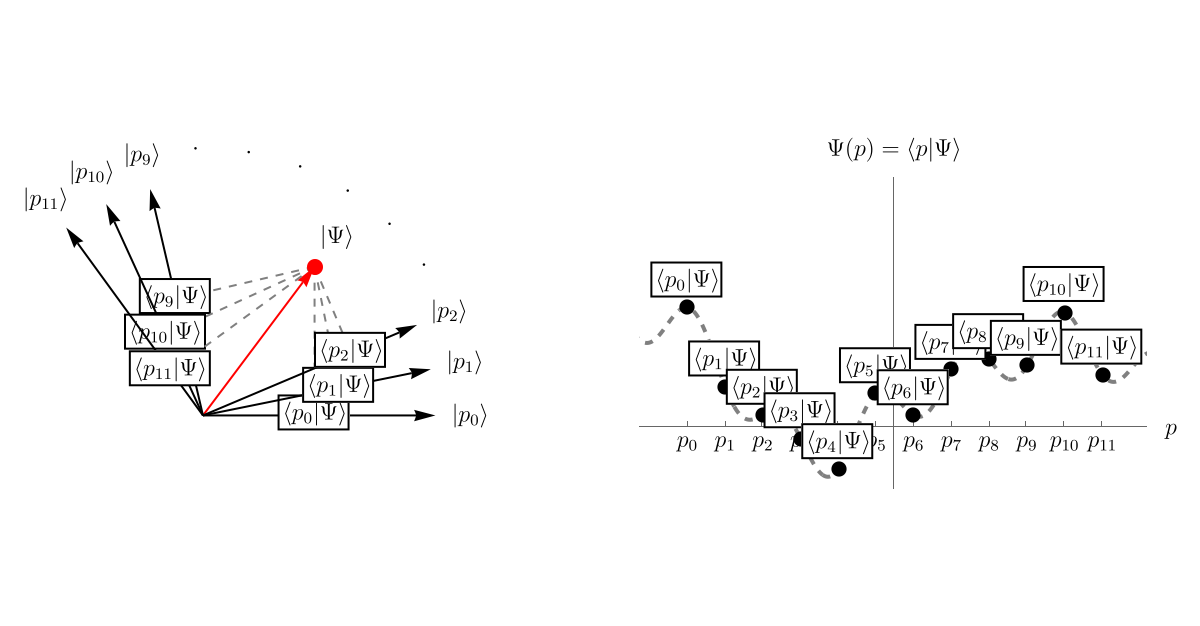
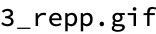

In [1755]:
(* wave function: p representation *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

pt:=0.8*{0.6,0.8};
c[theta_]=Cos[theta];
s[theta_]=Sin[theta];
l[v_,x_,y_]=Line[{pt,v*pt.{x,y}*{x,y}+(1-v)*pt}];
arrow[v_,u_,n_]:={{Arrow[{{0,0},{c[u],s[u]}}]},{Inset[MaTeX["\\left| p_{"<>ToString[n]<>"}\\right>"],1.15*{c[u],s[u]}]},{Gray,Dashed,l[v,c[u],s[u]]},{Inset[Framed[Style[MaTeX["\\left< p_{"<>ToString[n]<>"} | \\Psi \\right>"]],Background->White,FrameMargins->None],pt.{c[u],s[u]}*{c[u],s[u]}]}};
noarrow[t_,u_,n_]:={{Inset[MaTeX["\\cdot"],1.15*{c[u],s[u]}]}};
fx[t_,x_]=Re[5+(3.53*Exp[I*(1*x-1^2*t+0.12)]+3.12*Exp[I*(2*x-2^2*t-1.79)]+0.93*Exp[I*(4*x-4^2*t-3.15)]+2.1*Exp[I*(8*x-8^2*t+1.15)])];
fp[t_,p_]=Re[5+(-3.53*Exp[I*(1*p-1^2*t+0.12)]+3.12*Exp[I*(2*p-2^2*t-1.79)]-0.93*Exp[I*(4*p-4^2*t-3.15)]+2.1*Exp[I*(8*p-8^2*t+1.15)])];
xg[n_]=-1.75+0.32*n;
pg[n_]=-1.75+0.32*n;

t=0;
tblplt={};
For[nMax=0,nMax<=11,nMax++,
For[n=0,n<=nMax-1,n++,v[n]=1];
For[v[nMax]=0,v[nMax]<=1,v[nMax]=v[nMax]+If[3<=nMax<=8,1,1/16],
plt1=Plot[{10},{p,0,1},AspectRatio->1,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},pt}]},Join[Table[arrow[v[n],0.2*n,n],{n,0,2}],Table[noarrow[v[n],0.2*n,n],{n,3,8}],Table[arrow[v[n],0.2*n,n],{n,9,11}]][[1;;nMax+1]],{Red,PointSize[0.03],Point[pt]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*pt]}},ImageSize->400,PlotRange->{{-0.8,1.5},{-0.8,1.5}},PlotStyle->White];
plt2=Plot[fp[t,p],{p,-3,3},AxesLabel->MaTeX[{"p","\\Psi (p) = \\left< p | \\Psi \\right>"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Table[Inset[Style[MaTeX["p_{"<>ToString[n]<>"}"]],{pg[n],-1}],{n,0,nMax}],Table[{PointSize[0.03],Point[{pg[n],fp[t,pg[n]]}]},{n,0,nMax}],Table[Inset[Framed[Style[MaTeX["\\left< p_{"<>ToString[n]<>"} | \\Psi \\right>"]],Background->White,FrameMargins->None],{pg[n],fp[t,pg[n]]}+{0,2}],{n,0,nMax}]},ImageSize->400,PlotRange->{{-2.15,2.15},{-5,20}},PlotStyle->{Gray,Dashed},Ticks->{Table[{pg[n],""},{n,0,nMax}],None}];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}}]];
];
];
tblplt[[-1]]
Export["3_repp.gif",tblplt]


-Graphics-
3_repp_material.pdf
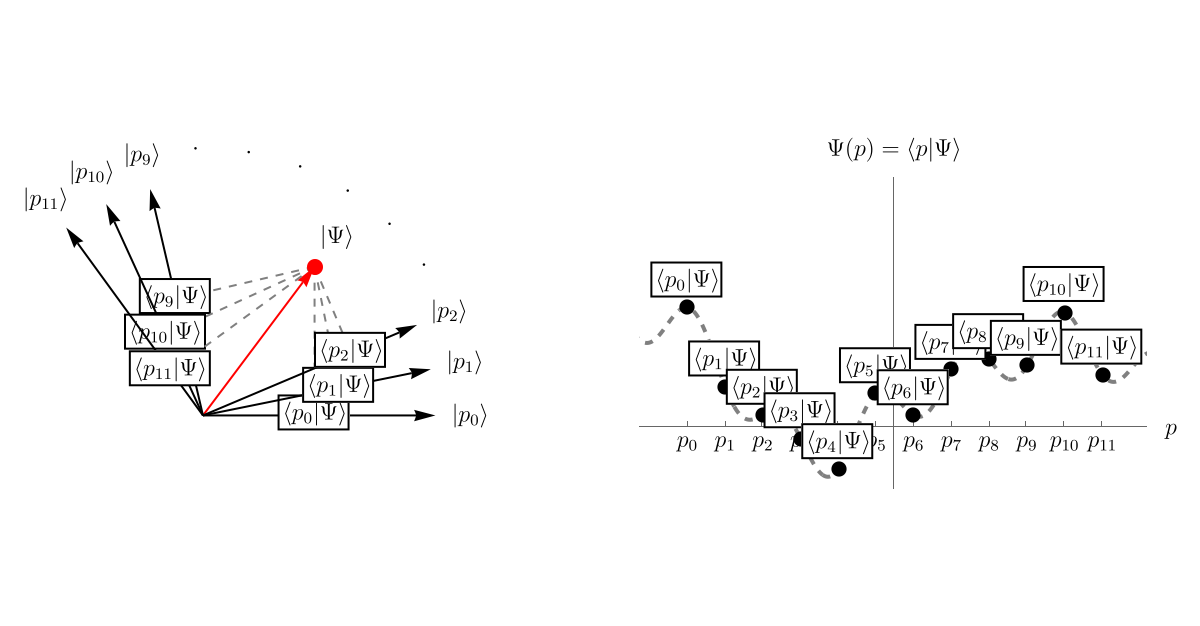
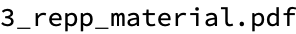

In [1774]:
(* wave function: p representation *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

pt:=0.8*{0.6,0.8};
c[theta_]=Cos[theta];
s[theta_]=Sin[theta];
l[v_,x_,y_]=Line[{pt,v*pt.{x,y}*{x,y}+(1-v)*pt}];
arrow[v_,u_,n_]:={{Arrow[{{0,0},{c[u],s[u]}}]},{Inset[MaTeX["\\left| p_{"<>ToString[n]<>"}\\right>"],1.15*{c[u],s[u]}]},{Gray,Dashed,l[v,c[u],s[u]]},{Inset[Framed[Style[MaTeX["\\left< p_{"<>ToString[n]<>"} | \\Psi \\right>"]],Background->White,FrameMargins->None],pt.{c[u],s[u]}*{c[u],s[u]}]}};
noarrow[t_,u_,n_]:={{Inset[MaTeX["\\cdot"],1.15*{c[u],s[u]}]}};
fx[t_,x_]=Re[5+(3.53*Exp[I*(1*x-1^2*t+0.12)]+3.12*Exp[I*(2*x-2^2*t-1.79)]+0.93*Exp[I*(4*x-4^2*t-3.15)]+2.1*Exp[I*(8*x-8^2*t+1.15)])];
fp[t_,p_]=Re[5+(-3.53*Exp[I*(1*p-1^2*t+0.12)]+3.12*Exp[I*(2*p-2^2*t-1.79)]-0.93*Exp[I*(4*p-4^2*t-3.15)]+2.1*Exp[I*(8*p-8^2*t+1.15)])];
xg[n_]=-1.75+0.32*n;
pg[n_]=-1.75+0.32*n;

t=0;
nMax=11;
For[n=0,n<=nMax,n++,v[n]=1];
plt1=Plot[{10},{p,0,1},AspectRatio->1,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},pt}]},Join[Table[arrow[v[n],0.2*n,n],{n,0,2}],Table[noarrow[v[n],0.2*n,n],{n,3,8}],Table[arrow[v[n],0.2*n,n],{n,9,11}]][[1;;nMax+1]],{Red,PointSize[0.03],Point[pt]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*pt]}},ImageSize->400,PlotRange->{{-0.8,1.5},{-0.8,1.5}},PlotStyle->White];
plt2=Plot[fp[t,p],{p,-3,3},AxesLabel->MaTeX[{"p","\\Psi (p) = \\left< p | \\Psi \\right>"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Table[Inset[Style[MaTeX["p_{"<>ToString[n]<>"}"]],{pg[n],-1}],{n,0,nMax}],Table[{PointSize[0.03],Point[{pg[n],fp[t,pg[n]]}]},{n,0,nMax}],Table[Inset[Framed[Style[MaTeX["\\left< p_{"<>ToString[n]<>"} | \\Psi \\right>"]],Background->White,FrameMargins->None],{pg[n],fp[t,pg[n]]}+{0,2}],{n,0,nMax}]},ImageSize->400,PlotRange->{{-2.15,2.15},{-5,20}},PlotStyle->{Gray,Dashed},Ticks->{Table[{pg[n],""},{n,0,nMax}],None}];
plt=GraphicsGrid[{{plt1,plt2}}];
plt
Export["3_repp_material.pdf",plt]


-Graphics-
3_x_t.gif
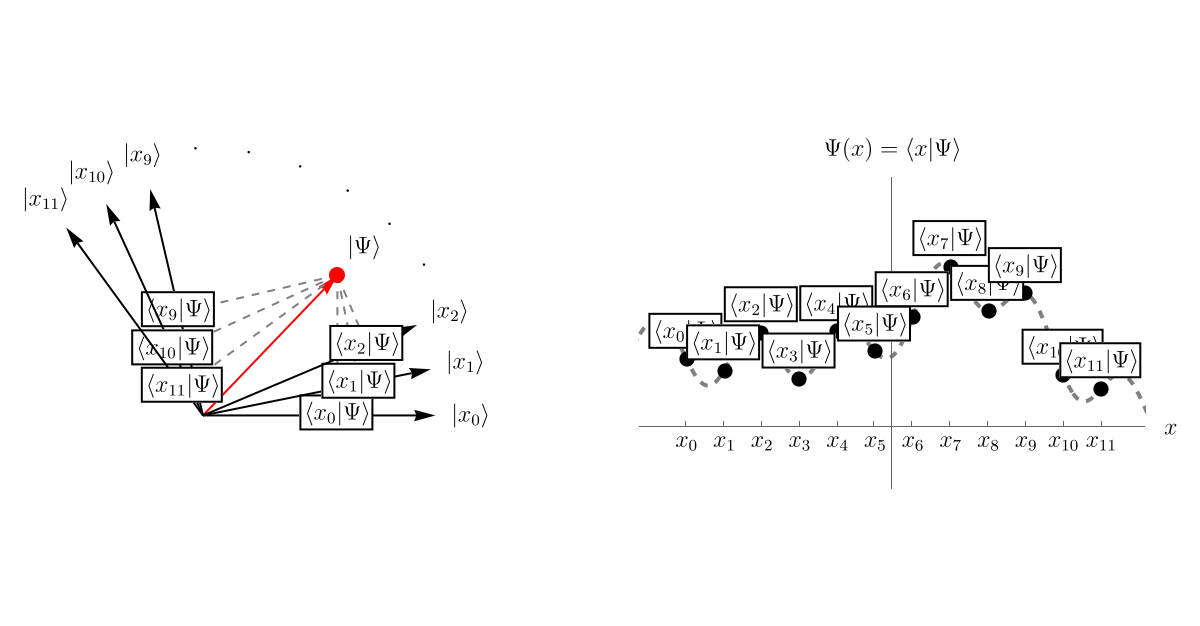
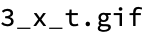

In [1736]:
(* wave function: time evolution *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

pt:=0.8*{0.6,0.8}+0.1*{Cos[6*t],Sin[2*6*t]};
c[theta_]=Cos[theta];
s[theta_]=Sin[theta];
l[v_,x_,y_]=Line[{pt,v*pt.{x,y}*{x,y}+(1-v)*pt}];
arrow[v_,u_,n_]:={{Arrow[{{0,0},{c[u],s[u]}}]},{Inset[MaTeX["\\left| x_{"<>ToString[n]<>"}\\right>"],1.15*{c[u],s[u]}]},{Gray,Dashed,l[v,c[u],s[u]]},{Inset[Framed[Style[MaTeX["\\left< x_{"<>ToString[n]<>"} | \\Psi \\right>"]],Background->White,FrameMargins->None],pt.{c[u],s[u]}*{c[u],s[u]}]}};
noarrow[t_,u_,n_]:={{Inset[MaTeX["\\cdot"],1.15*{c[u],s[u]}]}};
fx[t_,x_]=Re[5.5+(3.53*Exp[I*(1*x-1^2*t+0.12)]+3.12*Exp[I*(2*x-2^2*t-1.79)]+0.93*Exp[I*(4*x-4^2*t-3.15)]+2.1*Exp[I*(8*x-8^2*t+1.15)])];
fp[t_,x_]=Re[5.5+(-3.53*Exp[I*(1*x-1^2*t+0.12)]+3.12*Exp[I*(2*x-2^2*t-1.79)]-0.93*Exp[I*(4*x-4^2*t-3.15)]+2.1*Exp[I*(8*x-8^2*t+1.15)])];
xg[n_]=-1.75+0.32*n;
pg[n_]=-1.75+0.32*n;
nMax=11;

tblplt={};
For[t=0,t<2*Pi,t=t+2*Pi/200,
For[n=0,n<=nMax,n++,v[n]=1];
plt1=Plot[{10},{x,0,1},AspectRatio->1,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},pt}]},Join[Table[arrow[v[n],0.2*n,n],{n,0,2}],Table[noarrow[v[n],0.2*n,n],{n,3,8}],Table[arrow[v[n],0.2*n,n],{n,9,11}]][[1;;nMax+1]],{Red,PointSize[0.03],Point[pt]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*pt]}},ImageSize->400,PlotRange->{{-0.8,1.5},{-0.8,1.5}},PlotStyle->White];
plt2=Plot[fx[t,x],{x,-3,3},AxesLabel->MaTeX[{"x","\\Psi (x) = \\left< x | \\Psi \\right>"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Table[Inset[Style[MaTeX["x_{"<>ToString[n]<>"}"]],{xg[n],-1}],{n,0,nMax}],Table[{PointSize[0.03],Point[{xg[n],fx[t,xg[n]]}]},{n,0,nMax}],Table[Inset[Framed[Style[MaTeX["\\left< x_{"<>ToString[n]<>"} | \\Psi \\right>"]],Background->White,FrameMargins->None],{xg[n],fx[t,xg[n]]}+{0,2}],{n,0,nMax}]},ImageSize->400,PlotRange->{{-2.15,2.15},{-5,20}},PlotStyle->{Gray,Dashed},Ticks->{Table[{xg[n],""},{n,0,nMax}],None}];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}}]];
];
tblplt[[-1]]
Export["3_x_t.gif",tblplt]


-Graphics-
-Graphics-
3_x_t_1_material.pdf
3_x_t_2_material.pdf
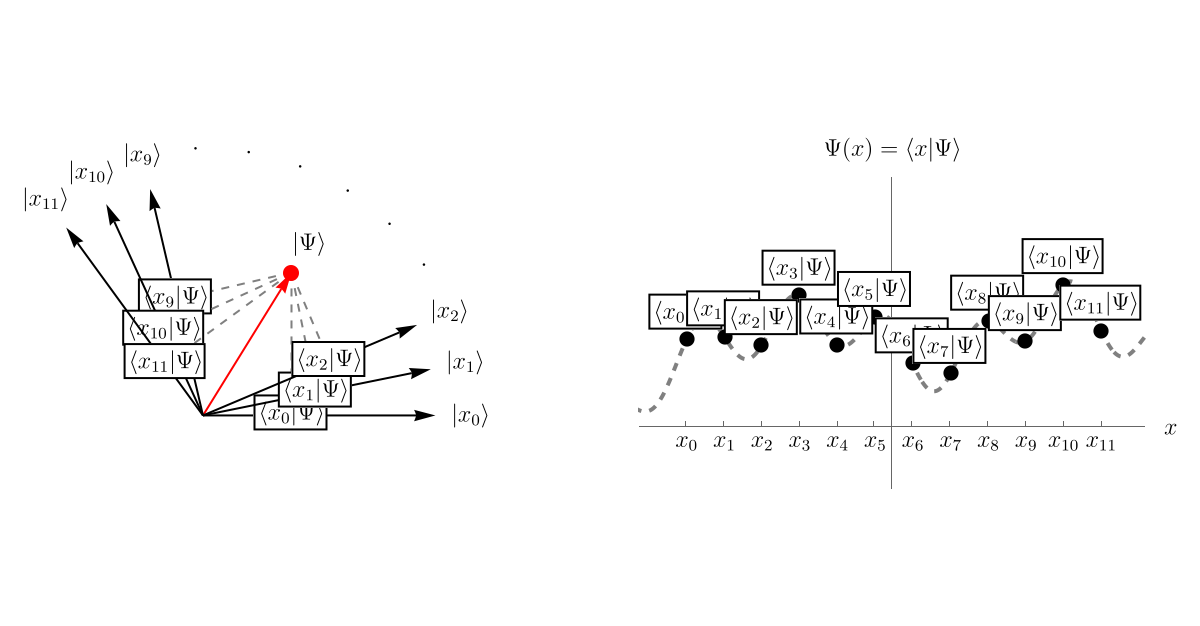
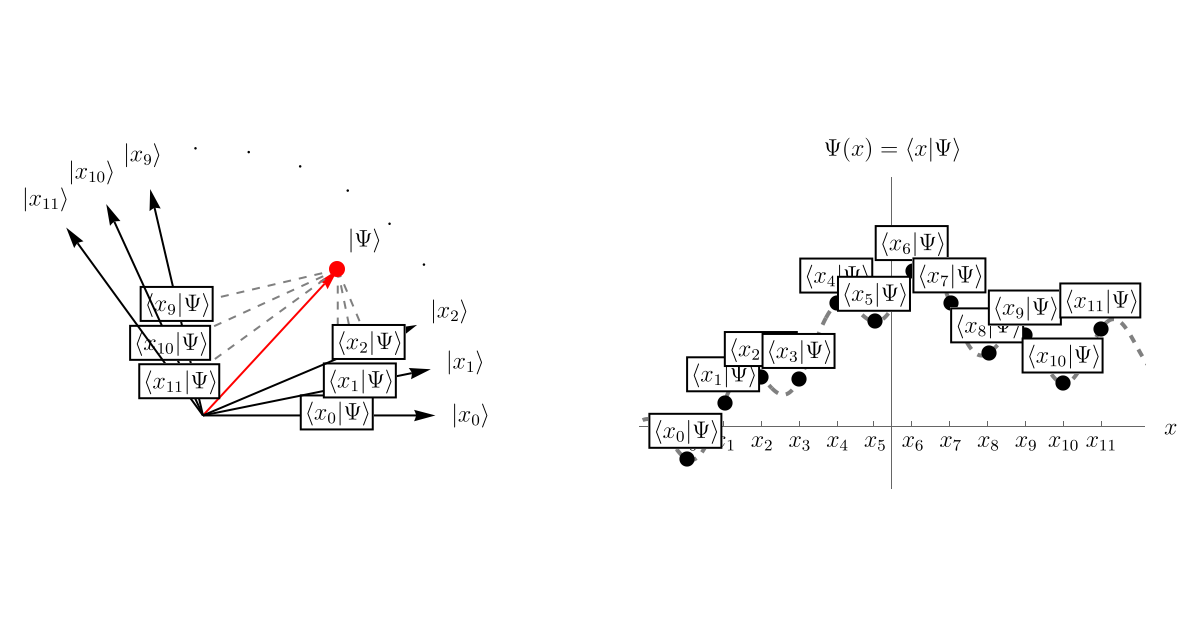
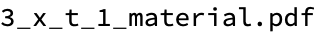
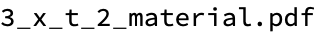

In [23]:
(* wave function: time evolution *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

pt:=0.8*{0.6,0.8}+0.1*{Cos[6*t],Sin[2*6*t]};
c[theta_]=Cos[theta];
s[theta_]=Sin[theta];
l[v_,x_,y_]=Line[{pt,v*pt.{x,y}*{x,y}+(1-v)*pt}];
arrow[v_,u_,n_]:={{Arrow[{{0,0},{c[u],s[u]}}]},{Inset[MaTeX["\\left| x_{"<>ToString[n]<>"}\\right>"],1.15*{c[u],s[u]}]},{Gray,Dashed,l[v,c[u],s[u]]},{Inset[Framed[Style[MaTeX["\\left< x_{"<>ToString[n]<>"} | \\Psi \\right>"]],Background->White,FrameMargins->None],pt.{c[u],s[u]}*{c[u],s[u]}]}};
noarrow[t_,u_,n_]:={{Inset[MaTeX["\\cdot"],1.15*{c[u],s[u]}]}};
fx[t_,x_]=Re[5.5+(3.53*Exp[I*(1*x-1^2*t+0.12)]+3.12*Exp[I*(2*x-2^2*t-1.79)]+0.93*Exp[I*(4*x-4^2*t-3.15)]+2.1*Exp[I*(8*x-8^2*t+1.15)])];
fp[t_,x_]=Re[5.5+(-3.53*Exp[I*(1*x-1^2*t+0.12)]+3.12*Exp[I*(2*x-2^2*t-1.79)]-0.93*Exp[I*(4*x-4^2*t-3.15)]+2.1*Exp[I*(8*x-8^2*t+1.15)])];
xg[n_]=-1.75+0.32*n;
pg[n_]=-1.75+0.32*n;
nMax=11;

tblplt={};
For[t=0,t<2*Pi/5,t=t+2*Pi/200,
For[n=0,n<=nMax,n++,v[n]=1];
plt1=Plot[{10},{x,0,1},AspectRatio->1,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},pt}]},Join[Table[arrow[v[n],0.2*n,n],{n,0,2}],Table[noarrow[v[n],0.2*n,n],{n,3,8}],Table[arrow[v[n],0.2*n,n],{n,9,11}]][[1;;nMax+1]],{Red,PointSize[0.03],Point[pt]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*pt]}},ImageSize->400,PlotRange->{{-0.8,1.5},{-0.8,1.5}},PlotStyle->White];
plt2=Plot[fx[t,x],{x,-3,3},AxesLabel->MaTeX[{"x","\\Psi (x) = \\left< x | \\Psi \\right>"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Table[Inset[Style[MaTeX["x_{"<>ToString[n]<>"}"]],{xg[n],-1}],{n,0,nMax}],Table[{PointSize[0.03],Point[{xg[n],fx[t,xg[n]]}]},{n,0,nMax}],Table[Inset[Framed[Style[MaTeX["\\left< x_{"<>ToString[n]<>"} | \\Psi \\right>"]],Background->White,FrameMargins->None],{xg[n],fx[t,xg[n]]}+{0,2}],{n,0,nMax}]},ImageSize->400,PlotRange->{{-2.15,2.15},{-5,20}},PlotStyle->{Gray,Dashed},Ticks->{Table[{xg[n],""},{n,0,nMax}],None}];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}}]];
];
tblplt={tblplt[[17]],tblplt[[34]]};
tblplt[[1]]
tblplt[[2]]
Export["3_x_t_1_material.pdf",tblplt[[1]]]
Export["3_x_t_2_material.pdf",tblplt[[2]]]


-Graphics-
3_twolevel.gif
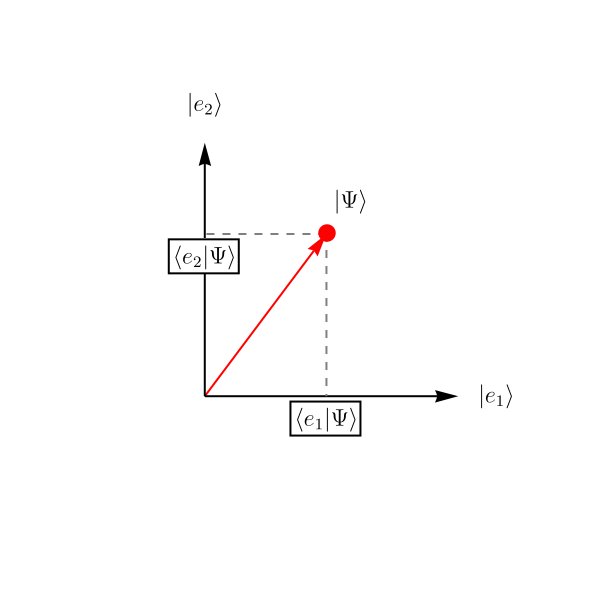
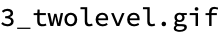

In [77]:
(* wave function: 2-level system *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

p=0.8*{0.6,0.8};
c[theta_]=Cos[theta];
s[theta_]=Sin[theta];

u=0;
tblplt={};
{t1,t2}={0,0};
For[t1=0,t1<=1,t1=t1+1/16,
plt=Plot[{10},{x,0,1},AspectRatio->1,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},p}]},{Arrow[{{0,0},{c[u],s[u]}}]},{Arrow[{{0,0},{-s[u],c[u]}}]},{Inset[MaTeX["\\left| e_1 \\right>"],1.15*{c[u],s[u]}]},{Inset[MaTeX["\\left| e_2 \\right>"],1.15*{-s[u],c[u]}]},{Gray,Dashed,Line[{p,t1*p.{c[u],s[u]}*{c[u],s[u]}+(1-t1)*p}]},{Gray,Dashed,Line[{p,t2*p.{-s[u],c[u]}*{-s[u],c[u]}+(1-t2)*p}]},{Red,PointSize[0.03],Point[p]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*p]},{Inset[Framed[Style[MaTeX["\\left< e_1 | \\Psi \\right>"]],Background->White,FrameMargins->None],p.{c[u],s[u]}*{c[u],s[u]}-{0,0.1}]},{Inset[Framed[Style[MaTeX["\\left< e_2 | \\Psi \\right>"]],Background->White,FrameMargins->None],p.{-s[u],c[u]}*{-s[u],c[u]}-{0,0.1}]}},ImageSize->300,PlotRange->{{-0.8,1.5},{-0.8,1.5}},PlotStyle->White];
AppendTo[tblplt,plt];
];
{t1,t2}={1,0};
For[t2=0,t2<=1,t2=t2+1/16,
plt=Plot[{10},{x,0,1},AspectRatio->1,AxesLabel->None,AxesStyle->White,BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Red,Arrow[{{0,0},p}]},{Arrow[{{0,0},{c[u],s[u]}}]},{Arrow[{{0,0},{-s[u],c[u]}}]},{Inset[MaTeX["\\left| e_1 \\right>"],1.15*{c[u],s[u]}]},{Inset[MaTeX["\\left| e_2 \\right>"],1.15*{-s[u],c[u]}]},{Gray,Dashed,Line[{p,t1*p.{c[u],s[u]}*{c[u],s[u]}+(1-t1)*p}]},{Gray,Dashed,Line[{p,t2*p.{-s[u],c[u]}*{-s[u],c[u]}+(1-t2)*p}]},{Red,PointSize[0.03],Point[p]},{Inset[Style[MaTeX["\\left| \\Psi \\right>"],Background->White,FrameMargins->None],1.2*p]},{Inset[Framed[Style[MaTeX["\\left< e_1 | \\Psi \\right>"]],Background->White,FrameMargins->None],p.{c[u],s[u]}*{c[u],s[u]}-{0,0.1}]},{Inset[Framed[Style[MaTeX["\\left< e_2 | \\Psi \\right>"]],Background->White,FrameMargins->None],p.{-s[u],c[u]}*{-s[u],c[u]}-{0,0.1}]}},ImageSize->300,PlotRange->{{-0.8,1.5},{-0.8,1.5}},PlotStyle->White];
AppendTo[tblplt,plt];
];
plt
Export["3_twolevel.gif",tblplt]


-Graphics-
3_twolevel_t.gif
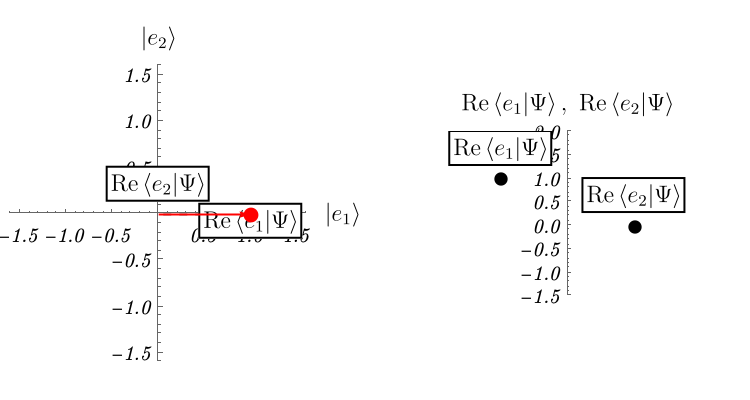
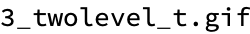

In [118]:
(* wave function: 2-level system, time evolution *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

eps=0.2;
H={{1,eps},{eps,1}};

tEnd=5*Pi;
Psi=NDSolveValue[{I*Derivative[1][Psi][t]==H.Psi[t],Psi[0]=={1,0}},Psi,{t,0,tEnd}];
pt:={Re[Psi[t][[1]]],Im[Psi[t][[2]]]};

tblplt={};
For[t=0,t<=tEnd,t=t+tEnd/100,
plt1=Plot[{10},{x,0,1},AspectRatio->1,AxesLabel->MaTeX[{"\\left| e_1 \\right>","\\left| e_2 \\right>"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Gray,Dashed,Line[{pt,pt.{1,0}*{1,0}}]},{Gray,Dashed,Line[{pt,pt.{0,1}*{0,1}}]},{Inset[Framed[Style[MaTeX["{\\rm Re} \\left< e_1 | \\Psi \\right>"]],Background->White,FrameMargins->None],pt.{1,0}*{1,0}-{0,0.1}]},{Inset[Framed[Style[MaTeX["{\\rm Re} \\left< e_2 | \\Psi \\right>"]],Background->White,FrameMargins->None],pt.{0,1}*{0,1}+{0,0.3}]},{Red,Arrow[{{0,0},pt}]},{Red,PointSize[0.05],Point[pt]}},ImageSize->200,PlotRange->{{-1.6,1.6},{-1.6,1.6}}];
plt2=Plot[{10},{x,-1,1},Axes->{None,Automatic},AxesLabel->MaTeX[{"","{\\rm Re} \\left< e_1 | \\Psi \\right>,~{\\rm Re} \\left< e_2 | \\Psi \\right>"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{PointSize[0.05],Point[{-0.5,pt[[1]]}]},{PointSize[0.05],Point[{0.5,pt[[2]]}]},{Inset[Framed[Style[MaTeX["{\\rm Re} \\left< e_1 | \\Psi \\right>"]],Background->White,FrameMargins->None],{-0.5,pt[[1]]}+{0,0.6}]},{Inset[Framed[Style[MaTeX["{\\rm Re} \\left< e_2 | \\Psi \\right>"]],Background->White,FrameMargins->None],{0.5,pt[[2]]}+{0,0.6}]}},ImageSize->200,PlotRange->{{-1,1},{-1.5,2}},PlotStyle->White,Ticks->{None,Automatic}];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}}]];
];
tblplt[[-1]]
Export["3_twolevel_t.gif",tblplt]


-Graphics-
3_twolevel_t_material.pdf
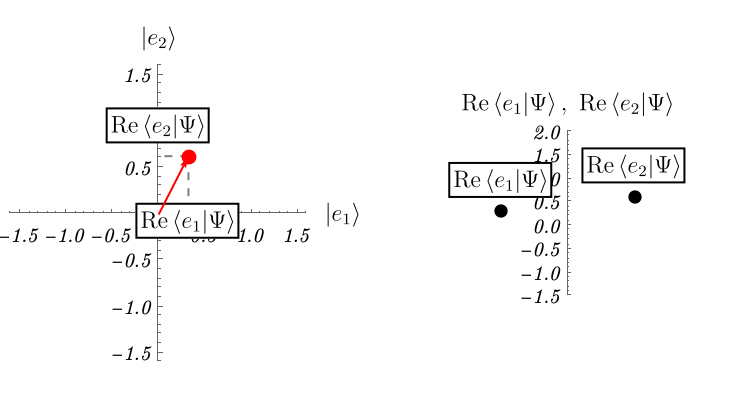
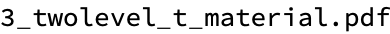

In [103]:
(* wave function: 2-level system, time evolution *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

eps=0.2;
H={{1,eps},{eps,1}};

tEnd=5*Pi;
Psi=NDSolveValue[{I*Derivative[1][Psi][t]==H.Psi[t],Psi[0]=={1,0}},Psi,{t,0,tEnd}];
pt:={Re[Psi[t][[1]]],Im[Psi[t][[2]]]};

t=3.25*Pi;
plt1=Plot[{10},{x,0,1},AspectRatio->1,AxesLabel->MaTeX[{"\\left| e_1 \\right>","\\left| e_2 \\right>"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Gray,Dashed,Line[{pt,pt.{1,0}*{1,0}}]},{Gray,Dashed,Line[{pt,pt.{0,1}*{0,1}}]},{Inset[Framed[Style[MaTeX["{\\rm Re} \\left< e_1 | \\Psi \\right>"]],Background->White,FrameMargins->None],pt.{1,0}*{1,0}-{0,0.1}]},{Inset[Framed[Style[MaTeX["{\\rm Re} \\left< e_2 | \\Psi \\right>"]],Background->White,FrameMargins->None],pt.{0,1}*{0,1}+{0,0.3}]},{Red,Arrow[{{0,0},pt}]},{Red,PointSize[0.05],Point[pt]}},ImageSize->200,PlotRange->{{-1.6,1.6},{-1.6,1.6}}];
plt2=Plot[{10},{x,-1,1},Axes->{None,Automatic},AxesLabel->MaTeX[{"","{\\rm Re} \\left< e_1 | \\Psi \\right>,~{\\rm Re} \\left< e_2 | \\Psi \\right>"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{PointSize[0.05],Point[{-0.5,pt[[1]]}]},{PointSize[0.05],Point[{0.5,pt[[2]]}]},{Inset[Framed[Style[MaTeX["{\\rm Re} \\left< e_1 | \\Psi \\right>"]],Background->White,FrameMargins->None],{-0.5,pt[[1]]}+{0,0.6}]},{Inset[Framed[Style[MaTeX["{\\rm Re} \\left< e_2 | \\Psi \\right>"]],Background->White,FrameMargins->None],{0.5,pt[[2]]}+{0,0.6}]}},ImageSize->200,PlotRange->{{-1,1},{-1.5,2}},PlotStyle->White,Ticks->{None,Automatic}];
plt=GraphicsGrid[{{plt1,plt2}}];
plt
Export["3_twolevel_t_material.pdf",plt]


-Graphics-
3_uncertainty.gif
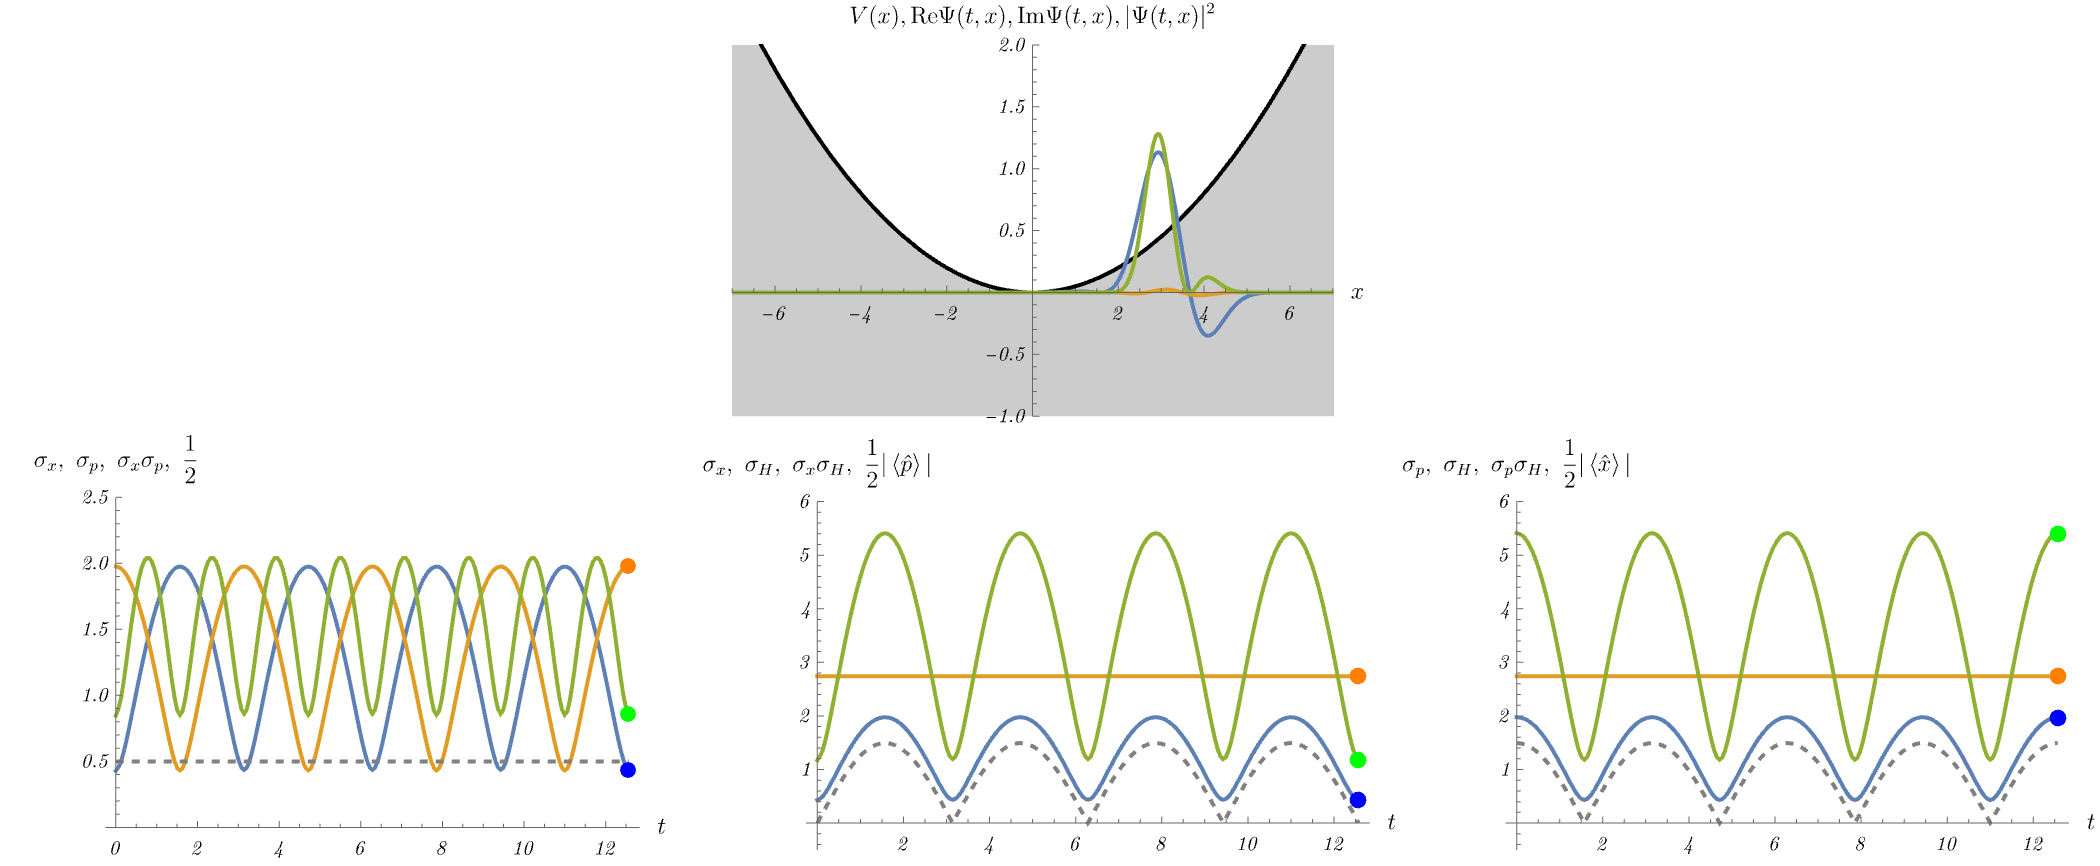
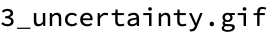

In [1729]:
(* uncertainty principle *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;
Off[General::munfl];

{tIni,tEnd,dt}={0,4*Pi,Pi/50};
{xMin,xMax,dx}={-10,10,0.1};

V[x_]=x^2/2;
PsiIni[x_]=Exp[-(x-3)^2]*(Sin[x]+Cos[2*x]);
PsiIni[x_]=Exp[-(x-3)^2]*(Sin[x]+Cos[2*x])/Sqrt[NIntegrate[Abs[PsiIni[x]]^2,{x,xMin,xMax}]];
Psi=NDSolveValue[{I*Derivative[1,0][Psi][t,x]==-(1/2)*Derivative[0,2][Psi][t,x]+V[x]*Psi[t,x],Psi[tIni,x]==PsiIni[x],Psi[t,xMin]==PsiIni[xMin],Psi[t,xMax]==PsiIni[xMax]},Psi,{t,tIni,tEnd},{x,xMin,xMax},Method->{"MethodOfLines","SpatialDiscretization"->{"TensorProductGrid","MinPoints"->200,"MaxPoints"->200}}];

tblplt1=Table[Show[Plot[{V[x]/10,-100},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Filling->{1->{2}},ImageSize->350,PlotRange->{{-7,7},{-1,2}},PlotStyle->Black],Plot[{Re[Psi[t,x]],Im[Psi[t,x]],Abs[Psi[t,x]]^2},{x,xMin,xMax},PlotRange->{-1,2}]],{t,tIni,tEnd,dt}];
tblt=Table[t,{t,tIni,tEnd,dt}];
tblxAve=Re[Table[Total[dx*Table[Conjugate[Psi[t,x]]*x*Psi[t,x],{x,xMin,xMax,dx}]],{t,tIni,tEnd,dt}]];
tblpAve=Re[Table[Total[dx*Table[Conjugate[Psi[t,x]]*(-I*Derivative[0,1][Psi][t,x]),{x,xMin,xMax,dx}]],{t,tIni,tEnd,dt}]];
HAve=Mean[Re[Table[Total[dx*Table[Conjugate[Psi[t,x]]*(I*Derivative[1,0][Psi][t,x]),{x,xMin,xMax,dx}]],{t,(tIni+tEnd)/2,tEnd,dt}]]];
tblHAve=Table[HAve,{t,tIni,tEnd,dt}];
tblSigmax=Sqrt[Re[Table[Total[dx*Table[Conjugate[Psi[t,x]]*x^2*Psi[t,x],{x,xMin,xMax,dx}]],{t,tIni,tEnd,dt}]-tblxAve^2]];
tblSigmap=Sqrt[Re[Table[Total[dx*Table[Conjugate[Psi[t,x]]*(-Derivative[0,2][Psi][t,x]),{x,xMin,xMax,dx}]],{t,tIni,tEnd,dt}]-tblpAve^2]];
SigmaH=Mean[Sqrt[Re[Table[Total[dx*Table[Conjugate[Psi[t,x]]*(-Derivative[2,0][Psi][t,x]),{x,xMin,xMax,dx}]],{t,(tIni+tEnd)/2,tEnd,dt}]-HAve^2]]];
tblSigmaH=Table[SigmaH,{t,tIni,tEnd,dt}];

tblplt2=Table[ListPlot[{Transpose[{tblt,tblSigmax}],Transpose[{tblt,tblSigmap}],Transpose[{tblt,tblSigmax*tblSigmap}],Transpose[{tblt,Table[1/2,{t,tIni,tEnd,dt}]}]},AxesLabel->MaTeX[{"t","\\sigma_x,~\\sigma_p,~\\sigma_x\\sigma_p,~\\frac{1}{2}"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Blue,PointSize[0.03],Point[{tblt[[i]],tblSigmax[[i]]}]},{Orange,PointSize[0.03],Point[{tblt[[i]],tblSigmap[[i]]}]},{Green,PointSize[0.03],Point[{tblt[[i]],tblSigmax[[i]]*tblSigmap[[i]]}]}},ImageSize->350,Joined->True,PlotRange->{0,2.5},PlotStyle->{Automatic,Automatic,Automatic,{Gray,Dashed}}],{i,1,Length[tblt]}];
tblplt3=Table[ListPlot[{Transpose[{tblt,tblSigmax}],Transpose[{tblt,tblSigmaH}],Transpose[{tblt,tblSigmax*tblSigmaH}],Transpose[{tblt,(1/2)*Abs[tblpAve]}]},AxesLabel->MaTeX[{"t","\\sigma_x,~\\sigma_H,~\\sigma_x\\sigma_H,~\\frac{1}{2} |\\left< \\hat{p} \\right>|"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Blue,PointSize[0.03],Point[{tblt[[i]],tblSigmax[[i]]}]},{Orange,PointSize[0.03],Point[{tblt[[i]],tblSigmaH[[i]]}]},{Green,PointSize[0.03],Point[{tblt[[i]],tblSigmax[[i]]*tblSigmaH[[i]]}]}},ImageSize->350,Joined->True,PlotRange->{-0.5,6},PlotStyle->{Automatic,Automatic,Automatic,{Gray,Dashed}}],{i,1,Length[tblt]}];
tblplt4=Table[ListPlot[{Transpose[{tblt,tblSigmap}],Transpose[{tblt,tblSigmaH}],Transpose[{tblt,tblSigmap*tblSigmaH}],Transpose[{tblt,(1/2)*Abs[tblxAve]}]},AxesLabel->MaTeX[{"t","\\sigma_p,~\\sigma_H,~\\sigma_p\\sigma_H,~\\frac{1}{2} |\\left< \\hat{x} \\right>|"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Blue,PointSize[0.03],Point[{tblt[[i]],tblSigmap[[i]]}]},{Orange,PointSize[0.03],Point[{tblt[[i]],tblSigmaH[[i]]}]},{Green,PointSize[0.03],Point[{tblt[[i]],tblSigmap[[i]]*tblSigmaH[[i]]}]}},ImageSize->350,Joined->True,PlotRange->{-0.5,6},PlotStyle->{Automatic,Automatic,Automatic,{Gray,Dashed}}],{i,1,Length[tblt]}];

tblplt=Table[GraphicsGrid[{{"",tblplt1[[i]],""},{tblplt2[[i]],tblplt3[[i]],tblplt4[[i]]}},ImageSize->1050,Spacings->0],{i,1,Length[tblt]}];
tblplt[[-1]]
Export["3_uncertainty.gif",tblplt]


-Graphics-
3_uncertainty_material.pdf
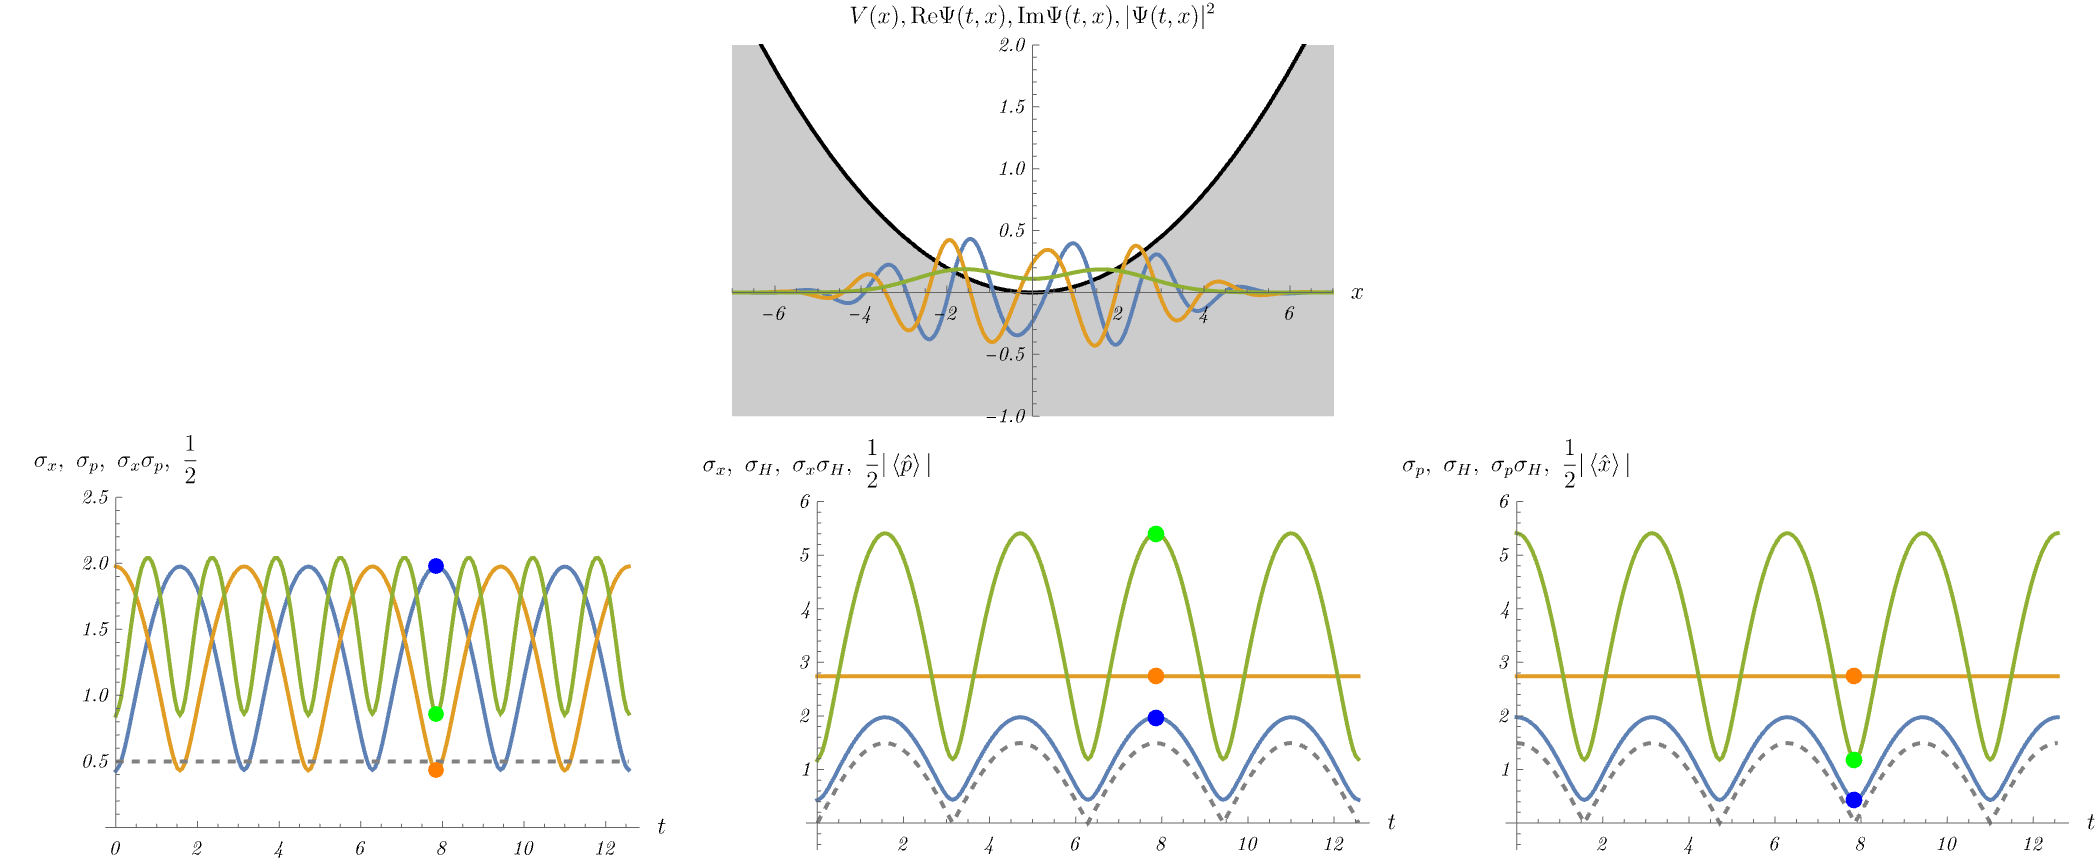
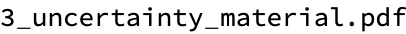

In [1551]:
(* uncertainty principle *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;
Off[General::munfl];

{tIni,tEnd,dt}={0,4*Pi,Pi/50};
{xMin,xMax,dx}={-10,10,0.1};

V[x_]=x^2/2;
PsiIni[x_]=Exp[-(x-3)^2]*(Sin[x]+Cos[2*x]);
PsiIni[x_]=Exp[-(x-3)^2]*(Sin[x]+Cos[2*x])/Sqrt[NIntegrate[Abs[PsiIni[x]]^2,{x,xMin,xMax}]];
Psi=NDSolveValue[{I*Derivative[1,0][Psi][t,x]==-(1/2)*Derivative[0,2][Psi][t,x]+V[x]*Psi[t,x],Psi[tIni,x]==PsiIni[x],Psi[t,xMin]==PsiIni[xMin],Psi[t,xMax]==PsiIni[xMax]},Psi,{t,tIni,tEnd},{x,xMin,xMax},Method->{"MethodOfLines","SpatialDiscretization"->{"TensorProductGrid","MinPoints"->200,"MaxPoints"->200}}];

tblplt1=Table[Show[Plot[{V[x]/10,-100},{x,xMin,xMax},AxesLabel->MaTeX[{"x","V(x), {\\rm Re}\\Psi(t,x), {\\rm Im}\\Psi(t,x), |\\Psi(t,x)|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Filling->{1->{2}},ImageSize->350,PlotRange->{{-7,7},{-1,2}},PlotStyle->Black],Plot[{Re[Psi[t,x]],Im[Psi[t,x]],Abs[Psi[t,x]]^2},{x,xMin,xMax},PlotRange->{-1,2}]],{t,tIni,tEnd,dt}];
tblt=Table[t,{t,tIni,tEnd,dt}];
tblxAve=Re[Table[Total[dx*Table[Conjugate[Psi[t,x]]*x*Psi[t,x],{x,xMin,xMax,dx}]],{t,tIni,tEnd,dt}]];
tblpAve=Re[Table[Total[dx*Table[Conjugate[Psi[t,x]]*(-I*Derivative[0,1][Psi][t,x]),{x,xMin,xMax,dx}]],{t,tIni,tEnd,dt}]];
HAve=Mean[Re[Table[Total[dx*Table[Conjugate[Psi[t,x]]*(I*Derivative[1,0][Psi][t,x]),{x,xMin,xMax,dx}]],{t,(tIni+tEnd)/2,tEnd,dt}]]];
tblHAve=Table[HAve,{t,tIni,tEnd,dt}];
tblSigmax=Sqrt[Re[Table[Total[dx*Table[Conjugate[Psi[t,x]]*x^2*Psi[t,x],{x,xMin,xMax,dx}]],{t,tIni,tEnd,dt}]-tblxAve^2]];
tblSigmap=Sqrt[Re[Table[Total[dx*Table[Conjugate[Psi[t,x]]*(-Derivative[0,2][Psi][t,x]),{x,xMin,xMax,dx}]],{t,tIni,tEnd,dt}]-tblpAve^2]];
SigmaH=Mean[Sqrt[Re[Table[Total[dx*Table[Conjugate[Psi[t,x]]*(-Derivative[2,0][Psi][t,x]),{x,xMin,xMax,dx}]],{t,(tIni+tEnd)/2,tEnd,dt}]-HAve^2]]];
tblSigmaH=Table[SigmaH,{t,tIni,tEnd,dt}];

tblplt2=Table[ListPlot[{Transpose[{tblt,tblSigmax}],Transpose[{tblt,tblSigmap}],Transpose[{tblt,tblSigmax*tblSigmap}],Transpose[{tblt,Table[1/2,{t,tIni,tEnd,dt}]}]},AxesLabel->MaTeX[{"t","\\sigma_x,~\\sigma_p,~\\sigma_x\\sigma_p,~\\frac{1}{2}"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Blue,PointSize[0.03],Point[{tblt[[i]],tblSigmax[[i]]}]},{Orange,PointSize[0.03],Point[{tblt[[i]],tblSigmap[[i]]}]},{Green,PointSize[0.03],Point[{tblt[[i]],tblSigmax[[i]]*tblSigmap[[i]]}]}},ImageSize->350,Joined->True,PlotRange->{0,2.5},PlotStyle->{Automatic,Automatic,Automatic,{Gray,Dashed}}],{i,1,Length[tblt]}];
tblplt3=Table[ListPlot[{Transpose[{tblt,tblSigmax}],Transpose[{tblt,tblSigmaH}],Transpose[{tblt,tblSigmax*tblSigmaH}],Transpose[{tblt,(1/2)*Abs[tblpAve]}]},AxesLabel->MaTeX[{"t","\\sigma_x,~\\sigma_H,~\\sigma_x\\sigma_H,~\\frac{1}{2} |\\left< \\hat{p} \\right>|"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Blue,PointSize[0.03],Point[{tblt[[i]],tblSigmax[[i]]}]},{Orange,PointSize[0.03],Point[{tblt[[i]],tblSigmaH[[i]]}]},{Green,PointSize[0.03],Point[{tblt[[i]],tblSigmax[[i]]*tblSigmaH[[i]]}]}},ImageSize->350,Joined->True,PlotRange->{-0.5,6},PlotStyle->{Automatic,Automatic,Automatic,{Gray,Dashed}}],{i,1,Length[tblt]}];
tblplt4=Table[ListPlot[{Transpose[{tblt,tblSigmap}],Transpose[{tblt,tblSigmaH}],Transpose[{tblt,tblSigmap*tblSigmaH}],Transpose[{tblt,(1/2)*Abs[tblxAve]}]},AxesLabel->MaTeX[{"t","\\sigma_p,~\\sigma_H,~\\sigma_p\\sigma_H,~\\frac{1}{2} |\\left< \\hat{x} \\right>|"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{{Blue,PointSize[0.03],Point[{tblt[[i]],tblSigmap[[i]]}]},{Orange,PointSize[0.03],Point[{tblt[[i]],tblSigmaH[[i]]}]},{Green,PointSize[0.03],Point[{tblt[[i]],tblSigmap[[i]]*tblSigmaH[[i]]}]}},ImageSize->350,Joined->True,PlotRange->{-0.5,6},PlotStyle->{Automatic,Automatic,Automatic,{Gray,Dashed}}],{i,1,Length[tblt]}];

tblplt=Table[GraphicsGrid[{{"",tblplt1[[i]],""},{tblplt2[[i]],tblplt3[[i]],tblplt4[[i]]}},ImageSize->1050,Spacings->0],{i,1,Length[tblt]}];
tblplt[[126]]
Export["3_uncertainty_material.pdf",tblplt[[126]]]


In [ ]:
4.Harmonic oscillator

-Graphics-
4_harmonic_1.gif
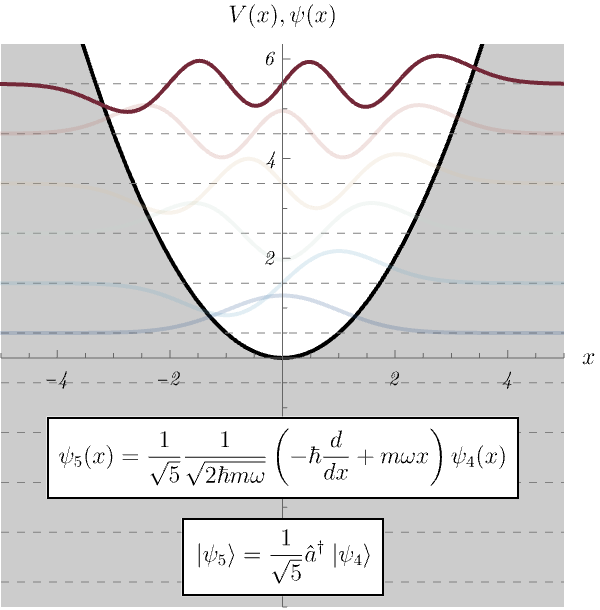
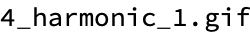

In [92]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

{xMin,xMax}={-5,5};
V[x_]=x^2/2;
a[phi_]:=(1/Sqrt[2])*(D[phi,x]+x*phi);
adagger[phi_]:=(1/Sqrt[2])*(-D[phi,x]+x*phi);
phi[0,x_]:=(1/Pi)^(1/4)*Exp[-x^2/2];
For[n=1,n<=10,n++,phi[n,x_]=(1/Sqrt[n])*adagger[phi[n-1,x]];];

m=0;
tblplt=Table[Show[
Plot[{V[x],-100},{x,xMin,xMax},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Filling->{1->{2}},Epilog->If[m==0,{Inset[Framed[Style[MaTeX["\\psi_0 (x) = \\left( \\frac{m \\omega}{\\pi \\hbar} \\right)^{\\frac{1}{4}} e^{- \\frac{m \\omega}{2 \\hbar} x^2}"]],Background->White],{0,-2}],Inset[Framed[Style[MaTeX["\\left. |\\psi_0 \\right>"]],Background->White],{0,-4}]},{Inset[Framed[Style[MaTeX["\\psi_{"<>ToString[m]<>"} (x) = \\frac{1}{\\sqrt{"<>ToString[m]<>"}} \\frac{1}{\\sqrt{2 \\hbar m \\omega}} \\left( - \\hbar \\frac{d}{dx} + m \\omega x \\right) \\psi_{"<>ToString[m-1]<>"} (x)"]],Background->White],{0,-2}],Inset[Framed[Style[MaTeX["\\left. |\\psi_{"<>ToString[m]<>"} \\right> = \\frac{1}{\\sqrt{"<>ToString[m]<>"}} \\hat{a}^\\dagger \\left. | \\psi_{"<>ToString[m-1]<>"} \\right>"]],Background->White],{0,-4}]}],ImageSize->300,PlotRange->{{-5,5},{-5,6.3}},PlotStyle->Black],Plot[Table[n+1/2,{n,-10,10}],{x,xMin,xMax},PlotStyle->{{Gray,Dashed,Thickness[0.002]}}],Table[Plot[(n+1/2)+phi[n,x],{x,xMin,xMax},PlotStyle->If[n==m,ColorData["RedBlueTones"][(5-n)/5],{Opacity[0.2],ColorData["RedBlueTones"][(5-n)/5]}],PlotRange->All],{n,0,5}]
],{m,0,5}];
tblplt[[-1]]
Export["4_harmonic_1.gif",tblplt,"DisplayDurations"->2]


-Graphics-
4_harmonic_2.gif
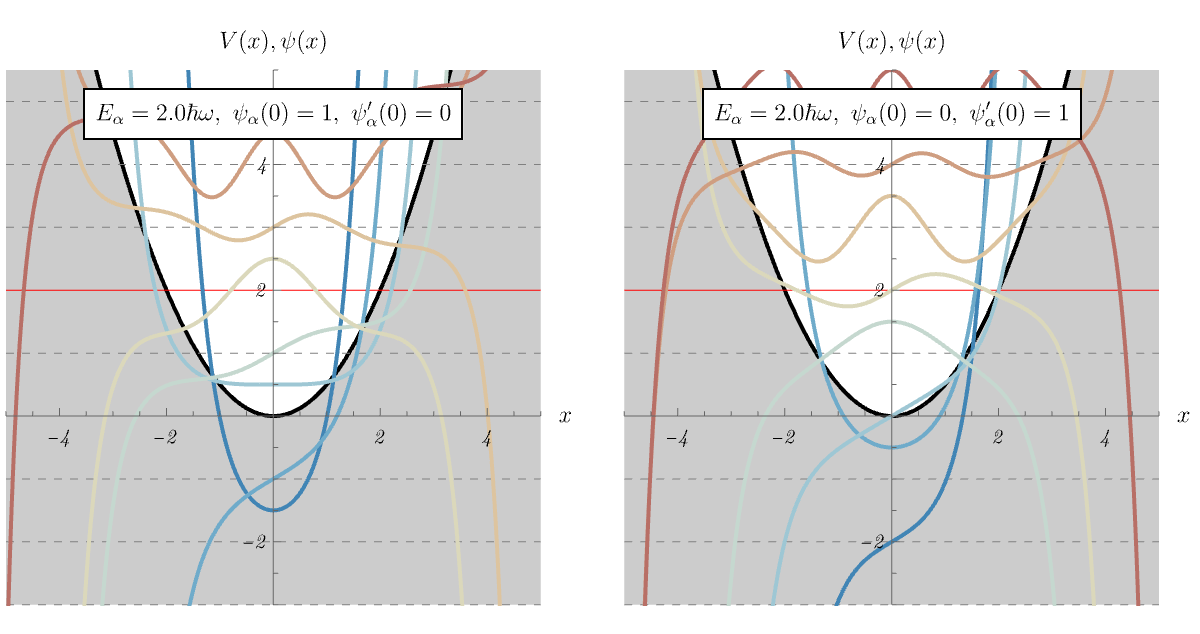
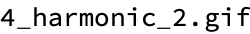

In [105]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

{xMin,xMax}={-5,5};
V[x_]=x^2/2;
a[phi_]:=(1/Sqrt[2])*(D[phi,x]+x*phi);
adagger[phi_]:=(1/Sqrt[2])*(-D[phi,x]+x*phi);
eps=10^(-3);

tblplt=Flatten[Table[

Ealpha=1/2+(1/10)*(iEalpha-5);
Clear[phialpha];

phialphaEven=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==Ealpha*phi[x],phi[0]==1,phi'[0]==0},phi,{x,xMin,xMax},AccuracyGoal->15,PrecisionGoal->15,WorkingPrecision->30];
phi[0,x_]=phialphaEven[x];
For[n=1,n<=3,n++,phi[n,x_]=adagger[phi[n-1,x]]];
For[n=1,n<=4,n++,phi[-n,x_]=a[phi[-n+1,x]]];
For[n=-4,n<=3,n++,phi0=(phi[n,eps]+phi[n,-eps])/2;phipr0=(phi[n,eps]-phi[n,-eps])/(2*eps);If[Abs[phi0]<eps&&Abs[phipr0]<eps,norm[n]=1];If[Abs[phi0]<eps&&Abs[phipr0]>eps,norm[n]=2*phipr0;];If[Abs[phi0]>eps&&Abs[phipr0]<eps,norm[n]=2*phi0;];If[Abs[phi0]>eps&&Abs[phipr0]>eps,norm[n]=1;];];
pltEven=Show[
Plot[{V[x],-100},{x,xMin,xMax},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Filling->{1->{2}},Epilog->{Inset[Framed[Style[MaTeX["E_\\alpha="<>StringPadRight[ToString[N[Round[10^3*Ealpha]/10^3]],3,"0"]<>"\\hbar \\omega,~\\psi_\\alpha (0) = 1,~\\psi_\\alpha' (0) = 0"]],Background->White],{0,4.8}]},ImageSize->250,PlotRange->{{-5,5},{-3,5.5}},PlotStyle->Black],
Plot[Table[Ealpha+n,{n,-10,10}],{x,xMin,xMax},PlotStyle->{{Gray,Dashed,Thickness[0.002]}}],
Plot[Ealpha,{x,xMin,xMax},PlotStyle->{{Red,Thickness[0.002]}}],
Table[Plot[Ealpha+n+phi[n,x]/norm[n],{x,If[Ealpha+n>0||norm[n]==1,xMin,-3],If[Ealpha+n>0||norm[n]==1,xMax,3]},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(5-n)/10]],{n,-4,3}]
];

phialphaOdd=NDSolveValue[{-(1/2)*phi''[x]+V[x]*phi[x]==Ealpha*phi[x],phi[0]==0,phi'[0]==1},phi,{x,xMin,xMax},AccuracyGoal->20,PrecisionGoal->20,WorkingPrecision->45];
phi[0,x_]=phialphaOdd[x];
For[n=1,n<=3,n++,phi[n,x_]=adagger[phi[n-1,x]]];
For[n=1,n<=4,n++,phi[-n,x_]=a[phi[-n+1,x]]];
For[n=-4,n<=3,n++,phi0=(phi[n,eps]+phi[n,-eps])/2;phipr0=(phi[n,eps]-phi[n,-eps])/(2*eps);If[Abs[phi0]<eps&&Abs[phipr0]<eps,norm[n]=1];If[Abs[phi0]<eps&&Abs[phipr0]>eps,norm[n]=2*phipr0;];If[Abs[phi0]>eps&&Abs[phipr0]<eps,norm[n]=2*phi0;];If[Abs[phi0]>eps&&Abs[phipr0]>eps,norm[n]=1;];];
pltOdd=Show[
Plot[{V[x],-100},{x,xMin,xMax},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Filling->{1->{2}},Epilog->{Inset[Framed[Style[MaTeX["E_\\alpha="<>StringPadRight[ToString[N[Round[10^3*Ealpha]/10^3]],3,"0"]<>"\\hbar \\omega,~\\psi_\\alpha (0) = 0,~\\psi_\\alpha' (0) = 1"]],Background->White],{0,4.8}]},ImageSize->250,PlotRange->{{-5,5},{-3,5.5}},PlotStyle->Black],
Plot[Table[Ealpha+n,{n,-10,10}],{x,xMin,xMax},PlotStyle->{{Gray,Dashed,Thickness[0.002]}}],
Plot[Ealpha,{x,xMin,xMax},PlotStyle->{{Red,Thickness[0.002]}}],
If[iEalpha!=17,Table[Plot[Ealpha+n+phi[n,x]/norm[n],{x,If[Ealpha+n>0||norm[n]==1,xMin,-3],If[Ealpha+n>0||norm[n]==1,xMax,3]},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(5-n)/10]],{n,-4,3}],Join[Table[ListPlot[Table[{x,Ealpha+n+phi[n,x]/norm[n]},{x,-2.05,2.05,0.1}],Joined->True,PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(5-n)/10]],{n,-4,-4}],Table[Plot[Ealpha+n+phi[n,x]/norm[n],{x,If[Ealpha+n>0||norm[n]==1,xMin,-3],If[Ealpha+n>0||norm[n]==1,xMax,3]},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(5-n)/10]],{n,-3,3}]]]
];

GraphicsGrid[{{pltEven,pltOdd}},ImageSize->600],
{iEalpha,1,20,1}]];

tblplt[[-1]]
Export["4_harmonic_2.gif",tblplt,"DisplayDurations"->1]


-Graphics-
4_susyqm_1.gif
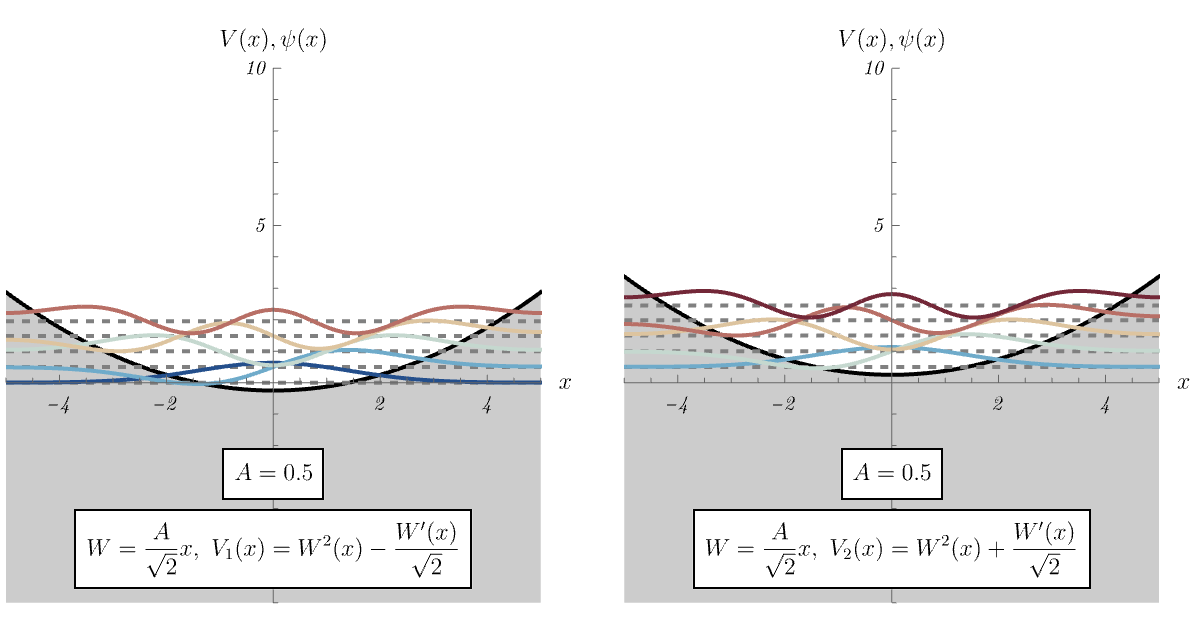
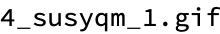

In [2]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

W[x_]=(A/Sqrt[2])*x;
V1[x_]=W[x]^2-(1/Sqrt[2])*W'[x];
V2[x_]=W[x]^2+(1/Sqrt[2])*W'[x];

tblplt={};
For[A=1/2,A<=3,A=A+1/10,
{ev1,ef1}=NDEigensystem[-(1/2)*psi''[x]+V1[x]*psi[x],psi[x],{x,-5,5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
{ev2,ef2}=NDEigensystem[-(1/2)*psi''[x]+V2[x]*psi[x],psi[x],{x,-5,5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
{sign1,sign2}={Sign[ef1/.{x->3}],Sign[ef2/.{x->3}]};
plt1=Show[Plot[{V1[x],-100},{x,-5,5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["A="<>StringPadRight[ToString[N[Round[10^3*A]/10^3]],3,"0"]]],Background->White],{0,-2.9}],Inset[Framed[Style[MaTeX["W = \\frac{A}{\\sqrt{2}} x,~V_1(x) = W^2(x) - \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{0,-5.3}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-5,5},{-7,10}},PlotStyle->Black],Plot[ev1,{x,-5,5},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev1+ef1/sign1)[[n]],{x,-5,5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(6-n)/5]],{n,1,5}]];
plt2=Show[Plot[{V2[x],-100},{x,-5,5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["A="<>StringPadRight[ToString[N[Round[10^3*A]/10^3]],3,"0"]]],Background->White],{0,-2.9}],Inset[Framed[Style[MaTeX["W = \\frac{A}{\\sqrt{2}} x,~V_2(x) = W^2(x) + \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{0,-5.3}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-5,5},{-7,10}},PlotStyle->Black],Plot[ev2,{x,-5,5},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev2+ef2/sign2)[[n]],{x,-5,5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(5-n)/5]],{n,1,5}]];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}},ImageSize->600]];
];
tblplt=Join[tblplt,Reverse[tblplt]];
tblplt[[-1]]
Export["4_susyqm_1.gif",tblplt]


-Graphics-
4_susyqm_1_material.pdf
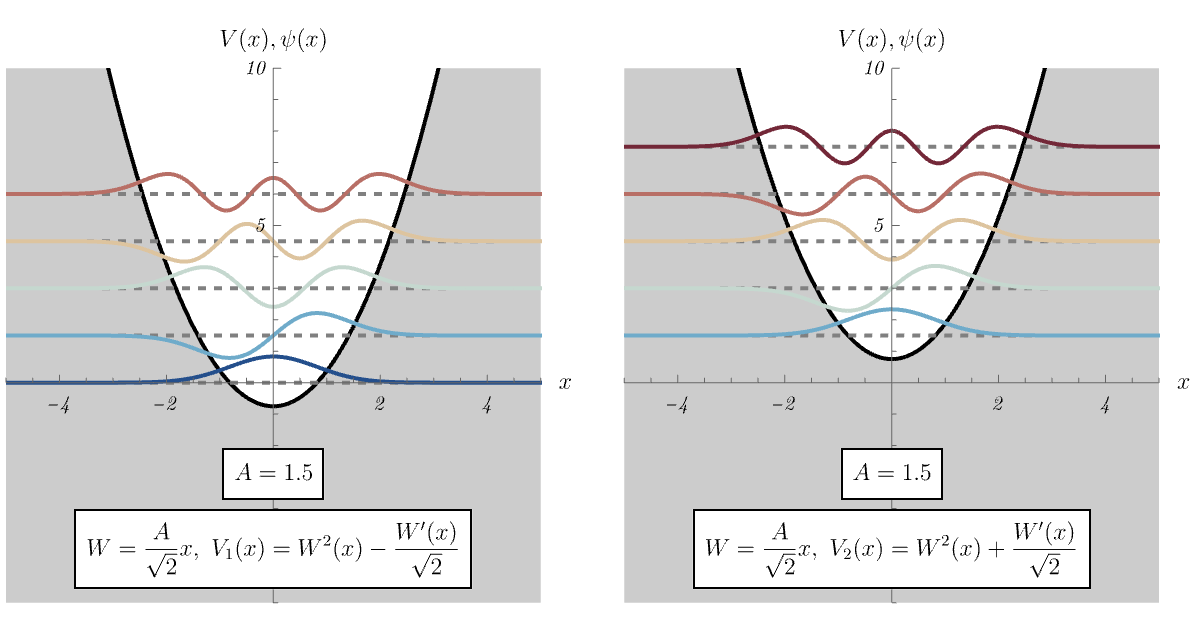
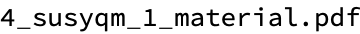

In [1620]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

W[x_]=(A/Sqrt[2])*x;
V1[x_]=W[x]^2-(1/Sqrt[2])*W'[x];
V2[x_]=W[x]^2+(1/Sqrt[2])*W'[x];

tblplt={};
For[A=1.5,A<=1.5,A=A+1/10,
{ev1,ef1}=NDEigensystem[-(1/2)*psi''[x]+V1[x]*psi[x],psi[x],{x,-5,5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
{ev2,ef2}=NDEigensystem[-(1/2)*psi''[x]+V2[x]*psi[x],psi[x],{x,-5,5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
{sign1,sign2}={Sign[ef1/.{x->3}],Sign[ef2/.{x->3}]};
plt1=Show[Plot[{V1[x],-100},{x,-5,5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["A="<>StringPadRight[ToString[N[Round[10^3*A]/10^3]],3,"0"]]],Background->White],{0,-2.9}],Inset[Framed[Style[MaTeX["W = \\frac{A}{\\sqrt{2}} x,~V_1(x) = W^2(x) - \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{0,-5.3}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-5,5},{-7,10}},PlotStyle->Black],Plot[ev1,{x,-5,5},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev1+ef1/sign1)[[n]],{x,-5,5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(6-n)/5]],{n,1,5}]];
plt2=Show[Plot[{V2[x],-100},{x,-5,5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["A="<>StringPadRight[ToString[N[Round[10^3*A]/10^3]],3,"0"]]],Background->White],{0,-2.9}],Inset[Framed[Style[MaTeX["W = \\frac{A}{\\sqrt{2}} x,~V_2(x) = W^2(x) + \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{0,-5.3}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-5,5},{-7,10}},PlotStyle->Black],Plot[ev2,{x,-5,5},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev2+ef2/sign2)[[n]],{x,-5,5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(5-n)/5]],{n,1,5}]];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}},ImageSize->600]];
];
tblplt[[-1]]
Export["4_susyqm_1_material.pdf",tblplt[[-1]]]


-Graphics-
4_susyqm_2.gif
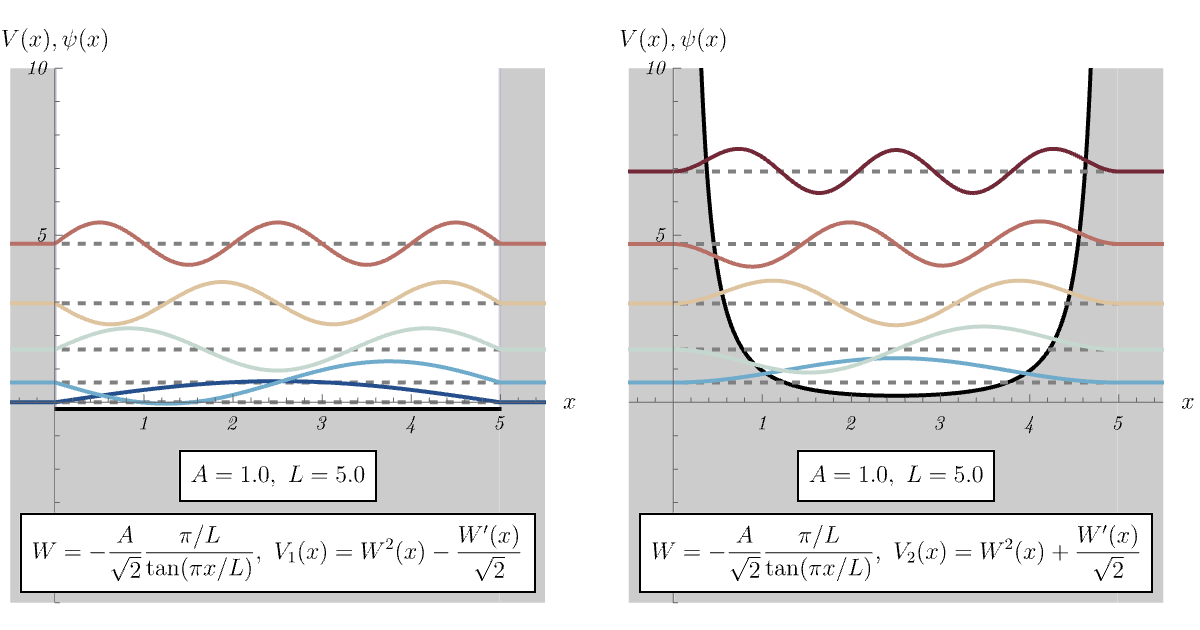
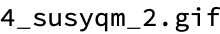

In [1]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

L=5;
W[x_]=-(A/Sqrt[2])*(Pi/L)*(1/Tan[Pi*Min[Max[x,0.01],L-0.01]/L]);
V1[x_]=W[x]^2-(1/Sqrt[2])*W'[x];
V2[x_]=W[x]^2+(1/Sqrt[2])*W'[x];

tblplt={};
For[A=1,A<=3,A=A+1/10,
{ev1,ef1}=NDEigensystem[-(1/2)*psi''[x]+V1[x]*psi[x],psi[x],{x,-0.5,L+0.5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
{ev2,ef2}=NDEigensystem[-(1/2)*psi''[x]+V2[x]*psi[x],psi[x],{x,-0.5,L+0.5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
{sign1,sign2}={Sign[ef1/.{x->L-0.1}],Sign[ef2/.{x->L-0.1}]};
plt1=Show[Plot[{V1[x],-100},{x,-0.5,L+0.5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["A="<>StringPadRight[ToString[N[Round[10^3*A]/10^3]],3,"0"]<>",~L="<>StringPadRight[ToString[N[Round[10^3*L]/10^3]],3,"0"]]],Background->White],{L/2,-2.2}],Inset[Framed[Style[MaTeX["W = - \\frac{A}{\\sqrt{2}} \\frac{\\pi / L}{\\tan (\\pi x/L)},~V_1(x) = W^2(x) - \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{L/2,-4.5}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-0.5,L+0.5},{-6,10}},PlotStyle->Black],Plot[ev1,{x,-1,L+1},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev1+ef1/sign1)[[n]],{x,-0.5,L+0.5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(6-n)/5]],{n,1,5}]];
plt2=Show[Plot[{V2[x],-100},{x,-0.5,L+0.5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["A="<>StringPadRight[ToString[N[Round[10^3*A]/10^3]],3,"0"]<>",~L="<>StringPadRight[ToString[N[Round[10^3*L]/10^3]],3,"0"]]],Background->White],{L/2,-2.2}],Inset[Framed[Style[MaTeX["W = - \\frac{A}{\\sqrt{2}} \\frac{\\pi / L}{\\tan (\\pi x/L)},~V_2(x) = W^2(x) + \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{L/2,-4.5}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-0.5,L+0.5},{-6,10}},PlotStyle->Black],Plot[ev2,{x,-1,L+1},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev2+ef2/sign2)[[n]],{x,-0.5,L+0.5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(5-n)/5]],{n,1,5}]];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}},ImageSize->600]];
];
tblplt=Join[Table[tblplt[[1]],{i,1,10}],tblplt[[2;;]]];
tblplt=Join[tblplt,Reverse[tblplt]];
tblplt[[-1]]
Export["4_susyqm_2.gif",tblplt]


-Graphics-
4_susyqm_2_material.pdf
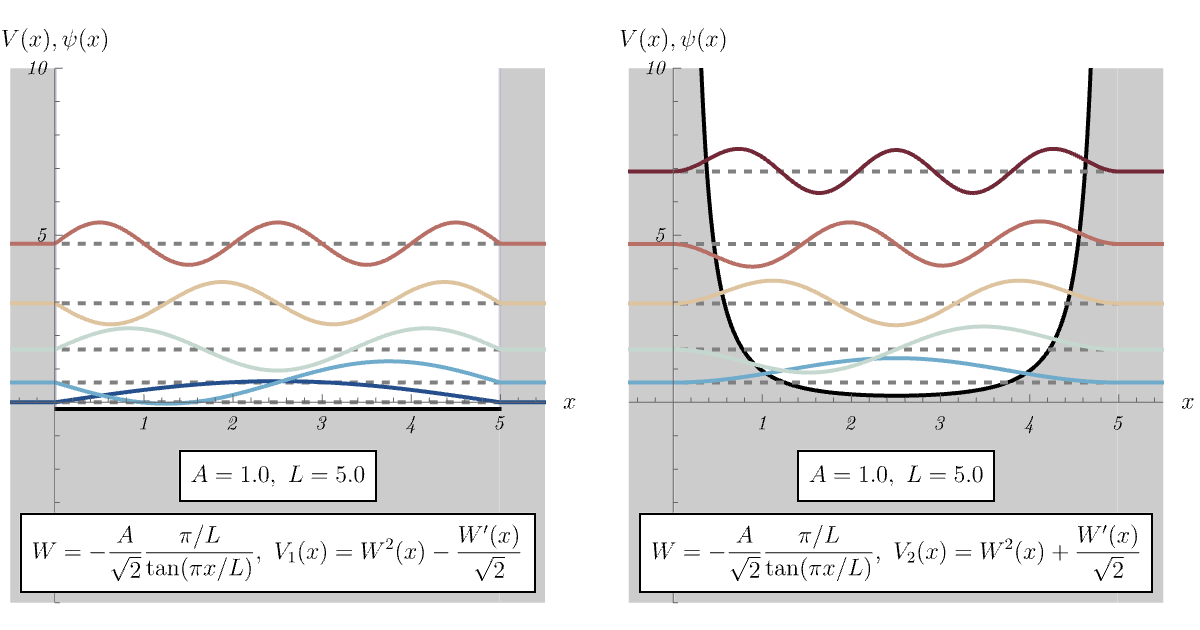
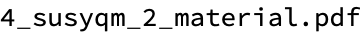

In [1589]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

L=5;
W[x_]=-(A/Sqrt[2])*(Pi/L)*(1/Tan[Pi*Min[Max[x,0.01],L-0.01]/L]);
V1[x_]=W[x]^2-(1/Sqrt[2])*W'[x];
V2[x_]=W[x]^2+(1/Sqrt[2])*W'[x];

tblplt={};
For[A=1,A<=1,A=A+1/10,
{ev1,ef1}=NDEigensystem[-(1/2)*psi''[x]+V1[x]*psi[x],psi[x],{x,-0.5,L+0.5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
{ev2,ef2}=NDEigensystem[-(1/2)*psi''[x]+V2[x]*psi[x],psi[x],{x,-0.5,L+0.5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
{sign1,sign2}={Sign[ef1/.{x->L-0.1}],Sign[ef2/.{x->L-0.1}]};
plt1=Show[Plot[{V1[x],-100},{x,-0.5,L+0.5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["A="<>StringPadRight[ToString[N[Round[10^3*A]/10^3]],3,"0"]<>",~L="<>StringPadRight[ToString[N[Round[10^3*L]/10^3]],3,"0"]]],Background->White],{L/2,-2.2}],Inset[Framed[Style[MaTeX["W = - \\frac{A}{\\sqrt{2}} \\frac{\\pi / L}{\\tan (\\pi x/L)},~V_1(x) = W^2(x) - \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{L/2,-4.5}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-0.5,L+0.5},{-6,10}},PlotStyle->Black],Plot[ev1,{x,-1,L+1},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev1+ef1/sign1)[[n]],{x,-0.5,L+0.5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(6-n)/5]],{n,1,5}]];
plt2=Show[Plot[{V2[x],-100},{x,-0.5,L+0.5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["A="<>StringPadRight[ToString[N[Round[10^3*A]/10^3]],3,"0"]<>",~L="<>StringPadRight[ToString[N[Round[10^3*L]/10^3]],3,"0"]]],Background->White],{L/2,-2.2}],Inset[Framed[Style[MaTeX["W = - \\frac{A}{\\sqrt{2}} \\frac{\\pi / L}{\\tan (\\pi x/L)},~V_2(x) = W^2(x) + \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{L/2,-4.5}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-0.5,L+0.5},{-6,10}},PlotStyle->Black],Plot[ev2,{x,-1,L+1},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev2+ef2/sign2)[[n]],{x,-0.5,L+0.5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(5-n)/5]],{n,1,5}]];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}},ImageSize->600]];
];
tblplt[[-1]]
Export["4_susyqm_2_material.pdf",tblplt[[-1]]]


-Graphics-
4_susyqm_3.gif
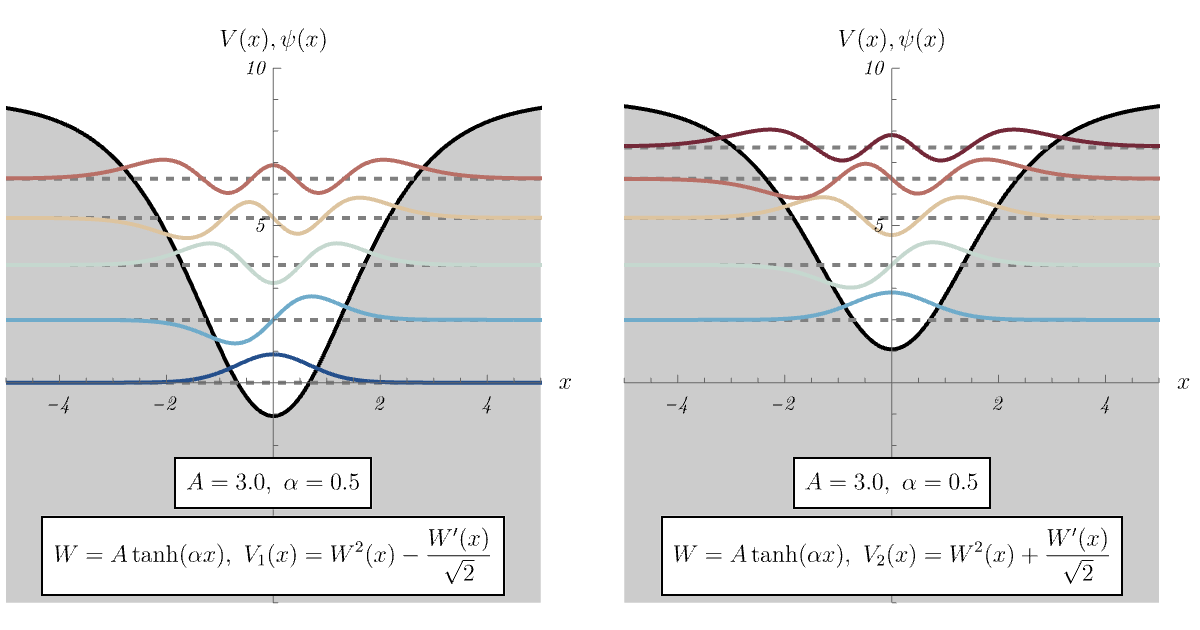
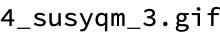

In [70]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

alpha=0.5;
W[x_]=A*Tanh[alpha*x];
V1[x_]=W[x]^2-(1/Sqrt[2])*W'[x];
V2[x_]=W[x]^2+(1/Sqrt[2])*W'[x];

tblplt={};
For[A=3,A<=6,A=A+1/10,
{ev1,ef1}=NDEigensystem[-(1/2)*psi''[x]+V1[x]*psi[x],psi[x],{x,-5,5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
{ev2,ef2}=NDEigensystem[-(1/2)*psi''[x]+V2[x]*psi[x],psi[x],{x,-5,5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
{sign1,sign2}={Sign[ef1/.{x->3}],Sign[ef2/.{x->3}]};
plt1=Show[Plot[{V1[x],-100},{x,-5,5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["A="<>StringPadRight[ToString[N[Round[10^3*A]/10^3]],3,"0"]<>",~\\alpha="<>StringPadRight[ToString[N[Round[10^3*alpha]/10^3]],3,"0"]]],Background->White],{0,-3.2}],Inset[Framed[Style[MaTeX["W = A \\tanh (\\alpha x),~V_1(x) = W^2(x) - \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{0,-5.5}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-5,5},{-7,10}},PlotStyle->Black],Plot[ev1,{x,-5,5},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev1+ef1/sign1)[[n]],{x,-5,5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(6-n)/5]],{n,1,5}]];
plt2=Show[Plot[{V2[x],-100},{x,-5,5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["A="<>StringPadRight[ToString[N[Round[10^3*A]/10^3]],3,"0"]<>",~\\alpha="<>StringPadRight[ToString[N[Round[10^3*alpha]/10^3]],3,"0"]]],Background->White],{0,-3.2}],Inset[Framed[Style[MaTeX["W = A \\tanh (\\alpha x),~V_2(x) = W^2(x) + \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{0,-5.5}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-5,5},{-7,10}},PlotStyle->Black],Plot[ev2,{x,-5,5},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev2+ef2/sign2)[[n]],{x,-5,5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(5-n)/5]],{n,1,5}]];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}},ImageSize->600]];
];
tblplt=Join[tblplt,Reverse[tblplt]];
tblplt[[-1]]
Export["4_susyqm_3.gif",tblplt]


-Graphics-
4_susyqm_3_material.pdf
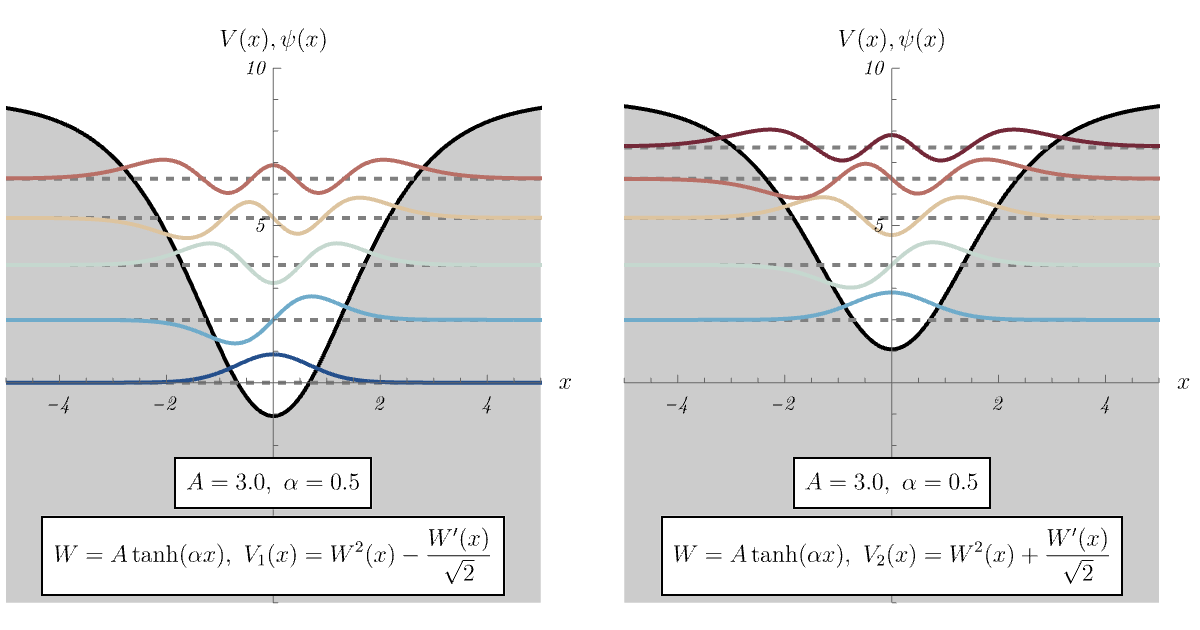
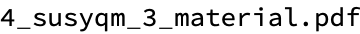

In [1630]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

alpha=0.5;
W[x_]=A*Tanh[alpha*x];
V1[x_]=W[x]^2-(1/Sqrt[2])*W'[x];
V2[x_]=W[x]^2+(1/Sqrt[2])*W'[x];

tblplt={};
For[A=3,A<=3,A=A+1/10,
{ev1,ef1}=NDEigensystem[-(1/2)*psi''[x]+V1[x]*psi[x],psi[x],{x,-5,5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
{ev2,ef2}=NDEigensystem[-(1/2)*psi''[x]+V2[x]*psi[x],psi[x],{x,-5,5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
{sign1,sign2}={Sign[ef1/.{x->3}],Sign[ef2/.{x->3}]};
plt1=Show[Plot[{V1[x],-100},{x,-5,5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["A="<>StringPadRight[ToString[N[Round[10^3*A]/10^3]],3,"0"]<>",~\\alpha="<>StringPadRight[ToString[N[Round[10^3*alpha]/10^3]],3,"0"]]],Background->White],{0,-3.2}],Inset[Framed[Style[MaTeX["W = A \\tanh (\\alpha x),~V_1(x) = W^2(x) - \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{0,-5.5}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-5,5},{-7,10}},PlotStyle->Black],Plot[ev1,{x,-5,5},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev1+ef1/sign1)[[n]],{x,-5,5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(6-n)/5]],{n,1,5}]];
plt2=Show[Plot[{V2[x],-100},{x,-5,5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["A="<>StringPadRight[ToString[N[Round[10^3*A]/10^3]],3,"0"]<>",~\\alpha="<>StringPadRight[ToString[N[Round[10^3*alpha]/10^3]],3,"0"]]],Background->White],{0,-3.2}],Inset[Framed[Style[MaTeX["W = A \\tanh (\\alpha x),~V_2(x) = W^2(x) + \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{0,-5.5}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-5,5},{-7,10}},PlotStyle->Black],Plot[ev2,{x,-5,5},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev2+ef2/sign2)[[n]],{x,-5,5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(5-n)/5]],{n,1,5}]];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}},ImageSize->600]];
];
tblplt[[-1]]
Export["4_susyqm_3_material.pdf",tblplt[[-1]]]


-Graphics-
4_susyqm_4_nonperturbative.gif
4_susyqm_4_nonperturbative_material.pdf
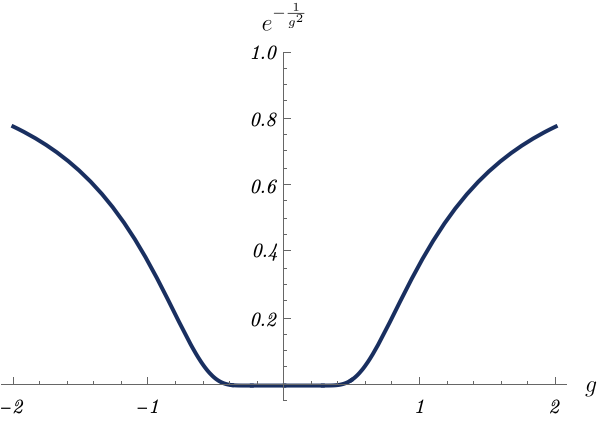
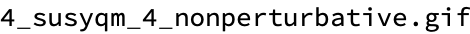
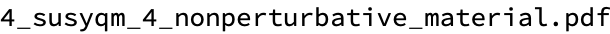

In [137]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

plt=Plot[Exp[-1/g^2],{g,-2,2},AxesLabel->MaTeX[{"g","e^{-\\frac{1}{g^2}}"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->300,PlotRange->{-0.05,1},PlotStyle->konjo]
Export["4_susyqm_4_nonperturbative.gif",plt]
Export["4_susyqm_4_nonperturbative_material.pdf",plt]


-Graphics-
4_susyqm_4.gif
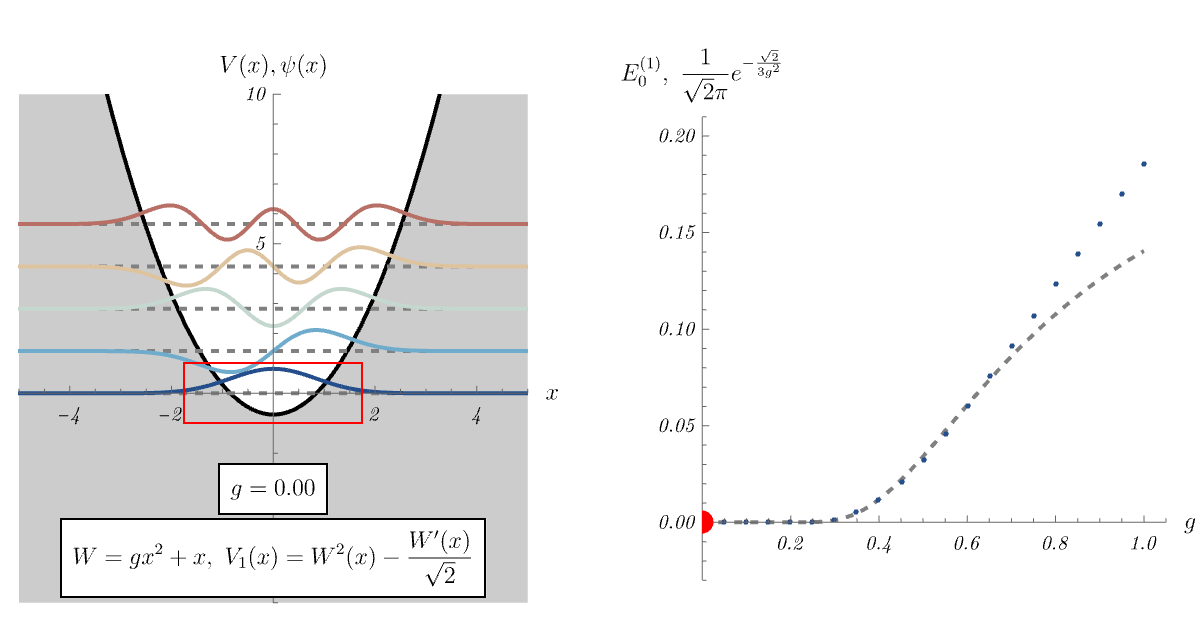
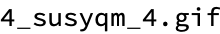

In [1658]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

W[x_]=g*x^2+x;
V1[x_]=W[x]^2-(1/Sqrt[2])*W'[x];
V2[x_]=W[x]^2+(1/Sqrt[2])*W'[x];

tblE0={{0., 0.000448819}, {0.05, 0.000451026}, {0.1, 0.000457561}, {0.15, 0.000468247}, {0.2, 0.000484394}, {0.25, 0.000614797}, {0.3, 0.00164341}, {0.35, 0.00497093}, {0.4, 0.0113979}, {0.45, 0.0207846}, {0.5, 0.0325247}, {0.55, 0.0459507}, {0.6, 0.0605005}, {0.65, 0.0757479}, {0.7, 0.0913857}, {0.75, 0.107198}, {0.8, 0.123037}, {0.85, 0.1388}, {0.9, 0.15442}, {0.95, 0.169853}, {1., 0.185072}};
(* tblE0={};For[g=0,g<=1,g=g+1/20,{ev1,ef1}=NDEigensystem[-(1/2)*psi''[x]+V1[x]*psi[x],psi[x],{x,-7,5},5];AppendTo[tblE0,{N[g],ev1[[1]]}];]; *)
tblplt={};
For[g=0,g<=1,g=g+1/20,
{ev1,ef1}=NDEigensystem[-(1/2)*psi''[x]+V1[x]*psi[x],psi[x],{x,-7,5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
sign1=Sign[ef1/.{x->3}];
plt1=Show[Plot[{V1[x],-100},{x,-5,5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["g="<>StringPadRight[ToString[N[Round[10^4*g]/10^4]],4,"0"]]],Background->White],{0,-3.2}],Inset[Framed[Style[MaTeX["W = g x^2 + x,~V_1(x) = W^2(x) - \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{0,-5.5}],Inset[Framed[Style["                ",14],Background->None,FrameStyle->Red],{0,0}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-5,5},{-7,10}},PlotStyle->Black],Plot[ev1,{x,-5,5},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev1+ef1/sign1)[[n]],{x,-5,5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(6-n)/5]],{n,1,5}]];
plt2=Show[Quiet[Plot[(Sqrt[2]/2/Pi)*Exp[-Sqrt[2]/3/gAnalytic^2],{gAnalytic,0,1},AspectRatio->1,AxesLabel->MaTeX[{"g","E_0^{(1)},~\\frac{1}{\\sqrt{2} \\pi} e^{- \\frac{\\sqrt{2}}{3 g^2}}"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Red,PointSize[0.05],Point[{g,ev1[[1]]}]},PlotRange->{{0,1.05},{-0.03,0.21}},PlotStyle->{Gray,Dashed}]],ListPlot[tblE0,AspectRatio->1,PlotRange->All,PlotStyle->ColorData["RedBlueTones"][1]]
];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}},ImageSize->600]];
];
tblplt=Join[tblplt,Reverse[tblplt]];
tblplt[[-1]]
Export["4_susyqm_4.gif",tblplt]


-Graphics-
4_susyqm_4_material.pdf
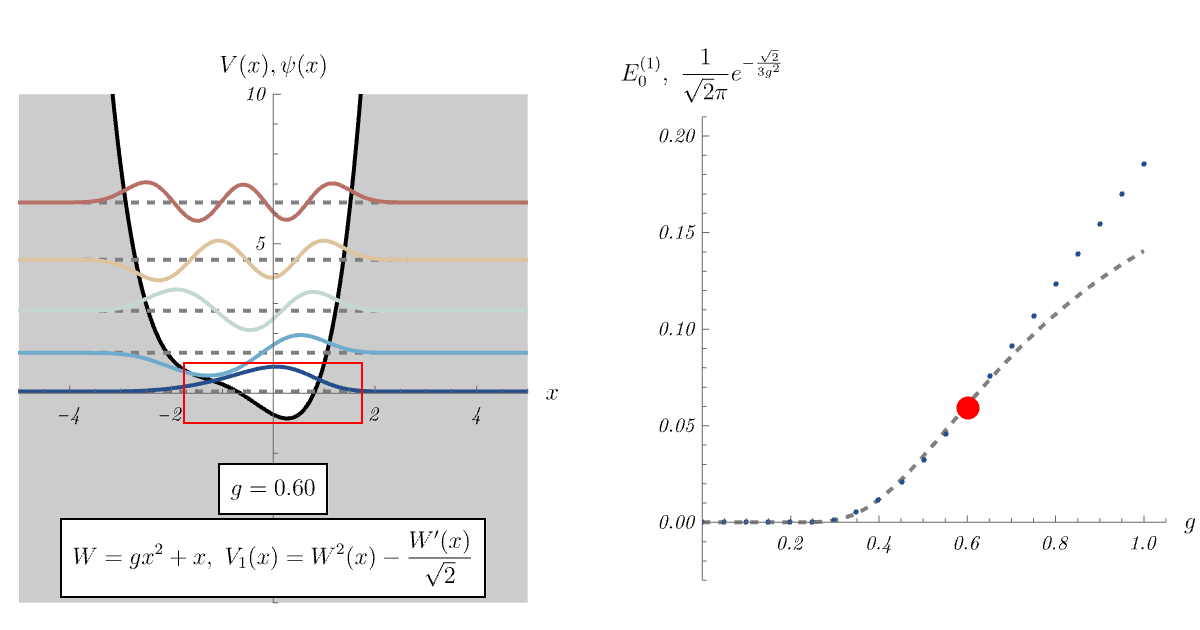
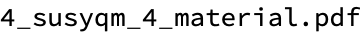

In [1671]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

W[x_]=g*x^2+x;
V1[x_]=W[x]^2-(1/Sqrt[2])*W'[x];
V2[x_]=W[x]^2+(1/Sqrt[2])*W'[x];

tblE0={{0., 0.000448819}, {0.05, 0.000451026}, {0.1, 0.000457561}, {0.15, 0.000468247}, {0.2, 0.000484394}, {0.25, 0.000614797}, {0.3, 0.00164341}, {0.35, 0.00497093}, {0.4, 0.0113979}, {0.45, 0.0207846}, {0.5, 0.0325247}, {0.55, 0.0459507}, {0.6, 0.0605005}, {0.65, 0.0757479}, {0.7, 0.0913857}, {0.75, 0.107198}, {0.8, 0.123037}, {0.85, 0.1388}, {0.9, 0.15442}, {0.95, 0.169853}, {1., 0.185072}};
(* tblE0={};For[g=0,g<=1,g=g+1/20,{ev1,ef1}=NDEigensystem[-(1/2)*psi''[x]+V1[x]*psi[x],psi[x],{x,-7,5},5];AppendTo[tblE0,{N[g],ev1[[1]]}];]; *)
tblplt={};
For[g=0.6,g<=0.6,g=g+1/20,
{ev1,ef1}=NDEigensystem[-(1/2)*psi''[x]+V1[x]*psi[x],psi[x],{x,-7,5},5,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure" ->0.05}}}];
sign1=Sign[ef1/.{x->3}];
plt1=Show[Plot[{V1[x],-100},{x,-5,5},AspectRatio->1,AxesLabel->MaTeX[{"x","V(x), \\psi(x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset[Framed[Style[MaTeX["g="<>StringPadRight[ToString[N[Round[10^4*g]/10^4]],4,"0"]]],Background->White],{0,-3.2}],Inset[Framed[Style[MaTeX["W = g x^2 + x,~V_1(x) = W^2(x) - \\frac{W'(x)}{\\sqrt{2}}"]],Background->White],{0,-5.5}],Inset[Framed[Style["                ",14],Background->None,FrameStyle->Red],{0,0}]},Filling->{1->{2}},ImageSize->300,PlotRange->{{-5,5},{-7,10}},PlotStyle->Black],Plot[ev1,{x,-5,5},PlotStyle->{{Gray,Dashed}}],Table[Plot[(ev1+ef1/sign1)[[n]],{x,-5,5},PlotRange->All,PlotStyle->ColorData["RedBlueTones"][(6-n)/5]],{n,1,5}]];
plt2=Show[Quiet[Plot[(Sqrt[2]/2/Pi)*Exp[-Sqrt[2]/3/gAnalytic^2],{gAnalytic,0,1},AspectRatio->1,AxesLabel->MaTeX[{"g","E_0^{(1)},~\\frac{1}{\\sqrt{2} \\pi} e^{- \\frac{\\sqrt{2}}{3 g^2}}"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Red,PointSize[0.05],Point[{g,ev1[[1]]}]},PlotRange->{{0,1.05},{-0.03,0.21}},PlotStyle->{Gray,Dashed}]],ListPlot[tblE0,AspectRatio->1,PlotRange->All,PlotStyle->ColorData["RedBlueTones"][1]]
];
AppendTo[tblplt,GraphicsGrid[{{plt1,plt2}},ImageSize->600]];
];
tblplt[[-1]]
Export["4_susyqm_4_material.pdf",tblplt[[-1]]]


In [ ]:
5.Hydrogen

-Graphics3D-
5_spherical.gif
5_spherical_material.pdf
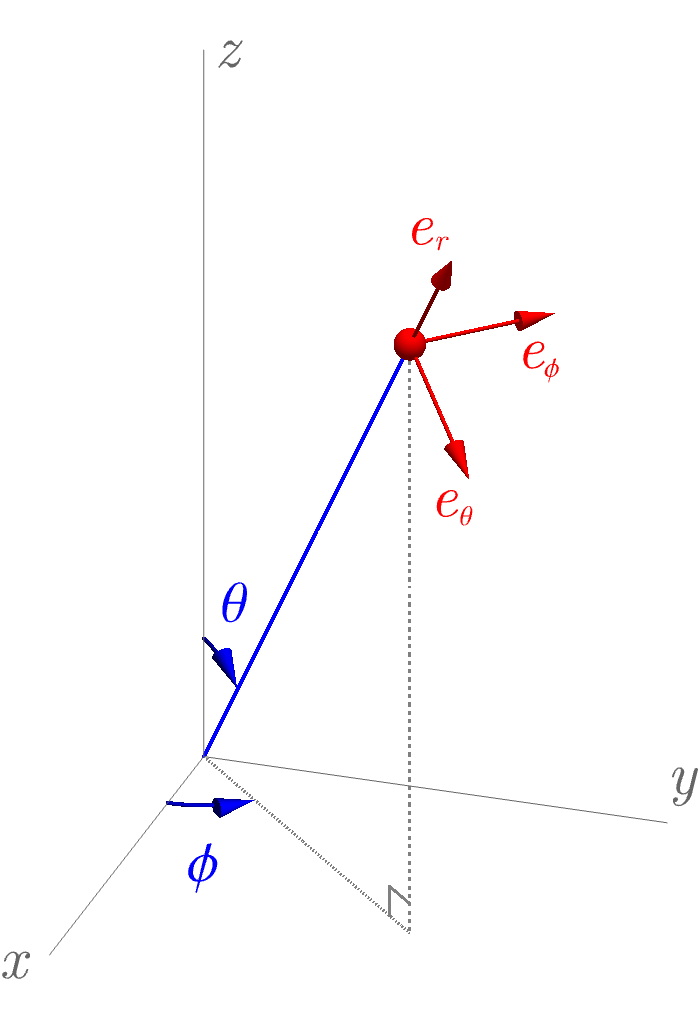
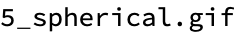
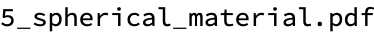

In [3294]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

v={2,2,4};
n=v/Norm[v];
m={-n[[2]],n[[1]],0}/Norm[{-n[[2]],n[[1]],0}];
l={n[[3]]*(n[[1]]/Sqrt[n[[1]]^2+n[[2]]^2]),n[[3]]*(n[[2]]/Sqrt[n[[1]]^2+n[[2]]^2]),-Sqrt[n[[1]]^2+n[[2]]^2]};

plt=Show[
ParametricPlot3D[v*t,{t,0,1},Axes->True,AxesLabel->{"x","y","z"},AxesOrigin->{0,0,0},BaseStyle->{FontFamily->"Latin Modern Roman",FontSize->30},Boxed->False,BoxRatios->{1.5,1.5,1.2}*v,Epilog->{{Blue,Inset["\[Theta]",{0.3,0.4}]},{Blue,Inset["\[Phi]",{0.25,-0.02}]},{Red,Inset[Style["e",30],{0.6,1.01}],Inset[Style["r",15],{0.635,0.98}]},{Red,Inset[Style["e",30],{0.64,0.57}],Inset[Style["\[Theta]",15],{0.675,0.535}]},{Red,Inset[Style["e",30],{0.78,0.81}],Inset[Style["\[Phi]",15],{0.815,0.775}]}},ImageSize->350,PlotRange->{1.5*{0,v[[1]]},1.5*{0,v[[2]]},1.2*{0,v[[3]]}},PlotStyle->Blue,Ticks->None,ViewPoint->1000*{3,1,1.5}],
Graphics3D[{Red,Ball[{v},0.1]}],
Graphics3D[{Thickness[0.005],Red,Arrowheads[0.04],Arrow[Tube[{v,v+n}]]}],
Graphics3D[{Thickness[0.005],Red,Arrowheads[0.04],Arrow[Tube[{v,v+m}]]}],
Graphics3D[{Thickness[0.005],Red,Arrowheads[0.04],Arrow[Tube[{v,v+l}]]}],
Graphics3D[{Thickness[0.005],Gray,Dashed,Line[{{0,0,0},{1,1,0}*v}]}],
Graphics3D[{Thickness[0.005],Gray,Dashed,Line[{v,{1,1,0}*v}]}],
Graphics3D[{Thickness[0.005],Gray,Line[{0.9*{1,1,0}*v,0.9*{1,1,0}*v+{0,0,0.2},{1,1,0}*v+{0,0,0.2}}]}],
Graphics3D[{Thickness[0.01],Blue,Arrowheads[0.04],Arrow[Tube[Table[0.7*{Cos[phi],Sin[phi],0},{phi,0,ArcTan[v[[1]],v[[2]]],0.01}]]]}],
Graphics3D[{Thickness[0.01],Blue,Arrowheads[0.04],Arrow[Tube[Table[phi=ArcTan[v[[1]],v[[2]]];0.8*{Sin[theta]*Cos[phi],Sin[theta]*Sin[phi],Cos[theta]},{theta,0,ArcTan[v[[3]],Sqrt[v[[1]]^2+v[[2]]^2]],0.01}]]]}]
];
plt
Export["5_spherical.gif",plt]
Export["5_spherical_material.pdf",plt]


Legended[-Graphics-, Placed[Framed[LineLegend[{RGBColor[0.139681, 0.311666, 0.550652], 
 
>       RGBColor[0.433786, 0.670834, 0.793785], RGBColor[0.771923, 0.848195, 0.811697], 
 
>       RGBColor[0.865768, 0.767491, 0.623596], RGBColor[0.721701, 0.434448, 0.400225], 
 
>       RGBColor[0.450385, 0.157961, 0.217975]}, 
 
>      {-Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-}, 
 
>      LegendLabel -> -Graphics-], FrameStyle -> GrayLevel[0], RoundingRadius -> 5, 
 
>     FrameMargins -> 0, Background -> GrayLevel[1]], After, Identity]]
Legended[-Graphics-, Placed[Framed[LineLegend[{RGBColor[0.139681, 0.311666, 0.550652], 
 
>       RGBColor[0.526748, 0.725982, 0.812452], RGBColor[0.857126, 0.848339, 0.734867], 
 
>       RGBColor[0.767426, 0.526085, 0.453976], RGBColor[0.450385, 0.157961, 0.217975]}, 
 
>      {-Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-}, 
 
>      LegendLabel -> -Graphics-], FrameStyle -> GrayLevel[0], RoundingRadius -> 5, 
 
>     FrameMargins -> 0, Background -> GrayLevel[1]], After, Identity]]
5_Pl_material.pdf
5_Plm_material.pdf
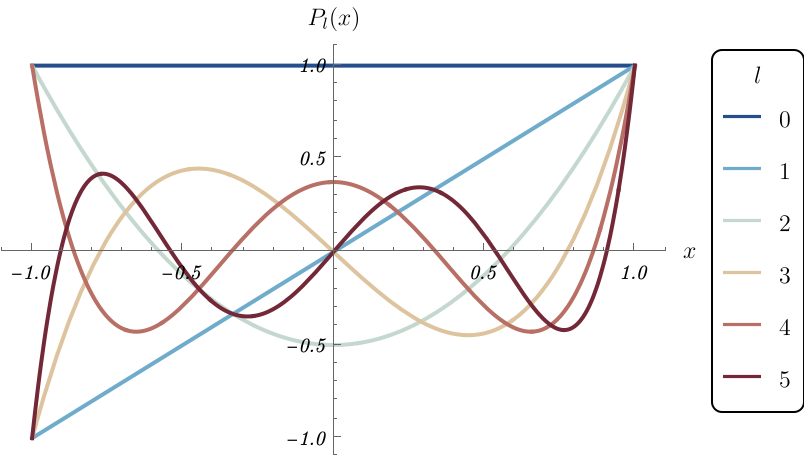
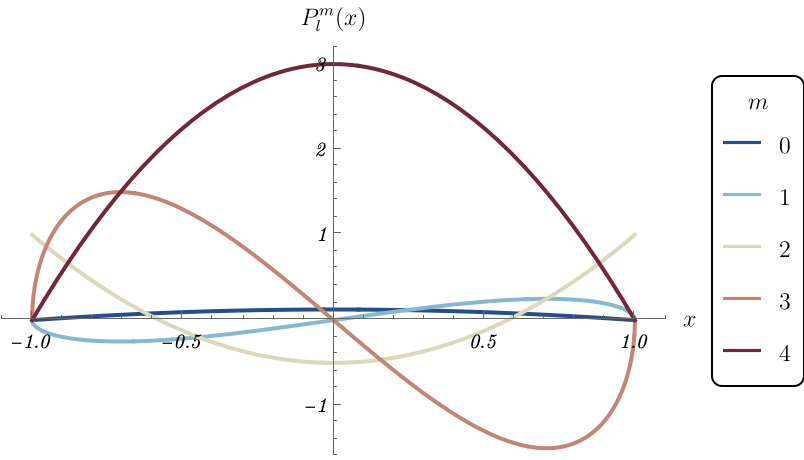
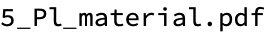
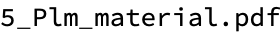

In [3453]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

leg1=Framed[LineLegend[Table[ColorData["RedBlueTones"][1-l/5],{l,0,5}],Table[MaTeX[ToString[l]],{l,0,5}],LegendLabel->MaTeX["l"]],FrameStyle->Black,RoundingRadius->5,FrameMargins->0,Background->White];
leg2=Framed[LineLegend[Table[ColorData["RedBlueTones"][1-(m+2)/4],{m,-2,2}],Table[MaTeX[ToString[n]],{n,0,5}],LegendLabel->MaTeX["m"]],FrameStyle->Black,RoundingRadius->5,FrameMargins->0,Background->White];
plt1=Show[Table[Plot[LegendreP[l,x],{x,-1,1},AxesLabel->MaTeX[{"x","P_l (x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->350,PlotLegends->If[l==0,leg1,None],PlotRange->{{-1.1,1.1},{-1.1,1.1}},PlotStyle->ColorData["RedBlueTones"][1-l/5]],{l,0,5}]];
plt2=Show[Table[Plot[LegendreP[2,m,x],{x,-1,1},AxesLabel->MaTeX[{"x","P_l^m (x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->350,PlotLegends->If[m==0,leg2,None],PlotRange->{{-1.1,1.1},{-1.6,3.2}},PlotStyle->ColorData["RedBlueTones"][1-(m+2)/4]],{m,-2,2}]];

plt1
plt2
Export["5_Pl_material.pdf",plt1]
Export["5_Plm_material.pdf",plt2]


In [2174]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

tblplt={};
For[l=0,l<=3,l++,
tblpltsub={};
For[m=-3,m<=3,m++,
pr={{-0.6,0.6},{-0.6,0.6},{-0.8,0.8}};
plt=If[Abs[m]>l,Null,SphericalPlot3D[0,{theta,0,Pi},{phi,0,2*Pi},BoxRatios->{1.2,1.2,1.6},BaseStyle->{FontFamily->"Latin Modern Roman"},Boxed->False,ColorFunction->Function[{x,y,z,theta,phi,r},White],ColorFunctionScaling->False,Epilog->Inset[Style["("<>ToString[l]<>",\[ThinSpace]"<>ToString[m]<>"\[ThinSpace])",32],{0.5,1.2}],ImageSize->200,Mesh->None,PlotPoints->10,PlotRange->pr,Ticks->None,ViewPoint->1000*{0,-2,1}
]
];
AppendTo[tblpltsub,plt];
];
AppendTo[tblplt,tblpltsub];
];

plt=GraphicsGrid[tblplt,Frame->All,FrameStyle->Thickness[0.001],ImageSize->1400,Spacings->0];
Export["5_Ylm_blanck_material.pdf",plt]


5_Ylm_blanck_material.pdf

-Graphics-
5_Ylm.gif
5_Ylm_material.pdf
5_Ylm_leg.gif
5_Ylm_leg_material.pdf
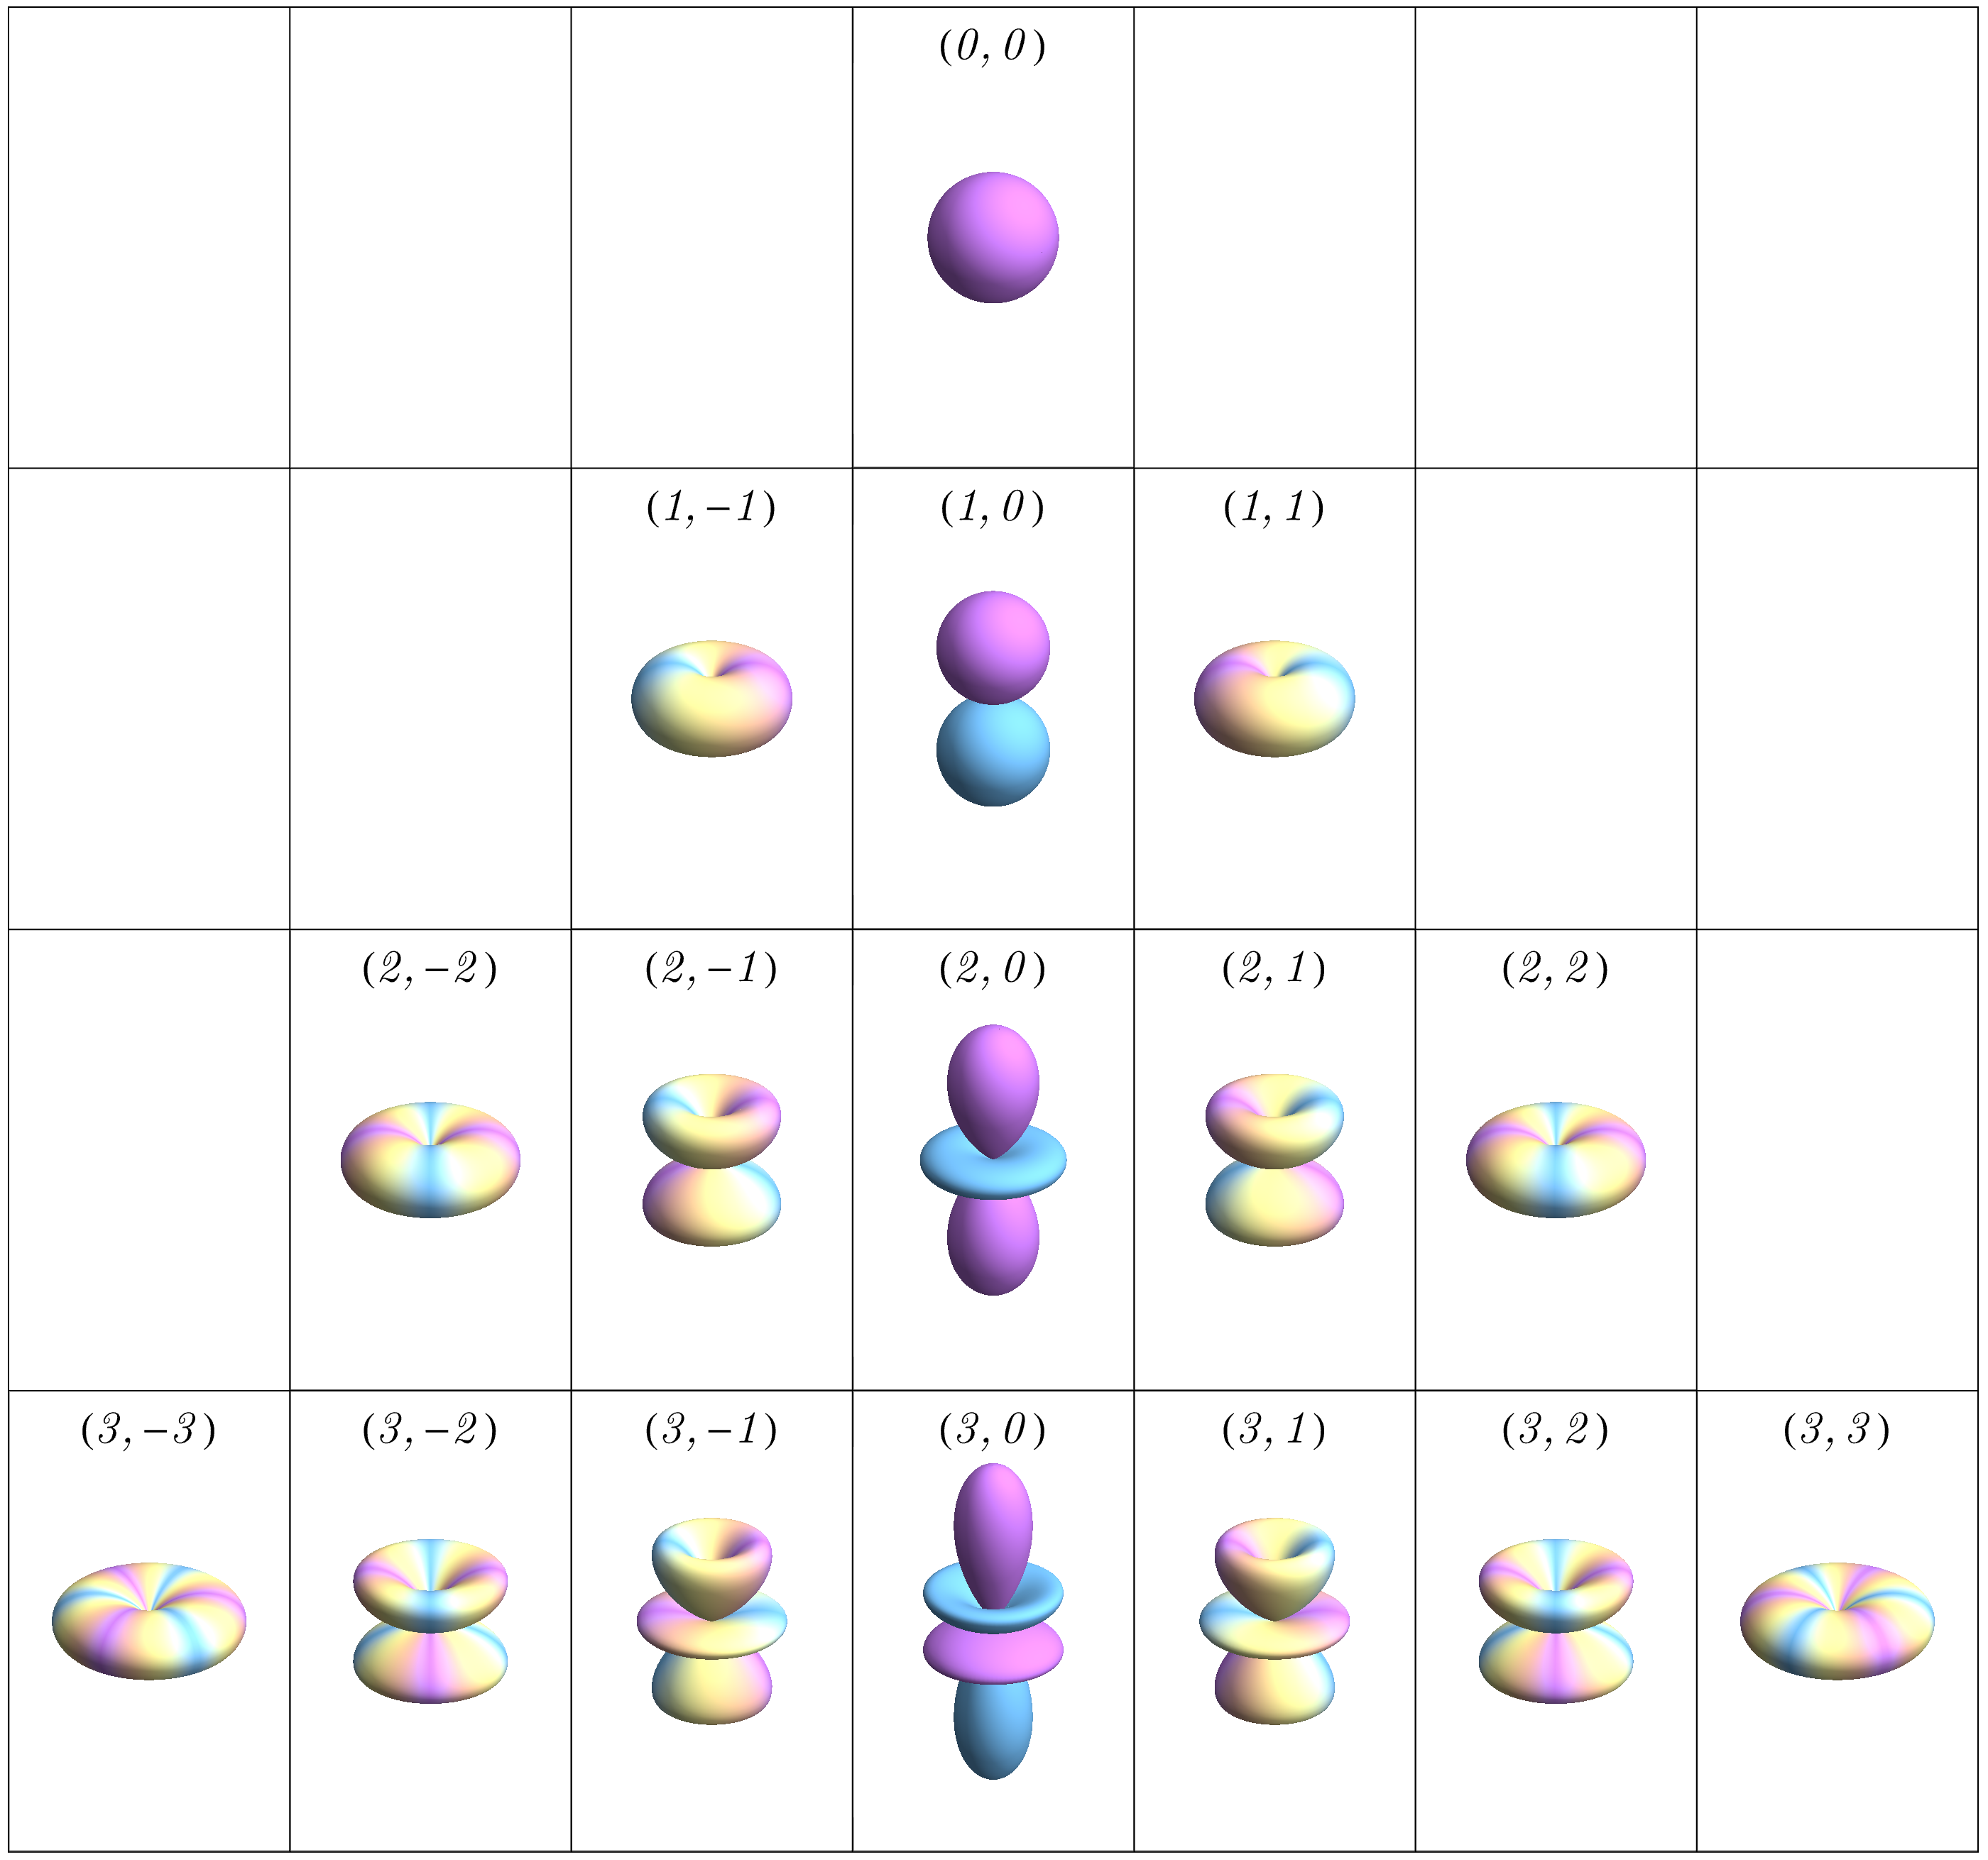
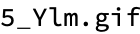
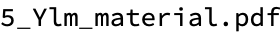
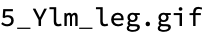
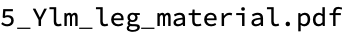

In [2181]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

Y[l_,m_,theta_,phi_]=SphericalHarmonicY[l,m,theta,phi];
c[x_]=ColorData["Pastel"][x];

tblplt={};
For[l=0,l<=3,l++,
tblpltsub={};
For[m=-3,m<=3,m++,
pr={{-0.6,0.6},{-0.6,0.6},{-0.8,0.8}};
plt=If[Abs[m]>l,Null,SphericalPlot3D[Abs[Y[l,m,theta,phi]],{theta,0,Pi},{phi,0,2*Pi},BoxRatios->{1.2,1.2,1.6},BaseStyle->{FontFamily->"Latin Modern Roman"},Boxed->False,ColorFunction->Function[{x,y,z,theta,phi,r},c[1-Abs[1-Abs[Arg[Y[l,m,theta,phi]]]/Pi]]],ColorFunctionScaling->False,Epilog->Inset[Style["("<>ToString[l]<>",\[ThinSpace]"<>ToString[m]<>"\[ThinSpace])",32],{0.5,1.2}],ImageSize->200,Lighting->"Neutral",Mesh->None,PlotPoints->100,PlotRange->pr,Ticks->None,ViewPoint->1000*{0,-2,1}]];
AppendTo[tblpltsub,plt];
];
AppendTo[tblplt,tblpltsub];
];

plt=GraphicsGrid[tblplt,Frame->All,ImageSize->1400,Spacings->0];
plt
Export["5_Ylm.gif",plt]
Export["5_Ylm_material.pdf",plt]

leg=BarLegend[{c[1-Abs[1-Abs[#]/Pi]]&,{-Pi-0.01,Pi+0.01}},LegendLabel->MaTeX["{\\rm arg}(Y_{lm} (\\theta, \\phi))"],LegendLayout->"Row",Ticks->{{-Pi,MaTeX["-\\pi"]},{-Pi/2,MaTeX["-\\pi / 2"]},{0,MaTeX["0"]},{Pi/2,MaTeX["\\pi / 2"]},{Pi,MaTeX["\\pi"]}}];
Export["5_Ylm_leg.gif",leg]
Export["5_Ylm_leg_material.pdf",leg]


In [2195]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

Y[l_,m_,theta_,phi_]=SphericalHarmonicY[l,m,theta,phi];
c[x_]=ColorData["Pastel"][x];

{l,m}={50,25};
pr={{-0.6,0.6},{-0.6,0.6},{-0.8,0.8}};
plt=SphericalPlot3D[Abs[Y[l,m,theta,phi]],{theta,0,Pi},{phi,0,2*Pi},BoxRatios->{1.2,1.2,1.6},BaseStyle->{FontFamily->"Latin Modern Roman"},Boxed->False,ColorFunction->Function[{x,y,z,theta,phi,r},c[1-Abs[1-Abs[Arg[Y[l,m,theta,phi]]]/Pi]]],ColorFunctionScaling->False,Epilog->Inset[Style["("<>ToString[l]<>",\[ThinSpace]"<>ToString[m]<>"\[ThinSpace])",32],{0.5,1.2}],ImageSize->500,Lighting->"Neutral",Mesh->None,PlotPoints->200,PlotRange->pr,Ticks->None,ViewPoint->1000*{0,-2,1}];
plt=GraphicsGrid[{{plt}},Frame->All,ImageSize->500,Spacings->0];
Export["5_Ylm_yabai.gif",plt]


5_Ylm_yabai.gif

Legended[-Graphics-, Placed[Framed[LineLegend[{RGBColor[0.139681, 0.311666, 0.550652], 
 
>       RGBColor[0.433786, 0.670834, 0.793785], RGBColor[0.771923, 0.848195, 0.811697], 
 
>       RGBColor[0.865768, 0.767491, 0.623596], RGBColor[0.721701, 0.434448, 0.400225], 
 
>       RGBColor[0.450385, 0.157961, 0.217975]}, 
 
>      {-Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-}, 
 
>      LegendLabel -> -Graphics-], FrameStyle -> GrayLevel[0], RoundingRadius -> 5, 
 
>     FrameMargins -> 0, Background -> GrayLevel[1]], After, Identity]]
Legended[-Graphics-, Placed[Framed[LineLegend[{RGBColor[0.139681, 0.311666, 0.550652], 
 
>       RGBColor[0.433786, 0.670834, 0.793785], RGBColor[0.771923, 0.848195, 0.811697], 
 
>       RGBColor[0.865768, 0.767491, 0.623596], RGBColor[0.721701, 0.434448, 0.400225], 
 
>       RGBColor[0.450385, 0.157961, 0.217975]}, 
 
>      {-Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-, -Graphics-}, 
 
>      LegendLabel -> -Graphics-], FrameStyle -> GrayLevel[0], RoundingRadius -> 5, 
 
>     FrameMargins -> 0, Background -> GrayLevel[1]], After, Identity]]
5_Laguerre_material.pdf
5_Laguerre_associated_material.pdf
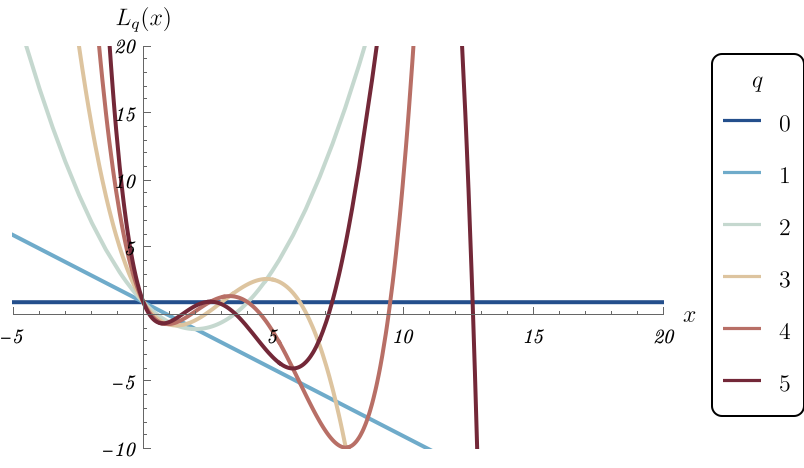
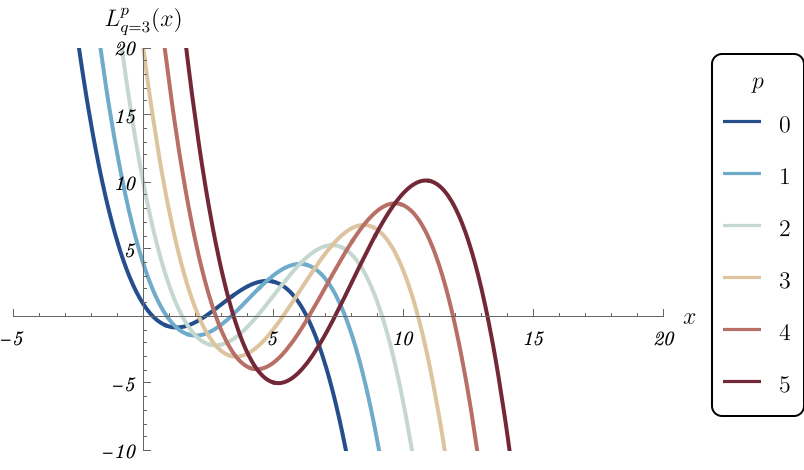
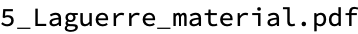
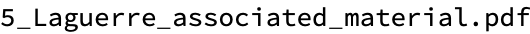

In [149]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

leg1=Framed[LineLegend[Table[ColorData["RedBlueTones"][1-q/5],{q,0,5}],Table[MaTeX[ToString[q]],{q,0,5}],LegendLabel->MaTeX["q"]],FrameStyle->Black,RoundingRadius->5,FrameMargins->0,Background->White];
leg2=Framed[LineLegend[Table[ColorData["RedBlueTones"][1-p/5],{p,0,5}],Table[MaTeX[ToString[p]],{p,0,5}],LegendLabel->MaTeX["p"]],FrameStyle->Black,RoundingRadius->5,FrameMargins->0,Background->White];
plt1=Show[Table[Plot[LaguerreL[q,0,x],{x,-5,20},AxesLabel->MaTeX[{"x","L_q (x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->350,PlotLegends->If[q==0,leg1,None],PlotRange->{{-5,20},{-10,20}},PlotStyle->ColorData["RedBlueTones"][1-q/5]],{q,0,5}]];
plt2=Show[Table[Plot[LaguerreL[3,p,x],{x,-5,20},AxesLabel->MaTeX[{"x","L_{q = 3}^p (x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->350,PlotLegends->If[p==0,leg2,None],PlotRange->{{-5,20},{-10,20}},PlotStyle->ColorData["RedBlueTones"][1-p/5]],{p,0,5}]];

plt1
plt2
Export["5_Laguerre_material.pdf",plt1]
Export["5_Laguerre_associated_material.pdf",plt2]


-Graphics-
5_hydrogen.gif
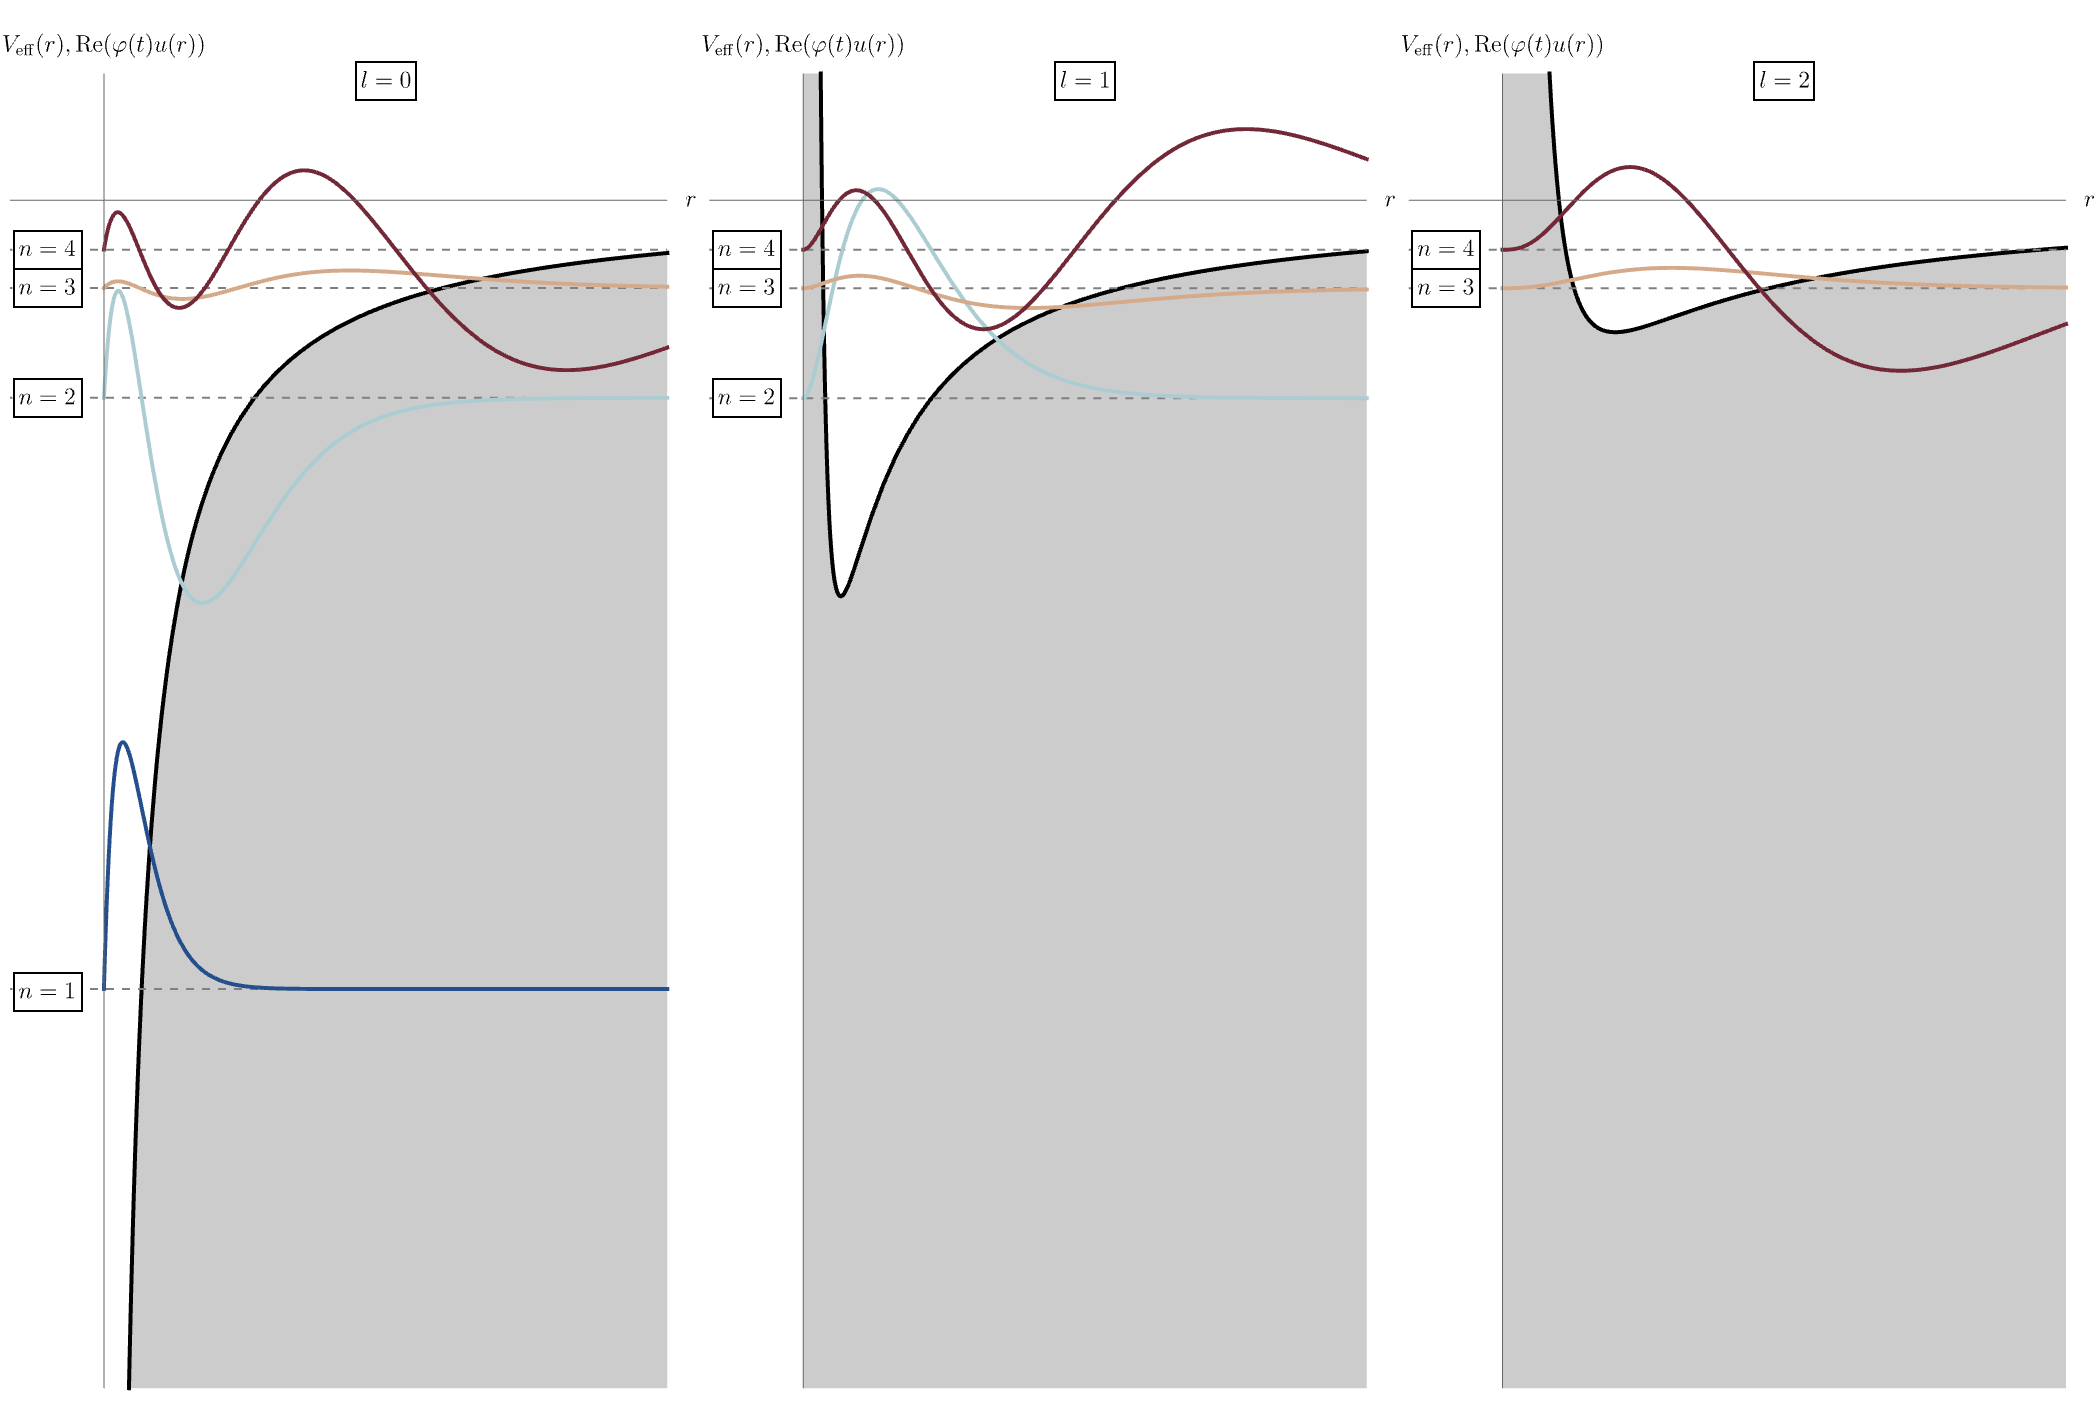
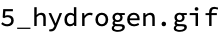

In [45]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

alpha=1;
Veff[l_,r_]=-alpha/r+l*(l+1)/2/r^2;

l=0;
{ev0,ef0}=Transpose[Sort[Select[Transpose[NDEigensystem[{-(1/2)*u''[r]+Veff[l,r]*u[r],DirichletCondition[u[r]==0,True]},u[r],{r,10^(-3)/alpha,100/alpha},41,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure"->0.001/alpha}}}]],#[[1]]<0&]][[1;;4-l]]];
sign=Sign[ef0/.{r->0.1/alpha}];
ef0=ef0/sign;
l=1;
{ev1,ef1}=Transpose[Sort[Select[Transpose[NDEigensystem[{-(1/2)*u''[r]+Veff[l,r]*u[r],DirichletCondition[u[r]==0,True]},u[r],{r,10^(-3)/alpha,100/alpha},41,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure"->0.001/alpha}}}]],#[[1]]<0&]][[1;;4-l]]];
sign=Sign[ef1/.{r->0.1/alpha}];
ef1=ef1/sign;
l=2;
{ev2,ef2}=Transpose[Sort[Select[Transpose[NDEigensystem[{-(1/2)*u''[r]+Veff[l,r]*u[r],DirichletCondition[u[r]==0,True]},u[r],{r,10^(-3)/alpha,100/alpha},41,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure"->0.001/alpha}}}]],#[[1]]<0&]][[1;;4-l]]];
sign=Sign[ef2/.{r->0.1/alpha}];
ef2=ef2/sign;

tblplt={};
For[it=0,it<=16*8-1,it=it+1,
tblpltSub={};
t=it*(1/8)*(2*Pi/Abs[ev0[[1]]]);
For[l=0,l<=2,l++,
pr={{-5/alpha,30/alpha},{-0.75*alpha^2,0.08*alpha^2}};
ev={ev0,ev1,ev2}[[l+1]];
ef={ef0,ef1,ef2}[[l+1]];
pltSub=Show[
Plot[{Veff[l,r],-100*alpha^2},{r,0,pr[[1]][[2]]},AspectRatio->2,AxesLabel->MaTeX[{"r","V_{\\rm eff} (r), {\\rm Re} (\\varphi (t) u (r))"}],BaseStyle->{FontFamily->"Latin Modern Roman",FontSize->10},Epilog->{Inset[Framed[Style[MaTeX["l="<>ToString[l]]],Background->White,FrameMargins->1],{15/alpha,0.075*alpha^2}],{Inset[Framed[Style[MaTeX["n=1"]],Background->White,FrameMargins->1],{-3/alpha,-alpha^2/2/1^2}],Inset[Framed[Style[MaTeX["n=2"]],Background->White,FrameMargins->1],{-3/alpha,-alpha^2/2/2^2}],Inset[Framed[Style[MaTeX["n=3"]],Background->White,FrameMargins->1],{-3/alpha,-alpha^2/2/3^2}],Inset[Framed[Style[MaTeX["n=4"]],Background->White,FrameMargins->1],{-3/alpha,-alpha^2/2/4^2}]}[[l+1;;]]},Filling->{1->{2}},ImageSize->350,PlotRange->pr,PlotRangeClipping->False,PlotStyle->Black,Ticks->None],
Plot[ev,{r,pr[[1]][[1]],pr[[1]][[2]]},PlotStyle->{{Gray,Dashed,Thickness[0.003]}}],
Table[Plot[(ev+Re[0.3*ef*Exp[-I*ev*t]])[[nMl]],{r,pr[[1]][[1]],pr[[1]][[2]]},PlotRange->pr[[2]],PlotStyle->{ColorData["RedBlueTones"][1-(nMl+l-1)/3],Thickness[0.006]}],{nMl,1,4-l}]
];
AppendTo[tblpltSub,pltSub];
];
plt=GraphicsGrid[{tblpltSub},ImageSize->1050,Spacings->0];
AppendTo[tblplt,plt];
];
tblplt[[-1]]
Export["5_hydrogen.gif",tblplt]


-Graphics-
5_hydrogen_material.pdf
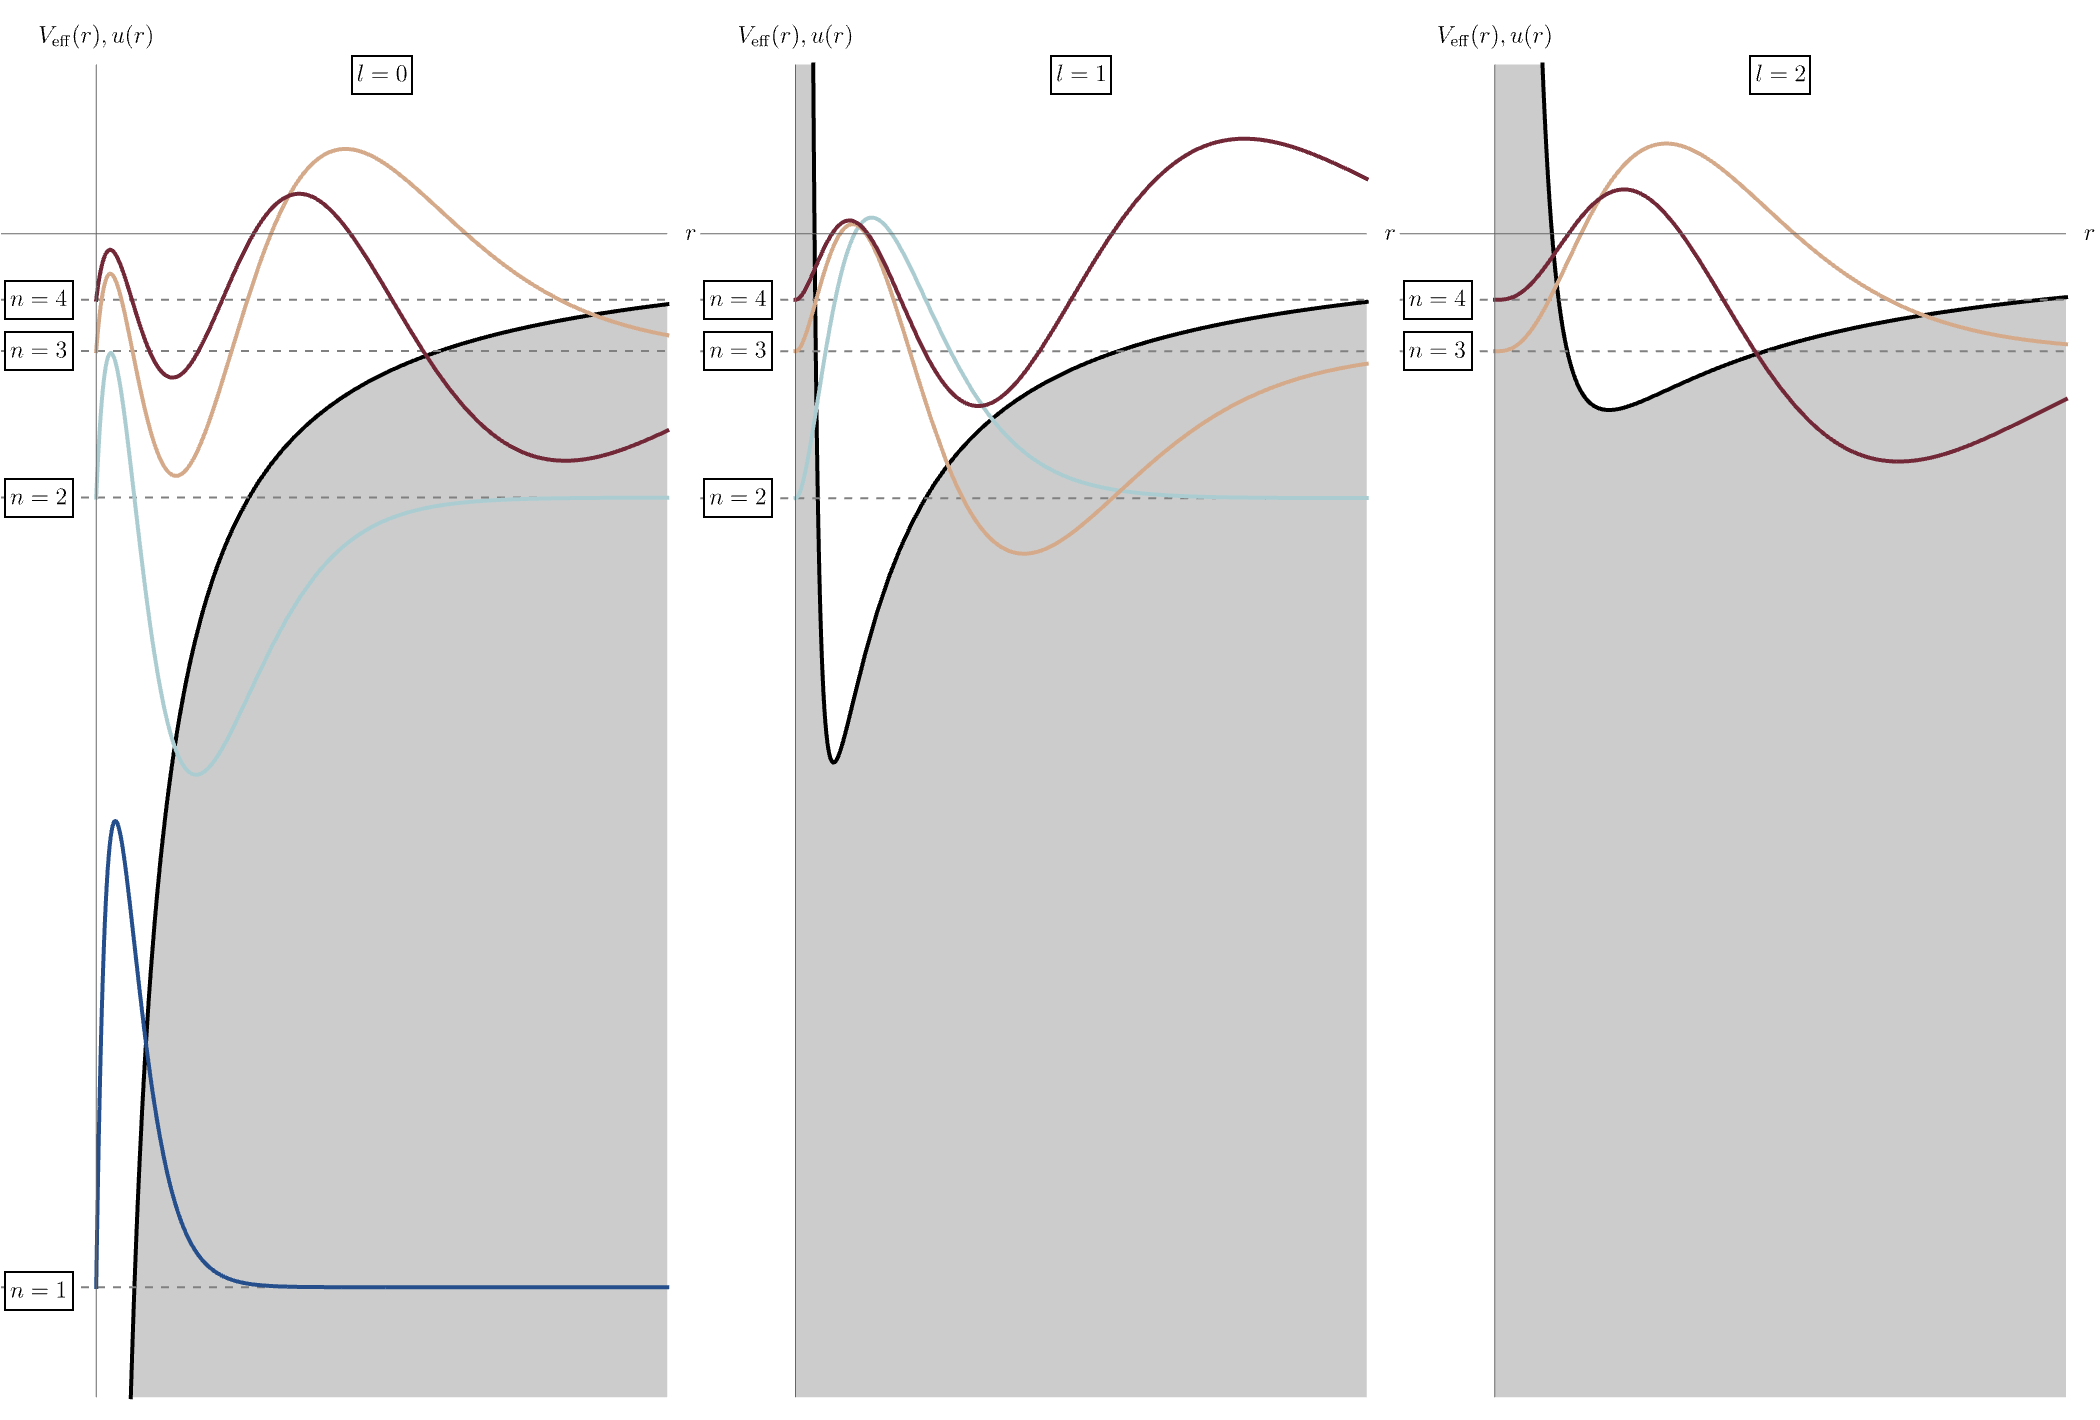
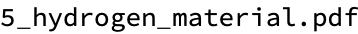

In [883]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

alpha=1;
Veff[l_,r_]=-alpha/r+l*(l+1)/2/r^2;

tblplt={};
For[l=0,l<=2,l++,
{ev,ef}=Transpose[Sort[Select[Transpose[NDEigensystem[{-(1/2)*u''[r]+Veff[l,r]*u[r],DirichletCondition[u[r]==0,True]},u[r],{r,10^(-3)/alpha,100/alpha},41,Method->{"SpatialDiscretization"->{"FiniteElement","MeshOptions"->{"MaxCellMeasure"->0.001/alpha}}}]],#[[1]]<0&]][[1;;4-l]]];
sign=Sign[ef/.{r->0.1/alpha}];
ef=ef/sign;
pr={{-5/alpha,30/alpha},{-0.55*alpha^2,0.08*alpha^2}};
plt=Show[
Plot[{Veff[l,r],-100*alpha^2},{r,0,pr[[1]][[2]]},AspectRatio->2,AxesLabel->MaTeX[{"r","V_{\\rm eff} (r), u (r)"}],BaseStyle->{FontFamily->"Latin Modern Roman",FontSize->10},Epilog->{Inset[Framed[Style[MaTeX["l="<>ToString[l]]],Background->White,FrameMargins->1],{15/alpha,0.075*alpha^2}],{Inset[Framed[Style[MaTeX["n=1"]],Background->White,FrameMargins->1],{-3/alpha,-alpha^2/2/1^2}],Inset[Framed[Style[MaTeX["n=2"]],Background->White,FrameMargins->1],{-3/alpha,-alpha^2/2/2^2}],Inset[Framed[Style[MaTeX["n=3"]],Background->White,FrameMargins->1],{-3/alpha,-alpha^2/2/3^2}],Inset[Framed[Style[MaTeX["n=4"]],Background->White,FrameMargins->1],{-3/alpha,-alpha^2/2/4^2}]}[[l+1;;]]},Filling->{1->{2}},ImageSize->350,PlotRange->pr,PlotRangeClipping->False,PlotStyle->Black,Ticks->None],
Plot[ev,{r,pr[[1]][[1]],pr[[1]][[2]]},PlotStyle->{{Gray,Dashed,Thickness[0.003]}}],
Table[Plot[(ev+0.3*ef)[[nMl]],{r,pr[[1]][[1]],pr[[1]][[2]]},PlotRange->pr[[2]],PlotStyle->{ColorData["RedBlueTones"][1-(nMl+l-1)/3],Thickness[0.006]}],{nMl,1,4-l}]
];
AppendTo[tblplt,plt];
];
plt=GraphicsGrid[{tblplt},ImageSize->1050,Spacings->0];
plt
Export["5_hydrogen_material.pdf",plt]


-Image-
5_psi.gif
5_psi_material.pdf
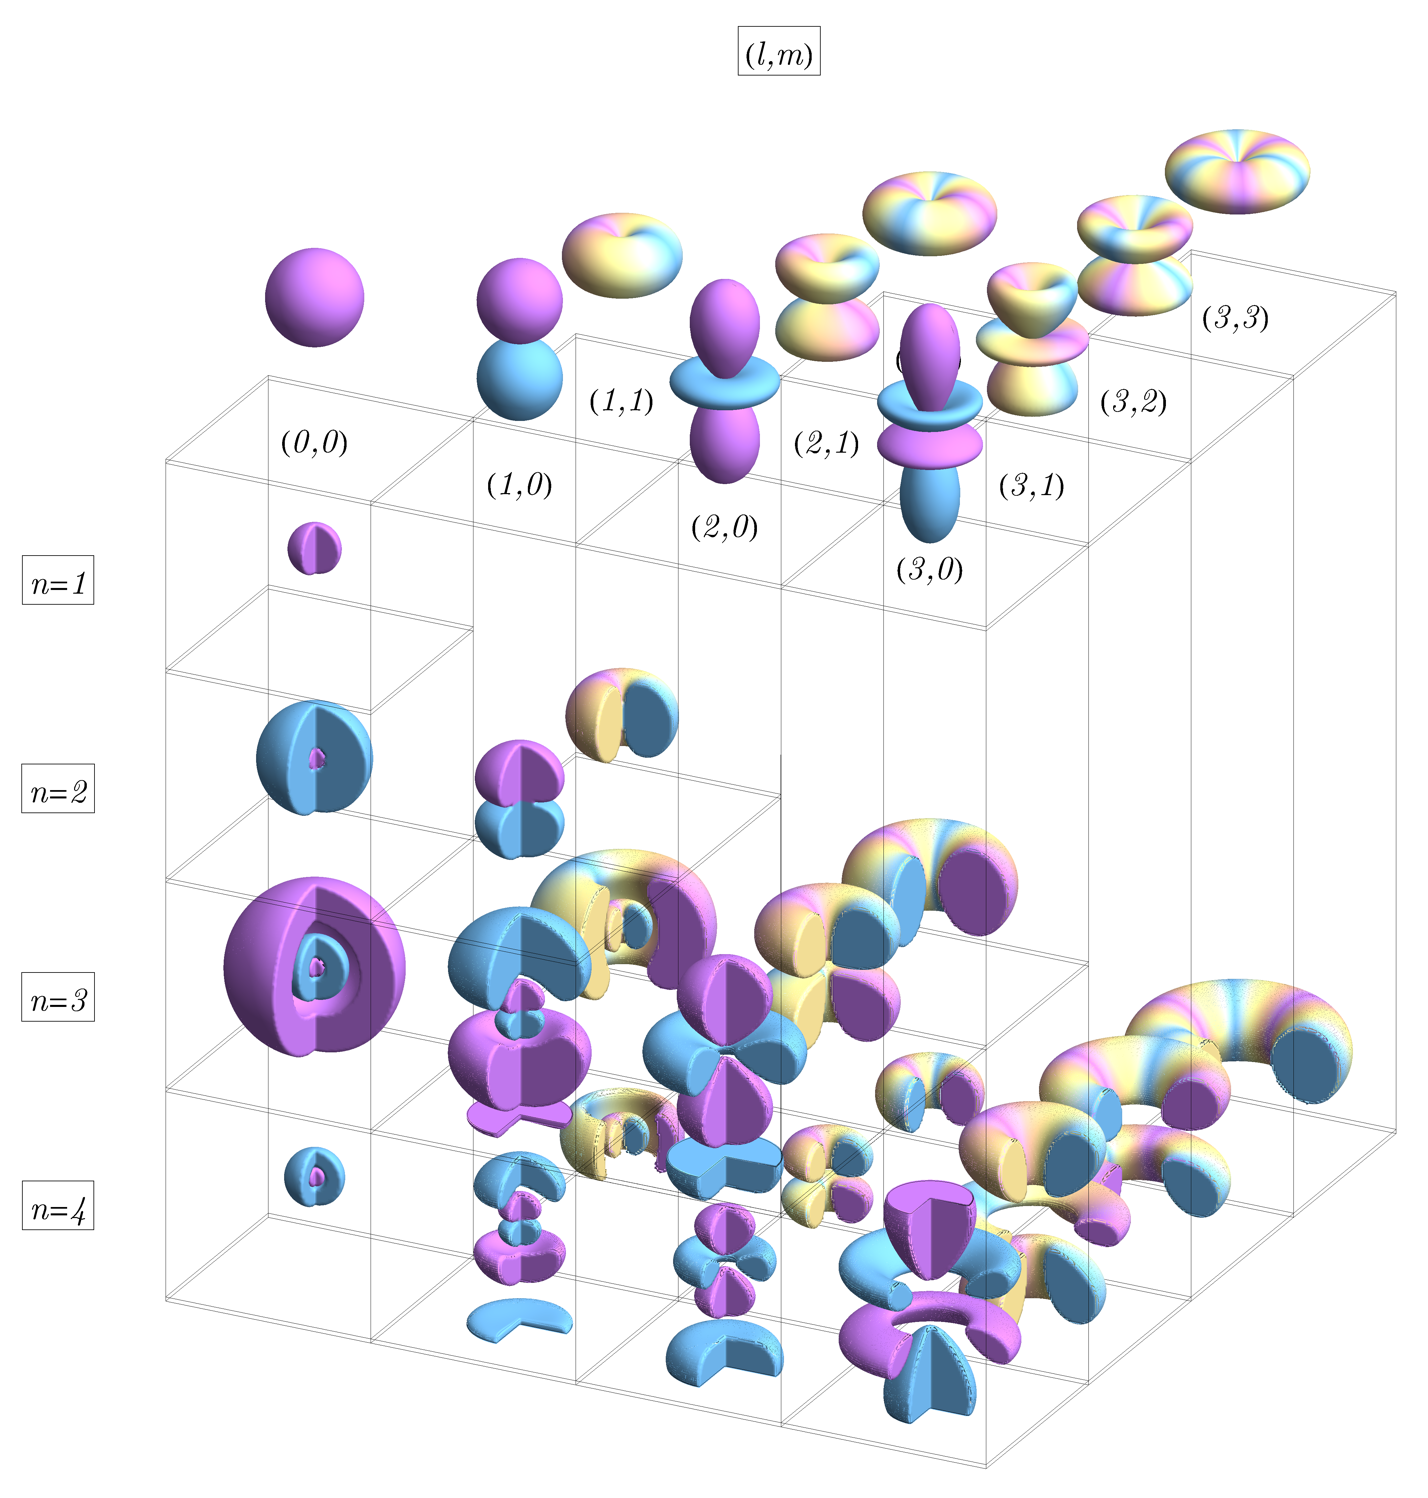
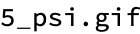
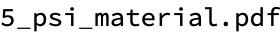

In [114]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

c[x_]=ColorData["Pastel"][x];
Y[l_,m_,theta_,phi_]=SphericalHarmonicY[l,m,theta,phi];
psi[n_,l_,m_,r_,theta_,phi_]=Sqrt[(2/n)^3*(n-l-1)!/2/n/(n+l)!]*Exp[-r/n]*(2*r/n)^l*LaguerreL[n-l-1,2*l+1,2*r/n]*Y[l,m,theta,phi];
r[x_,y_,z_]=Sqrt[x^2+y^2+z^2];
theta[x_,y_,z_]=ArcTan[z,Sqrt[x^2+y^2]];
phi[x_,y_,z_]=ArcTan[x,y];

tblplt1={};
For[n=1,n<=4,n++,For[l=0,l<=n-1,l++,For[m=0,m<=l,m++,
L=40;pr=20*{-1,1};{xc,yc,zc}=L*{l,m,-n};
plt=RegionPlot3D[Abs[psi[n,l,m,r[x-xc,y-yc,z-zc],theta[x-xc,y-yc,z-zc],phi[x-xc,y-yc,z-zc]]]>0.005&&!(-Pi/2<ArcTan[x-xc,y-yc]<0),{x,xc+pr[[1]],xc+pr[[2]]},{y,yc+pr[[1]],yc+pr[[2]]},{z,zc+pr[[1]],zc+pr[[2]]},BaseStyle->{FontFamily->"Latin Modern Roman"},Boxed->False,BoxRatios->{3,3,4},ColorFunction->Function[{x,y,z},c[Abs[Arg[psi[n,l,m,r[x-xc,y-yc,z-zc],theta[x-xc,y-yc,z-zc],phi[x-xc,y-yc,z-zc]]]/Pi]]],ColorFunctionScaling->False,ImageSize->350,Mesh->None,PlotPoints->100,Ticks->None,ViewPoint->1000*{1,-2,1}];
AppendTo[tblplt1,plt];
];];];
plt1=Show[{tblplt1,Table[{xc,yc,zc}=L*{l,m,-n};Graphics3D[{Opacity[0],Cuboid[{xc,yc,zc}+{-L/2,-L/2,-L/2-L/100},{xc,yc,zc}+{L/2,L/2,-L/2+L/100}]}],{n,1,4},{l,0,n-1},{m,0,l}],Table[{xc,yc,zc}=L*{l,m,0};Graphics3D[{Opacity[0],Cuboid[{xc,yc,zc}+{-L/2,-L/2,-L/2-L/100},{xc,yc,zc}+{L/2,L/2,-L/2+L/100}]}],{n,4,4},{l,0,n-1},{m,0,l}],Table[{xc,yc,zc}=L*{l,m,-n};Graphics3D[{Opacity[0],Cuboid[{xc,yc,zc}+{-L/2,-L/2,-L/2-L/100},{xc,yc,0}+{L/2,L/2,-L/2+L/100}]}],{n,1,4},{l,0,n-1},{m,0,l}]},BoxRatios->{1,1,1},ImageSize->350,ImagePadding->100,PlotRange->L*{{-5,5},{-5,5},{-5,5}},PlotRangeClipping->False,Prolog->{v0={0.5,0.469};v1={0.064,-0.0132};v2={0.0318,0.02615};Inset[Framed[Style["n=1",50],FrameMargins->{{10,10},{0,0}}],{0.42,0.425}],Inset[Framed[Style["n=2",50],FrameMargins->{{10,10},{0,0}}],{0.42,0.36}],Inset[Framed[Style["n=3",50],FrameMargins->{{10,10},{0,0}}],{0.42,0.295}],Inset[Framed[Style["n=4",50],FrameMargins->{{10,10},{0,0}}],{0.42,0.23}],Inset[Framed[Style["(l,m)",50],FrameMargins->{{10,10},{0,0}}],{0.645,0.59}],Inset[Style["(0,0)",50],v0+0*v1+0*v2],Inset[Style["(1,0)",50],v0+1*v1+0*v2],Inset[Style["(1,1)",50],v0+1*v1+1*v2],Inset[Style["(2,0)",50],v0+2*v1+0*v2],Inset[Style["(2,1)",50],v0+2*v1+1*v2],Inset[Style["(2,2)",50],v0+2*v1+2*v2],Inset[Style["(3,0)",50],v0+3*v1+0*v2],Inset[Style["(3,1)",50],v0+3*v1+1*v2],Inset[Style["(3,2)",50],v0+3*v1+2*v2],Inset[Style["(3,3)",50],v0+3*v1+3*v2]}];

tblplt2={};
For[n=1,n<=4,n++,For[l=0,l<=n-1,l++,For[m=0,m<=l,m++,
{xc,yc,zc}=L*{l,m,0.2};pr={xc,yc,zc}+30*{{-0.6,0.6},{-0.6,0.6},{-0.8,0.8}};
plt2=ParametricPlot3D[{xc,yc,zc}+30*{Abs[Y[l,m,theta,phi]]*Sin[theta]*Cos[phi],Abs[Y[l,m,theta,phi]]*Sin[theta]*Sin[phi],Abs[Y[l,m,theta,phi]]*Cos[theta]},{theta,0,Pi},{phi,0,2*Pi},BaseStyle->{FontFamily->"Latin Modern Roman"},Boxed->False,ColorFunction->Function[{x,y,z,theta,phi,r},c[1-Abs[1-Abs[Arg[Y[l,m,theta,phi]]]/Pi]]],ColorFunctionScaling->False,Prolog->Inset[Style["("<>ToString[l]<>",\[ThinSpace]"<>ToString[m]<>"\[ThinSpace])",50],{0.5,1.2}],Lighting->"Neutral",Mesh->None,PlotPoints->50,PlotRange->pr,Ticks->None];
AppendTo[tblplt2,plt2];
];];];
plt2=Show[tblplt2];

plt=Show[plt1,plt2,ImageSize->5000];
Export["5_psi.png",plt];
plt=ImageTrim[Import["5_psi.png"],(70/100)*{{5800,2800},{11900,9200}}];
plt
Export["5_psi.gif",plt]
Export["5_psi_material.pdf",plt]


-Graphics-
5_Lyman_material.pdf
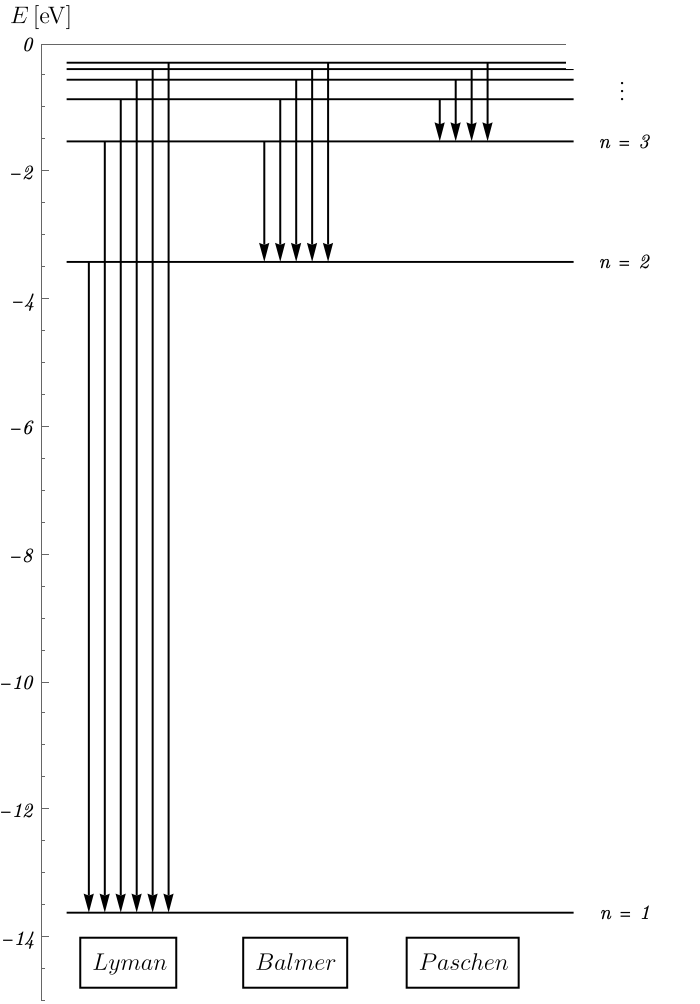
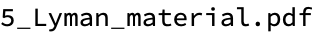

In [408]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

E0=13.6;
plt=Plot[Table[-E0/n^2,{n,1,7}],{x,0.5,10},AspectRatio->1.5,AxesLabel->MaTeX[{"","E \\, [{\\rm eV}]"}],BaseStyle->{FontFamily->"Latin Modern Roman"},Epilog->{Inset["n = 1",{11,-E0/1^2}],Inset["n = 2",{11,-E0/2^2}],Inset["n = 3",{11,-E0/3^2}],Inset[MaTeX["\\vdots~"],{11,-E0/4^2+0.16}],Inset[Framed["                     ",Background->White,FrameStyle->White],{11.5,0}],Table[{Arrowheads[0.03],Arrow[{{0.6+0.3*(m-1),-E0/m^2},{0.6+0.3*(m-1),-E0/1^2}}]},{m,2,7}],Table[{Arrowheads[0.03],Arrow[{{3.6+0.3*(m-1),-E0/m^2},{3.6+0.3*(m-1),-E0/2^2}}]},{m,3,7}],Table[{Arrowheads[0.03],Arrow[{{6.6+0.3*(m-1),-E0/m^2},{6.6+0.3*(m-1),-E0/3^2}}]},{m,4,7}],Inset[Framed[MaTeX["Lyman"],Background->White],{1.66,-14.4}],Inset[Framed[MaTeX["Balmer"],Background->White],{4.8,-14.4}],Inset[Framed[MaTeX["Paschen"],Background->White],{7.95,-14.4}]},ImageSize->350,PlotRange->{{0,12},{-15,0}},PlotRangeClipping->False,PlotStyle->{Black,Thickness[0.003]},Ticks->{None,Automatic}];
plt
Export["5_Lyman_material.pdf",plt]


In [ ]:
6.Angular momentum

-Graphics3D-
6_angular_momentum_material.pdf
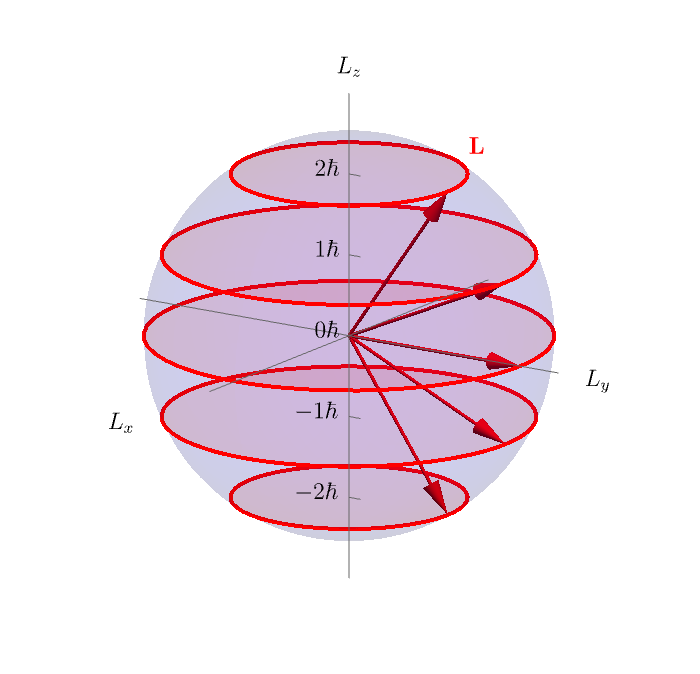
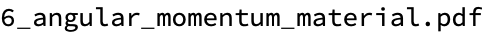

In [113]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;
SetOptions[MaTeX,"Preamble"->{"\\usepackage{color}"}];

l=2;
plt=Show[
SphericalPlot3D[Sqrt[l*(l+1)],{theta,0,Pi},{phi,0,2*Pi},AxesLabel->None,AxesOrigin->{0,0,0},BaseStyle->{FontFamily->"Latin Modern Roman"},Boxed->False,Epilog->{Inset[MaTeX["L_x"],{0.16,0.37}],Inset[MaTeX["L_y"],{0.87,0.434}],Inset[MaTeX["L_z"],{0.5,0.9}],Inset[Style[MaTeX["{\\color{red} \\mathbf L}"],Red],{0.69,0.78}]},ImageSize->350,Mesh->None,PlotRange->1.5*{{-l,l},{-l,l},{-l,l}},
PlotPoints->50,PlotStyle->{Blue,Opacity[0.1]},Ticks->{None,None,Table[{m,MaTeX[ToString[m]<>"\\hbar"]},{m,-l,l}]},ViewPoint->1000*{1.5,1,0.5}],
Table[ParametricPlot3D[{rxy*Cos[phi],rxy*Sin[phi],m},{rxy,0,Sqrt[l*(l+1)-m^2]},{phi,0,2*Pi},Mesh->None,PlotPoints->50,PlotStyle->{Red,Opacity[0.1]}],{m,-l,l}],
Table[ParametricPlot3D[{Sqrt[l*(l+1)-m^2]*Cos[phi],Sqrt[l*(l+1)-m^2]*Sin[phi],m},{phi,0,2*Pi},PlotPoints->50,PlotStyle->Red],{m,-l,l}],
Table[Graphics3D[{Red,Arrow[Tube[{{0,0,0},{0,Sqrt[l*(l+1)-m^2],m}}]]}],{m,-l,l}]
];
plt
Export["6_angular_momentum_material.pdf",plt]


-Graphics-
6_translation.gif
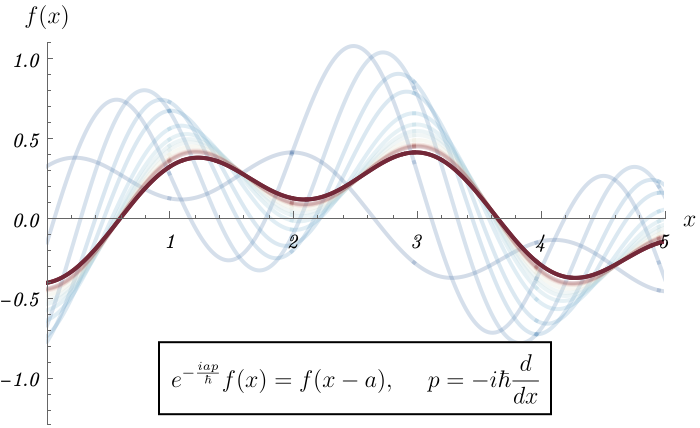
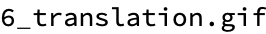

In [2]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

a=1;
n=32;
tbln={0,1,2,3,4,6,8,10,12,16,24,28,32};
f=0.34*Sin[x+0.41]+0.21*Sin[3.1*x+1.31];
fTrans=f/.{x->x-a};
modTransDisc[f_,x_,a_,i_]:=Block[{j,fSub},fSub=f;For[j=1,j<=i,j++,fSub=Simplify[N[fSub-a*D[fSub,x]/i]];];fSub];
For[i=0,i<=n,i++,fTransDisc[i]=modTransDisc[f,x,a,i];];

tblplt={};

plt1=Table[Show[Table[ListPlot[Table[{x,fTransDisc[i]},{x,0,5,0.01}],AxesLabel->MaTeX[{"x","f (x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ClippingStyle->None,Epilog->{Inset[Framed[Style[MaTeX[If[m==0,"f(x)","\\left( 1 - \\frac{i a p}{"<>ToString[m]<>" \\hbar} \\right)^{"<>ToString[m]<>"} f (x),~~~~p = - i \\hbar \\frac{d}{dx}"]]],Background->White],{2.5,-1}]},ImageSize->350,Joined->True,PlotRange->{{0,5},{-1.3,1.1}},PlotStyle->{{ColorData["RedBlueTones"][1-i/(n+1)],Opacity[If[i==0||i==m,1,0.2]]}}],{i,0,n}]],{m,tbln}];
plt1=Flatten[plt1];
AppendTo[tblplt,plt1];
plt2=Show[Table[ListPlot[Table[{x,fTransDisc[i]},{x,0,5,0.01}],AxesLabel->MaTeX[{"x","f (x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ClippingStyle->None,Epilog->{Inset[Framed[Style[MaTeX["e^{- \\frac{i a p}{\\hbar}} f (x),~~~~p = - i \\hbar \\frac{d}{dx}"]],Background->White],{2.5,-1}]},ImageSize->350,Joined->True,PlotRange->{{0,5},{-1.3,1.1}},PlotStyle->{{ColorData["RedBlueTones"][1-i/(n+1)],Opacity[If[i==0,1,0.2]]}}],{i,0,n}],Plot[fTrans,{x,0,5},PlotStyle->ColorData["RedBlueTones"][0]]];
AppendTo[tblplt,plt2];
plt3=Table[Show[Table[ListPlot[Table[{x,fTransDisc[i]},{x,0,5,0.01}],AxesLabel->MaTeX[{"x","f (x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ClippingStyle->None,Epilog->{Inset[Framed[Style[MaTeX["e^{- \\frac{i a p}{\\hbar}} f (x) = f (x - a),~~~~p = - i \\hbar \\frac{d}{dx}"]],Background->White],{2.5,-1}]},ImageSize->350,Joined->True,PlotRange->{{0,5},{-1.3,1.1}},PlotStyle->{{ColorData["RedBlueTones"][1-i/(n+1)],Opacity[0.2]}}],{i,tbln}],Plot[fTrans,{x,0,5},PlotStyle->ColorData["RedBlueTones"][0]],ListPlot[Table[{x+m/(n+1),f},{x,-a,5,0.01}],AxesLabel->MaTeX[{"x","f (x)"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ClippingStyle->None,ImageSize->350,Joined->True,PlotRange->{{0,5},{-1.3,1.1}},PlotStyle->{{If[m==n+1,ColorData["RedBlueTones"][0],ColorData["RedBlueTones"][1]],Opacity[1]}}]],{m,0,n+1}];
AppendTo[tblplt,plt3];

tblplt=Flatten[tblplt];
tblplt=Flatten[Join[Table[Table[tblplt[[i]],{j,1,20}],{i,1,1}],Table[Table[tblplt[[i]],{j,1,5}],{i,2,13}],Table[Table[tblplt[[i]],{j,1,20}],{i,14,14}],tblplt[[15;;-2]],Table[tblplt[[-1]],{j,1,20}]]];
tblplt[[-1]]
Export["6_translation.gif",tblplt,"DisplayDurations"->0.2]


-Graphics-
6_rotation.gif
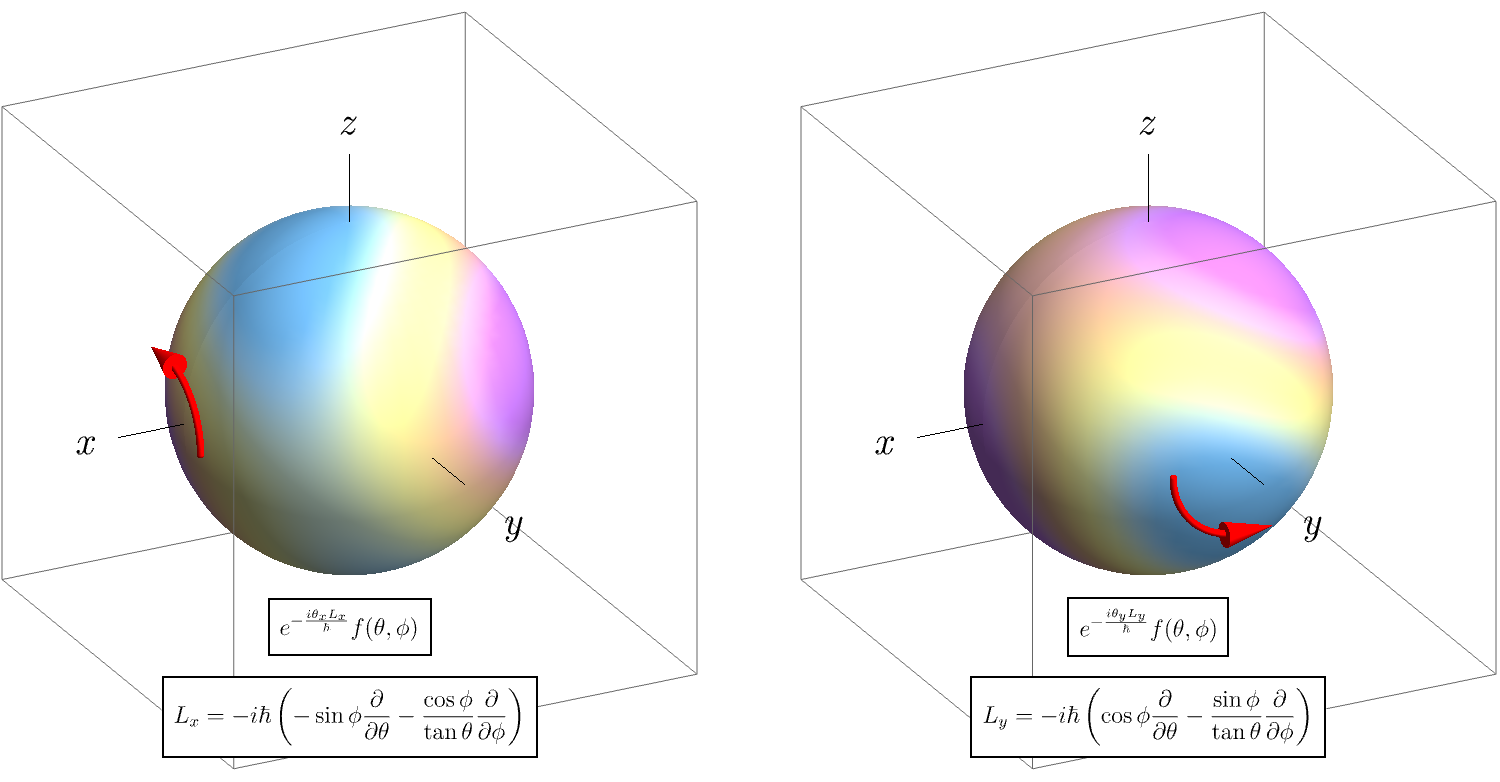
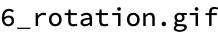

In [150]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

a=Pi/2;
n=4;
c[Y_]=ColorData["Pastel"][0.5-Y];
J={{{0,0,0},{0,0,-1},{0,1,0}},{{0,0,1},{0,0,0},{-1,0,0}},{{0,-1,0},{1,0,0},{0,0,0}}};
{A[0,0],A[1,-1],A[1,0],A[1,1],A[2,-2],A[2,-1],A[2,0],A[2,1],A[2,2]}={0.25233394794258146 + 6.362889023595423*^-13*I, 0.2768358419441662 - 0.2523052816299019*I, 0.47641042136253386 - 5.286049375996527*^-13*I, 0.7431368855467504 - 0.13801610786195345*I, 0.5773601372234657 - 0.43878575296489103*I, 0.874565957688234 - 0.11891723703919083*I, 0.3330239545885961 + 1.2553846850948958*^-13*I, 0.03873005142100108 - 0.4603014569050825*I, 0.2509691468405551 + 0.1923468686961613*I};
Y[theta_,phi_]=Sum[A[l,m]*SphericalHarmonicY[l,m,theta,phi],{l,0,2},{m,-l,l}];
Lx[Y_,theta_,phi_]:=-I*(-Sin[phi]*D[Y,theta]-(Cos[phi]/Tan[theta])*D[Y,phi]);
Ly[Y_,theta_,phi_]:=-I*(Cos[phi]*D[Y,theta]-(Sin[phi]/Tan[theta])*D[Y,phi]);
modRotDisc[Y_,theta_,phi_,ixyz_,a_,i_]:=Block[{j,YRotDisc},YRotDisc=Y;For[j=1,j<=i,j++,YRotDisc=YRotDisc-I*a*If[ixyz==1,Lx[YRotDisc,theta,phi]/i,Ly[YRotDisc,theta,phi]/i];];YRotDisc];

tblpltx={};
ixyz=1;For[i=0,i<=n,i++,YDisc[i,theta_,phi_]=modRotDisc[Y[theta,phi],theta,phi,ixyz,a,i];];

plt1=Show[
SphericalPlot3D[1,{theta,0,Pi},{phi,0,2*Pi},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->Function[{x,y,z,theta,phi,r},c[Re[Y[theta,phi]]]],ColorFunctionScaling->False,Epilog->{Inset[Style["x",20],{0.12,0.43}],Inset[Style["y",20],{0.735,0.315}],Inset[Style["z",20],{0.498,0.89}],Inset[Framed[Style[MaTeX["f (\\theta, \\phi)"]],Background->White],{0.5,0.08}]},ImageSize->350,Mesh->None,PlotPoints->50,PlotRange->1.4*{{-1,1},{-1,1},{-1,1}},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[Line[{{0,0,0},{1.4,0,0}}]],Graphics3D[Line[{{0,0,0},{0,1.4,0}}]],Graphics3D[Line[{{0,0,0},{0,0,1.4}}]]
];
AppendTo[tblpltx,plt1];

plt2=Table[Show[
SphericalPlot3D[1,{theta,0,Pi},{phi,0,2*Pi},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->Function[{x,y,z,theta,phi,r},c[Re[YDisc[m,theta,phi]]]],ColorFunctionScaling->False,Epilog->{Inset[Style["x",20],{0.12,0.43}],Inset[Style["y",20],{0.735,0.315}],Inset[Style["z",20],{0.498,0.89}],Inset[Framed[Style[MaTeX["\\left( 1 - \\frac{i \\theta_x L_x}{"<>ToString[m]<>" \\hbar} \\right)^{"<>ToString[m]<>"} f (\\theta, \\phi)"]],Background->White],{0.5,0.16}],Inset[Framed[Style[MaTeX["L_x = - i \\hbar \\left( - \\sin \\phi \\frac{\\partial}{\\partial\\theta} - \\frac{\\cos \\phi}{\\tan \\theta} \\frac{\\partial}{\\partial\\phi} \\right)"]],Background->White],{0.5,0.03}]},ImageSize->350,Mesh->None,PlotPoints->50,PlotRange->1.4*{{-1,1},{-1,1},{-1,1}},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[Line[{{0,0,0},{1.4,0,0}}]],Graphics3D[Line[{{0,0,0},{0,1.4,0}}]],Graphics3D[Line[{{0,0,0},{0,0,1.4}}]]
],{m,1,n}];
AppendTo[tblpltx,plt2];

plt3=Show[
SphericalPlot3D[1,{theta,0,Pi},{phi,0,2*Pi},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->Function[{x,y,z,theta,phi,r},{xpr,ypr,zpr}=MatrixExp[-a*J[[1]]].{Sin[theta]*Cos[phi],Sin[theta]*Sin[phi],Cos[theta]};{thetapr,phipr}={ArcTan[zpr,Sqrt[xpr^2+ypr^2]],ArcTan[xpr,ypr]};c[Re[Y[thetapr,phipr]]]],ColorFunctionScaling->False,Epilog->{Inset[Style["x",20],{0.12,0.43}],Inset[Style["y",20],{0.735,0.315}],Inset[Style["z",20],{0.498,0.89}],Inset[Framed[Style[MaTeX["e^{- \\frac{i \\theta_x L_x}{\\hbar}} f (\\theta, \\phi)"]],Background->White],{0.5,0.16}],Inset[Framed[Style[MaTeX["L_x = - i \\hbar \\left( - \\sin \\phi \\frac{\\partial}{\\partial\\theta} - \\frac{\\cos \\phi}{\\tan \\theta} \\frac{\\partial}{\\partial\\phi} \\right)"]],Background->White],{0.5,0.03}]},ImageSize->350,Mesh->None,PlotPoints->50,PlotRange->1.4*{{-1,1},{-1,1},{-1,1}},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[Line[{{0,0,0},{1.4,0,0}}]],Graphics3D[Line[{{0,0,0},{0,1.4,0}}]],Graphics3D[Line[{{0,0,0},{0,0,1.4}}]],
Graphics3D[{Red,Arrowheads[0],Arrow[Tube[Table[RSub=MatrixExp[aSub*J[[1]]];{1.1,0,0}+RSub.{0,0.4,0},{aSub,0,a,a/100}],0.02]]}],
Graphics3D[{Red,Arrowheads[0.06],Arrow[Tube[Table[RSub=MatrixExp[aSub*J[[1]]];{1.1,0,0}+RSub.{0,0.4,0}-{0,0.2,0},{aSub,0,a,a/100}],0]]}]
];
AppendTo[tblpltx,plt3];

tblpltx=Flatten[tblpltx];
tblpltx=Join[Table[tblpltx[[1]],{i,1,2}],tblpltx[[2;;-2]],Table[tblpltx[[-1]],{i,1,2}]];

tblplty={};
ixyz=2;For[i=0,i<=n,i++,YDisc[i,theta_,phi_]=modRotDisc[Y[theta,phi],theta,phi,ixyz,a,i];];

plt1=Show[
SphericalPlot3D[1,{theta,0,Pi},{phi,0,2*Pi},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->Function[{x,y,z,theta,phi,r},c[Re[Y[theta,phi]]]],ColorFunctionScaling->False,Epilog->{Inset[Style["x",20],{0.12,0.43}],Inset[Style["y",20],{0.735,0.315}],Inset[Style["z",20],{0.498,0.89}],Inset[Framed[Style[MaTeX["f (\\theta, \\phi)"]],Background->White],{0.5,0.08}]},ImageSize->350,Mesh->None,PlotPoints->50,PlotRange->1.4*{{-1,1},{-1,1},{-1,1}},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[Line[{{0,0,0},{1.4,0,0}}]],Graphics3D[Line[{{0,0,0},{0,1.4,0}}]],Graphics3D[Line[{{0,0,0},{0,0,1.4}}]]
];
AppendTo[tblplty,plt1];

plt2=Table[Show[
SphericalPlot3D[1,{theta,0,Pi},{phi,0,2*Pi},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->Function[{x,y,z,theta,phi,r},c[Re[YDisc[m,theta,phi]]]],ColorFunctionScaling->False,Epilog->{Inset[Style["x",20],{0.12,0.43}],Inset[Style["y",20],{0.735,0.315}],Inset[Style["z",20],{0.498,0.89}],Inset[Framed[Style[MaTeX["\\left( 1 - \\frac{i \\theta_y L_y}{"<>ToString[m]<>" \\hbar} \\right)^{"<>ToString[m]<>"} f (\\theta, \\phi)"]],Background->White],{0.5,0.16}],Inset[Framed[Style[MaTeX["L_y=- i \\hbar \\left( \\cos \\phi \\frac{\\partial}{\\partial\\theta} - \\frac{\\sin \\phi}{\\tan \\theta} \\frac{\\partial}{\\partial\\phi} \\right)"]],Background->White],{0.5,0.03}]},ImageSize->350,Mesh->None,PlotPoints->50,PlotRange->1.4*{{-1,1},{-1,1},{-1,1}},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[Line[{{0,0,0},{1.4,0,0}}]],Graphics3D[Line[{{0,0,0},{0,1.4,0}}]],Graphics3D[Line[{{0,0,0},{0,0,1.4}}]]
],{m,1,n}];
AppendTo[tblplty,plt2];

plt3=Show[
SphericalPlot3D[1,{theta,0,Pi},{phi,0,2*Pi},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->Function[{x,y,z,theta,phi,r},{xpr,ypr,zpr}=MatrixExp[-a*J[[2]]].{Sin[theta]*Cos[phi],Sin[theta]*Sin[phi],Cos[theta]};{thetapr,phipr}={ArcTan[zpr,Sqrt[xpr^2+ypr^2]],ArcTan[xpr,ypr]};c[Re[Y[thetapr,phipr]]]],ColorFunctionScaling->False,Epilog->{Inset[Style["x",20],{0.12,0.43}],Inset[Style["y",20],{0.735,0.315}],Inset[Style["z",20],{0.498,0.89}],Inset[Framed[Style[MaTeX["e^{- \\frac{i \\theta_y L_y}{\\hbar}} f (\\theta, \\phi)"]],Background->White],{0.5,0.16}],Inset[Framed[Style[MaTeX["L_y = - i \\hbar \\left( \\cos \\phi \\frac{\\partial}{\\partial\\theta} - \\frac{\\sin \\phi}{\\tan \\theta} \\frac{\\partial}{\\partial\\phi} \\right)"]],Background->White],{0.5,0.03}]},ImageSize->350,Mesh->None,PlotPoints->50,PlotRange->1.4*{{-1,1},{-1,1},{-1,1}},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[Line[{{0,0,0},{1.4,0,0}}]],Graphics3D[Line[{{0,0,0},{0,1.4,0}}]],Graphics3D[Line[{{0,0,0},{0,0,1.4}}]],Graphics3D[{Red,Arrowheads[0],Arrow[Tube[Table[RSub=MatrixExp[aSub*J[[2]]];{0,1.1,0}+RSub.{0.4,0,0},{aSub,0,a,a/100}],0.02]]}],Graphics3D[{Red,Arrowheads[0.06],Arrow[Tube[Table[RSub=MatrixExp[aSub*J[[2]]];{0,1.1,0}+RSub.{0.4,0,0}-{0.2,0,0},{aSub,0,a,a/100}],0]]}]
];
AppendTo[tblplty,plt3];

tblplty=Flatten[tblplty];
tblplty=Join[Table[tblplty[[1]],{i,1,2}],tblplty[[2;;-2]],Table[tblplty[[-1]],{i,1,2}]];

tblplt=GraphicsGrid[{#},ImageSize->750,Spacings->{{0,50,0},0}]&/@Transpose[{tblpltx,tblplty}];
tblplt[[-1]]
Export["6_rotation.gif",tblplt,"DisplayDurations"->1]


-Graphics-
6_rotation_comparison.gif
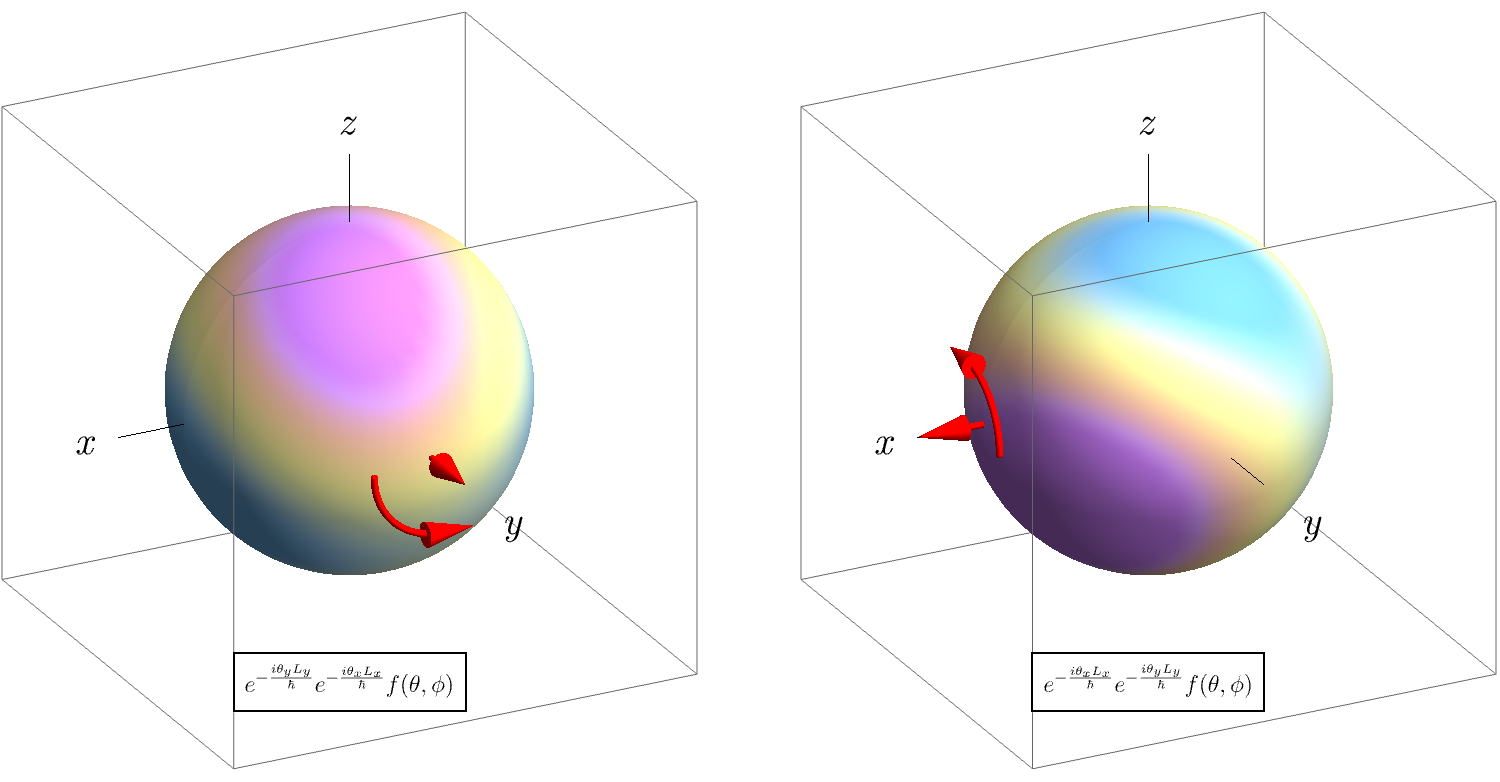
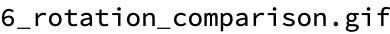

In [185]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

a=Pi/2;
n=4;
c[Y_]=ColorData["Pastel"][0.5-Y];
J={{{0,0,0},{0,0,-1},{0,1,0}},{{0,0,1},{0,0,0},{-1,0,0}},{{0,-1,0},{1,0,0},{0,0,0}}};
{A[0,0],A[1,-1],A[1,0],A[1,1],A[2,-2],A[2,-1],A[2,0],A[2,1],A[2,2]}={0.25233394794258146, 0.2768358419441662 - 0.2523052816299019*I, 0.47641042136253386, 0.7431368855467504 - 0.13801610786195345*I, 0.5773601372234657 - 0.43878575296489103*I, 0.874565957688234 - 0.11891723703919083*I, 0.3330239545885961, 0.03873005142100108 - 0.4603014569050825*I, 0.2509691468405551 + 0.1923468686961613*I};
Y[theta_,phi_]=Sum[A[l,m]*SphericalHarmonicY[l,m,theta,phi],{l,0,2},{m,-l,l}];

tblpltx={};

plt1=Table[Show[
SphericalPlot3D[1,{theta,0,Pi},{phi,0,2*Pi},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->Function[{x,y,z,theta,phi,r},{xpr,ypr,zpr}=MatrixExp[-apr*J[[1]]].{Sin[theta]*Cos[phi],Sin[theta]*Sin[phi],Cos[theta]};{thetapr,phipr}={ArcTan[zpr,Sqrt[xpr^2+ypr^2]],ArcTan[xpr,ypr]};c[Re[Y[thetapr,phipr]]]],ColorFunctionScaling->False,Epilog->{Inset[Style["x",20],{0.12,0.43}],Inset[Style["y",20],{0.735,0.315}],Inset[Style["z",20],{0.498,0.89}],Inset[Framed[Style[MaTeX["e^{- \\frac{i \\theta_x L_x}{\\hbar}} f (\\theta, \\phi)"]],Background->White],{0.5,0.08}]},ImageSize->350,Mesh->None,PlotPoints->50,PlotRange->1.4*{{-1,1},{-1,1},{-1,1}},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[Line[{{0,0,0},{1.4,0,0}}]],Graphics3D[Line[{{0,0,0},{0,1.4,0}}]],Graphics3D[Line[{{0,0,0},{0,0,1.4}}]],
Graphics3D[{Red,Arrowheads[0.06],Arrow[Tube[{{0,0,0},{1.4,0,0}},0.02]]}],
Graphics3D[{Red,Arrowheads[0],Arrow[Tube[Table[RSub=MatrixExp[aSub*J[[1]]];v1={1.1,0,0};v2={0,0.4,0};v1+RSub.v2,{aSub,0,apr,apr/100}],0.02]]}],
Graphics3D[{Red,Arrowheads[0.06],Arrow[Tube[Table[Rpr=MatrixExp[apr*J[[1]]];RSub=MatrixExp[aSub*J[[1]]];v1={1.1,0,0};v2={0,0.4,0};v3=Cross[v1,Rpr.v2]/Norm[Cross[v1,Rpr.v2]];v1+RSub.v2+0.2*v3,{aSub,0,apr,apr/100}],0]]}]
],{apr,0,a,a/10}];
AppendTo[tblpltx,plt1];

plt2=Table[Show[
SphericalPlot3D[1,{theta,0,Pi},{phi,0,2*Pi},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->Function[{x,y,z,theta,phi,r},{xpr,ypr,zpr}=MatrixExp[-a*J[[1]]].MatrixExp[-apr*J[[2]]].{Sin[theta]*Cos[phi],Sin[theta]*Sin[phi],Cos[theta]};{thetapr,phipr}={ArcTan[zpr,Sqrt[xpr^2+ypr^2]],ArcTan[xpr,ypr]};c[Re[Y[thetapr,phipr]]]],ColorFunctionScaling->False,Epilog->{Inset[Style["x",20],{0.12,0.43}],Inset[Style["y",20],{0.735,0.315}],Inset[Style["z",20],{0.498,0.89}],Inset[Framed[Style[MaTeX["e^{- \\frac{i \\theta_y L_y}{\\hbar}} e^{- \\frac{i \\theta_x L_x}{\\hbar}} f (\\theta, \\phi)"]],Background->White],{0.5,0.08}]},ImageSize->350,Mesh->None,PlotPoints->50,PlotRange->1.4*{{-1,1},{-1,1},{-1,1}},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[Line[{{0,0,0},{1.4,0,0}}]],Graphics3D[Line[{{0,0,0},{0,1.4,0}}]],Graphics3D[Line[{{0,0,0},{0,0,1.4}}]],
Graphics3D[{Red,Arrowheads[0.06],Arrow[Tube[{{0,0,0},{0,1.4,0}},0.02]]}],
Graphics3D[{Red,Arrowheads[0],Arrow[Tube[Table[RSub=MatrixExp[aSub*J[[2]]];v1={0,1.1,0};v2={0.4,0,0};v1+RSub.v2,{aSub,0,apr,apr/100}],0.02]]}],
Graphics3D[{Red,Arrowheads[0.06],Arrow[Tube[Table[Rpr=MatrixExp[apr*J[[2]]];RSub=MatrixExp[aSub*J[[2]]];v1={0,1.1,0};v2={0.4,0,0};v3=Cross[v1,Rpr.v2]/Norm[Cross[v1,Rpr.v2]];v1+RSub.v2+0.2*v3,{aSub,0,apr,apr/100}],0]]}]
],{apr,0,a,a/20}];
AppendTo[tblpltx,plt2];

tblpltx=Flatten[tblpltx];
tblpltx=Join[Table[tblpltx[[1]],{i,1,10}],tblpltx[[2;;-2]],Table[tblpltx[[-1]],{i,1,10}]];

tblplty={};

plt1=Table[Show[
SphericalPlot3D[1,{theta,0,Pi},{phi,0,2*Pi},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->Function[{x,y,z,theta,phi,r},{xpr,ypr,zpr}=MatrixExp[-apr*J[[2]]].{Sin[theta]*Cos[phi],Sin[theta]*Sin[phi],Cos[theta]};{thetapr,phipr}={ArcTan[zpr,Sqrt[xpr^2+ypr^2]],ArcTan[xpr,ypr]};c[Re[Y[thetapr,phipr]]]],ColorFunctionScaling->False,Epilog->{Inset[Style["x",20],{0.12,0.43}],Inset[Style["y",20],{0.735,0.315}],Inset[Style["z",20],{0.498,0.89}],Inset[Framed[Style[MaTeX["e^{- \\frac{i \\theta_y L_y}{\\hbar}} f (\\theta, \\phi)"]],Background->White],{0.5,0.08}]},ImageSize->350,Mesh->None,PlotPoints->50,PlotRange->1.4*{{-1,1},{-1,1},{-1,1}},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[Line[{{0,0,0},{1.4,0,0}}]],Graphics3D[Line[{{0,0,0},{0,1.4,0}}]],Graphics3D[Line[{{0,0,0},{0,0,1.4}}]],
Graphics3D[{Red,Arrowheads[0.06],Arrow[Tube[{{0,0,0},{0,1.4,0}},0.02]]}],
Graphics3D[{Red,Arrowheads[0],Arrow[Tube[Table[RSub=MatrixExp[aSub*J[[2]]];v1={0,1.1,0};v2={0.4,0,0};v1+RSub.v2,{aSub,0,apr,apr/100}],0.02]]}],
Graphics3D[{Red,Arrowheads[0.06],Arrow[Tube[Table[Rpr=MatrixExp[apr*J[[2]]];RSub=MatrixExp[aSub*J[[2]]];v1={0,1.1,0};v2={0.4,0,0};v3=Cross[v1,Rpr.v2]/Norm[Cross[v1,Rpr.v2]];v1+RSub.v2+0.2*v3,{aSub,0,apr,apr/100}],0]]}]
],{apr,0,a,a/10}];
AppendTo[tblplty,plt1];

plt2=Table[Show[
SphericalPlot3D[1,{theta,0,Pi},{phi,0,2*Pi},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->Function[{x,y,z,theta,phi,r},{xpr,ypr,zpr}=MatrixExp[-a*J[[2]]].MatrixExp[-apr*J[[1]]].{Sin[theta]*Cos[phi],Sin[theta]*Sin[phi],Cos[theta]};{thetapr,phipr}={ArcTan[zpr,Sqrt[xpr^2+ypr^2]],ArcTan[xpr,ypr]};c[Re[Y[thetapr,phipr]]]],ColorFunctionScaling->False,Epilog->{Inset[Style["x",20],{0.12,0.43}],Inset[Style["y",20],{0.735,0.315}],Inset[Style["z",20],{0.498,0.89}],Inset[Framed[Style[MaTeX["e^{- \\frac{i \\theta_x L_x}{\\hbar}} e^{- \\frac{i \\theta_y L_y}{\\hbar}} f (\\theta, \\phi)"]],Background->White],{0.5,0.08}]},ImageSize->350,Mesh->None,PlotPoints->50,PlotRange->1.4*{{-1,1},{-1,1},{-1,1}},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[Line[{{0,0,0},{1.4,0,0}}]],Graphics3D[Line[{{0,0,0},{0,1.4,0}}]],Graphics3D[Line[{{0,0,0},{0,0,1.4}}]],
Graphics3D[{Red,Arrowheads[0.06],Arrow[Tube[{{0,0,0},{1.4,0,0}},0.02]]}],
Graphics3D[{Red,Arrowheads[0],Arrow[Tube[Table[RSub=MatrixExp[aSub*J[[1]]];v1={1.1,0,0};v2={0,0.4,0};v1+RSub.v2,{aSub,0,apr,apr/100}],0.02]]}],
Graphics3D[{Red,Arrowheads[0.06],Arrow[Tube[Table[Rpr=MatrixExp[apr*J[[1]]];RSub=MatrixExp[aSub*J[[1]]];v1={1.1,0,0};v2={0,0.4,0};v3=Cross[v1,Rpr.v2]/Norm[Cross[v1,Rpr.v2]];v1+RSub.v2+0.2*v3,{aSub,0,apr,apr/100}],0]]}]
],{apr,0,a,a/20}];
AppendTo[tblplty,plt2];

tblplty=Flatten[tblplty];
tblplty=Join[Table[tblplty[[1]],{i,1,10}],tblplty[[2;;-2]],Table[tblplty[[-1]],{i,1,10}]];

tblplt=GraphicsGrid[{#},ImageSize->750,Spacings->{{0,50,0},0}]&/@Transpose[{tblpltx,tblplty}];
tblplt[[-1]]
Export["6_rotation_comparison.gif",tblplt,"DisplayDurations"->0.2]


-Graphics-
6_rotation_comparison_2.gif
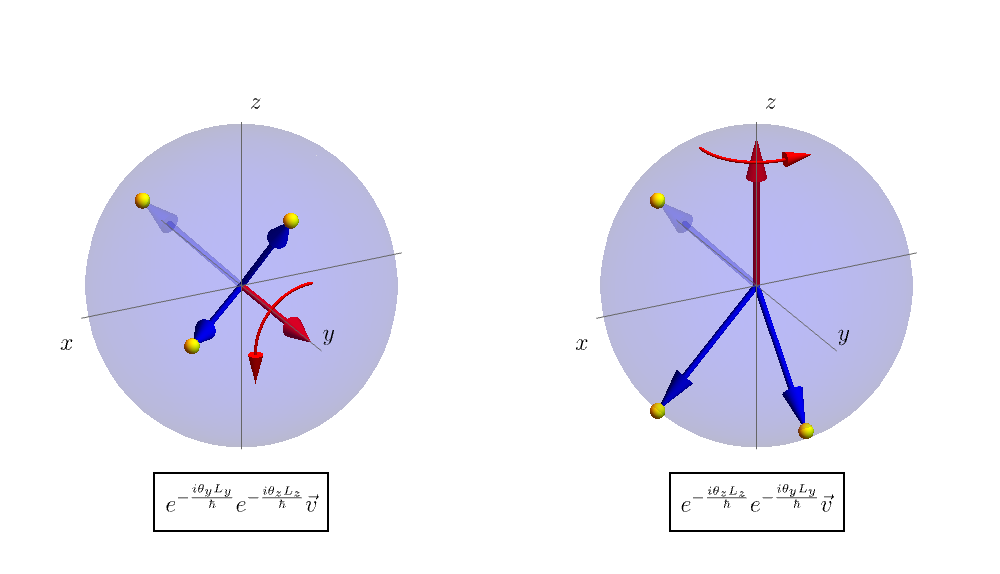
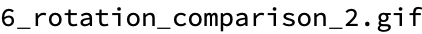

In [1305]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

modRot[v_,s_,ntheta_,label_]:=Module[{J,vpr,m,n,theta,dtheta,itheta,tblplt},
J={{{0,0,0},{0,0,-1},{0,1,0}},{{0,0,1},{0,0,0},{-1,0,0}},{{0,-1,0},{1,0,0},{0,0,0}}};
vpr=v;
n=s/Norm[s];
theta=Norm[s];
dtheta=theta/ntheta;
tblplt={};
For[itheta=0,itheta<=ntheta,itheta++,
AppendTo[tblplt,Show[
Plot3D[100,{x,-1.1,1.1},{y,-1.1,1.1},AxesLabel->MaTeX[{"x","y","z"}],AxesOrigin->{0,0,0},Boxed->False,BoxRatios->{1,1,1},ClippingStyle->None,Epilog->{Inset[Framed[Style[MaTeX[label]],Background->White],{0.5,0.05}]},ImageSize->250,PlotRange->{-1.1,1.1},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[{Blue,Opacity[0.15],Sphere[{0,0,0},1]}],
Graphics3D[{Red,Arrowheads[0.07],Arrow[Tube[{{0,0,0},n},0.02]]}],
Graphics3D[{Blue,Arrowheads[0.07],Arrow[Tube[{{0,0,0},v},0.02]]}],
Graphics3D[{Blue,Arrowheads[0.07],Arrow[Tube[{{0,0,0},vpr},0.02]]}],
Graphics3D[{Yellow,Sphere[vpr,0.05]}],
Graphics3D[{Red,Arrowheads[0],Arrow[Tube[Table[m=(v-(v.n)*n)/Norm[v-(v.n)*n];R=MatrixExp[thetapr*J.n];n+0.4*R.m,{thetapr,0,itheta*dtheta,theta/100}],0.01]]}],
Graphics3D[{Red,Arrowheads[0.05],Arrow[Tube[Table[m=(v-(v.n)*n)/Norm[v-(v.n)*n];R=MatrixExp[thetapr*J.n];RMax=MatrixExp[(itheta*dtheta)*J.n];n+0.4*R.m+0.2*Cross[n,RMax.m]/Norm[Cross[n,RMax.m]],{thetapr,0,itheta*dtheta,theta/100}],0]]}]
]];
If[itheta!=ntheta,vpr=MatrixExp[dtheta*J.n].vpr];
];
{vpr,tblplt}
];

tblplt1=tblplt2={};

ntheta=40;
v0={1,0,1};
v0=v0/Norm[v0];

s={0,0,0.5*Pi};
rot=modRot[v0,s,ntheta,"e^{- \\frac{i \\theta_z L_z}{\\hbar}} \\vec{v}"];
v1=rot[[1]];
AppendTo[tblplt1,rot[[2]]];
s={0,0.5*Pi,0};
rot=modRot[v1,s,ntheta,"e^{- \\frac{i \\theta_y L_y}{\\hbar}} e^{- \\frac{i \\theta_z L_z}{\\hbar}} \\vec{v}"];
v2=rot[[1]];
AppendTo[tblplt1,rot[[2]]];
tblplt1=Flatten[tblplt1];
tblplt1=Show[#,Graphics3D[{Blue,Opacity[0.15],Arrowheads[0.07],Arrow[Tube[{{0,0,0},v0},0.02]]}],Graphics3D[{Yellow,Sphere[v0,0.05]}],Graphics3D[{Blue,Opacity[0.15],Arrowheads[0.07],Arrow[Tube[{{0,0,0},v1},0.02]]}],Graphics3D[{Yellow,Sphere[v1,0.05]}],Graphics3D[{Blue,Opacity[0.15],Arrowheads[0.07],Arrow[Tube[{{0,0,0},v2},0.02]]}],Graphics3D[{Yellow,Sphere[v2,0.05]}]]&/@tblplt1;

s={0,0.5*Pi,0};
rot=modRot[v0,s,ntheta,"e^{- \\frac{i \\theta_y L_y}{\\hbar}} \\vec{v}"];
v1=rot[[1]];
AppendTo[tblplt2,rot[[2]]];
s={0,0,0.5*Pi};
rot=modRot[v1,s,ntheta,"e^{- \\frac{i \\theta_z L_z}{\\hbar}} e^{- \\frac{i \\theta_y L_y}{\\hbar}} \\vec{v}"];
v2=rot[[1]];
AppendTo[tblplt2,rot[[2]]];
tblplt2=Flatten[tblplt2];
tblplt2=Show[#,Graphics3D[{Blue,Opacity[0.15],Arrowheads[0.07],Arrow[Tube[{{0,0,0},v0},0.02]]}],Graphics3D[{Yellow,Sphere[v0,0.05]}],Graphics3D[{Blue,Opacity[0.15],Arrowheads[0.07],Arrow[Tube[{{0,0,0},v1},0.02]]}],Graphics3D[{Yellow,Sphere[v1,0.05]}],Graphics3D[{Blue,Opacity[0.15],Arrowheads[0.07],Arrow[Tube[{{0,0,0},v2},0.02]]}],Graphics3D[{Yellow,Sphere[v2,0.05]}]]&/@tblplt2;

tblplt=GraphicsGrid[{{#[[1]],#[[2]]}},ImageSize->500]&/@Transpose[{tblplt1,tblplt2}];
tblplt[[-1]]
Export["6_rotation_comparison_2.gif",tblplt]


-Graphics-
6_rotation_comparison_2_zoom.gif
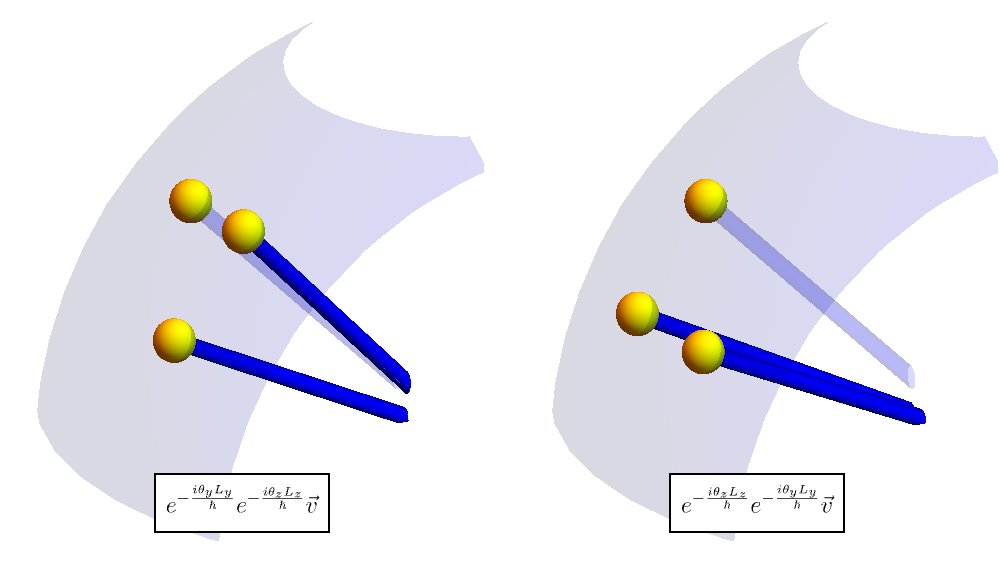
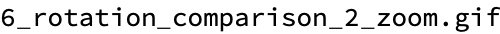

In [1336]:
ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

modRot[v_,s_,ntheta_,label_]:=Module[{J,vpr,m,n,theta,dtheta,itheta,tblplt},
J={{{0,0,0},{0,0,-1},{0,1,0}},{{0,0,1},{0,0,0},{-1,0,0}},{{0,-1,0},{1,0,0},{0,0,0}}};
vpr=v;
n=s/Norm[s];
theta=Norm[s];
dtheta=theta/ntheta;
tblplt={};
For[itheta=0,itheta<=ntheta,itheta++,
AppendTo[tblplt,Show[
Plot3D[100,{x,0.2,1},{y,-0.35,0.45},AxesLabel->MaTeX[{"x","y","z"}],AxesOrigin->{0,0,0},Boxed->False,BoxRatios->{1,1,1},ClippingStyle->None,Epilog->{Inset[Framed[Style[MaTeX[label]],Background->White],{0.5,0.05}]},ImageSize->250,PlotRange->{0.1,0.9},PlotRangeClipping->None,Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[{Blue,Opacity[0.15],Sphere[{0,0,0},1]}],
Graphics3D[{Red,Arrowheads[0],Arrow[Tube[{{0,0,0},n},0.02]]}],
Graphics3D[{Blue,Arrowheads[0],Arrow[Tube[{{0,0,0},v},0.02]]}],
Graphics3D[{Blue,Arrowheads[0],Arrow[Tube[{{0,0,0},vpr},0.02]]}],
Graphics3D[{Yellow,Sphere[vpr,0.05]}]
]];
If[itheta!=ntheta,vpr=MatrixExp[dtheta*J.n].vpr];
];
{vpr,tblplt}
];

tblplt1=tblplt2={};

ntheta=40;
v0={1,0,1};
v0=v0/Norm[v0];

s={0,0,0.3};
rot=modRot[v0,s,ntheta,"e^{- \\frac{i \\theta_z L_z}{\\hbar}} \\vec{v}"];
v1=rot[[1]];
AppendTo[tblplt1,rot[[2]]];
s={0,0.3,0};
rot=modRot[v1,s,ntheta,"e^{- \\frac{i \\theta_y L_y}{\\hbar}} e^{- \\frac{i \\theta_z L_z}{\\hbar}} \\vec{v}"];
v2=rot[[1]];
AppendTo[tblplt1,rot[[2]]];
tblplt1=Flatten[tblplt1];
tblplt1=Show[#,Graphics3D[{Blue,Opacity[0.15],Arrowheads[0],Arrow[Tube[{{0,0,0},v0},0.02]]}],Graphics3D[{Yellow,Sphere[v0,0.05]}],Graphics3D[{Blue,Opacity[0.15],Arrowheads[0],Arrow[Tube[{{0,0,0},v1},0.02]]}],Graphics3D[{Yellow,Sphere[v1,0.05]}],Graphics3D[{Blue,Opacity[0.15],Arrowheads[0],Arrow[Tube[{{0,0,0},v2},0.02]]}],Graphics3D[{Yellow,Sphere[v2,0.05]}]]&/@tblplt1;

s={0,0.3,0};
rot=modRot[v0,s,ntheta,"e^{- \\frac{i \\theta_y L_y}{\\hbar}} \\vec{v}"];
v1=rot[[1]];
AppendTo[tblplt2,rot[[2]]];
s={0,0,0.3};
rot=modRot[v1,s,ntheta,"e^{- \\frac{i \\theta_z L_z}{\\hbar}} e^{- \\frac{i \\theta_y L_y}{\\hbar}} \\vec{v}"];
v2=rot[[1]];
AppendTo[tblplt2,rot[[2]]];
tblplt2=Flatten[tblplt2];
tblplt2=Show[#,Graphics3D[{Blue,Opacity[0.15],Arrowheads[0],Arrow[Tube[{{0,0,0},v0},0.02]]}],Graphics3D[{Yellow,Sphere[v0,0.05]}],Graphics3D[{Blue,Opacity[0.15],Arrowheads[0],Arrow[Tube[{{0,0,0},v1},0.02]]}],Graphics3D[{Yellow,Sphere[v1,0.05]}],Graphics3D[{Blue,Opacity[0.15],Arrowheads[0],Arrow[Tube[{{0,0,0},v2},0.02]]}],Graphics3D[{Yellow,Sphere[v2,0.05]}]]&/@tblplt2;

tblplt=GraphicsGrid[{{#[[1]],#[[2]]}},ImageSize->500]&/@Transpose[{tblplt1,tblplt2}];
tblplt[[-1]]
Export["6_rotation_comparison_2_zoom.gif",tblplt]


-Graphics-
6_Larmor_slow_internal.gif
-Graphics3D-
6_Larmor_slow_external.gif
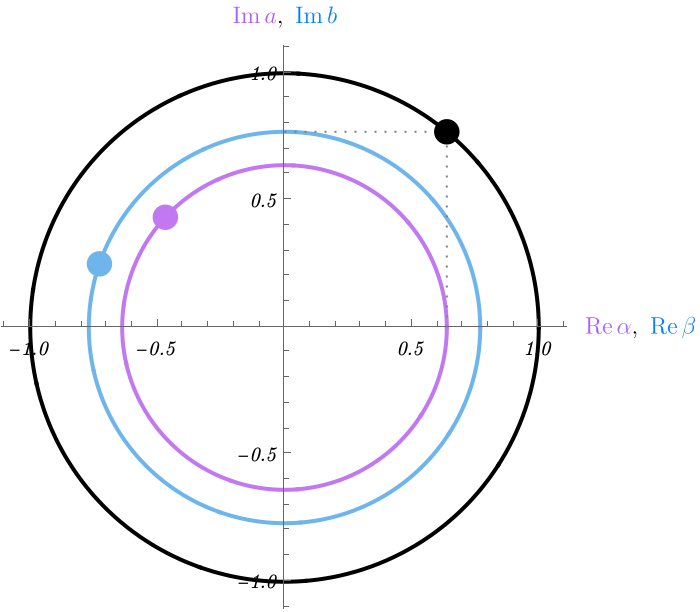
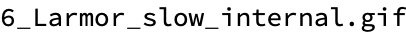
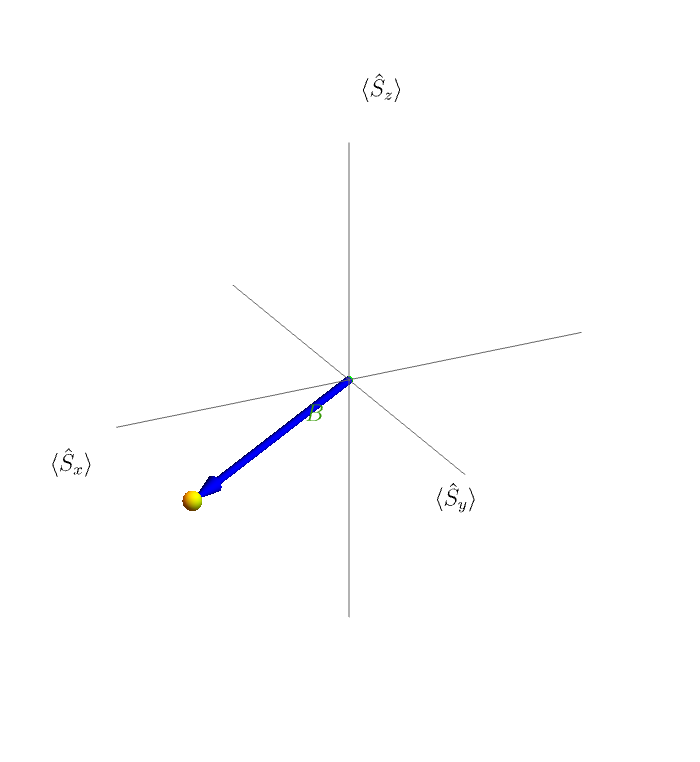
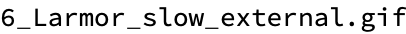

In [142]:
(* Larmor presession *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;
SetOptions[MaTeX,"Preamble"->{"\\usepackage{braket,color}\\usepackage[dvipsnames]{xcolor}"}];

B0=2;
alpha=Pi/6;
chi0={Cos[alpha/2],Sin[alpha/2]};
S={(1/2)*{{0,1},{1,0}},(1/2)*{{0,-I},{I,0}},(1/2)*{{1,0},{0,-1}}};
smoothHeaviside[t_,t1_,t2_]=HeavisideTheta[t-t1]*HeavisideTheta[t2-t]*Tanh[0.1*(t-t1)]^2*Tanh[0.1*(t2-t)]^2;
B[t_]={0,0,smoothHeaviside[t,0,120]}+{0,smoothHeaviside[t,60,240],0}+{smoothHeaviside[t,180,300],0,0};
H=-(1/2)*B[t].S;

chi=NDSolveValue[{I*chi'[t]==H.chi[t],chi[0]==chi0},chi,{t,0,320}];
SAve[t_]=ConjugateTranspose[chi[t]].#.chi[t]&/@S;

tblplt=Table[
{alpha1,alpha2,beta1,beta2}={Re[chi[t][[1]]],Im[chi[t][[1]]],Re[chi[t][[2]]],Im[chi[t][[2]]]};
{alpha,beta}={Abs[chi[t][[1]]],Abs[chi[t][[2]]]};
Show[
ParametricPlot[{Cos[theta],Sin[theta]},{theta,0,2*Pi},Epilog->{Gray,Dotted,Line[{{alpha,0},{alpha,beta}}],Line[{{0,beta},{alpha,beta}}],{ColorData["Pastel"][0],Disk[{alpha1,alpha2},0.05]},{ColorData["Pastel"][1],Disk[{beta1,beta2},0.05]},{Black,Disk[{alpha,beta},0.05]}},
AxesLabel->MaTeX[{"{\\color{Orchid} {\\rm Re} \, a},~{\\color{RoyalBlue} {\\rm Re} \, b}","{\\color{Orchid} {\\rm Im} \, a},~{\\color{RoyalBlue} {\\rm Im} \, b}"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->350,PlotStyle->Black],
ParametricPlot[alpha*{Cos[theta],Sin[theta]},{theta,0,2*Pi},PlotStyle->ColorData["Pastel"][0]],
ParametricPlot[beta*{Cos[theta],Sin[theta]},{theta,0,2*Pi},PlotStyle->ColorData["Pastel"][1]]
],
{t,1,320,0.5}];
tblplt[[-1]]
Export["6_Larmor_slow_internal.gif",tblplt]

tblplt=Table[
Show[
Plot3D[100,{x,-0.5,0.5},{y,-0.5,0.5},AxesLabel->MaTeX[{"\\braket{\\hat{S}_x}","\\braket{\\hat{S}_y}","\\braket{\\hat{S}_z}"}],AxesOrigin->{0,0,0},Boxed->False,BoxRatios->{1,1,1},ClippingStyle->None,Epilog->{Inset[Style[MaTeX["{\\color{OliveGreen} B}"]],{0.45,0.45}]},ImageSize->350,PlotRange->{-0.5,0.5},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[{Blue,Arrowheads[0.04],Arrow[Tube[{{0,0,0},SAve[t]},0.008]]}],
Graphics3D[{Green,Arrowheads[0.04],Arrow[Tube[{{0,0,0},0.5*B[t]},0.008]]}],
Graphics3D[{Yellow,Sphere[SAve[t],0.02]}],
ParametricPlot3D[SAve[tSub],{tSub,Max[t-10,0],t},PlotPoints->50,PlotStyle->Red]
],
{t,1,320,0.5}];
tblplt[[-1]]
Export["6_Larmor_slow_external.gif",tblplt]


-Graphics-
6_Larmor_fast_internal.gif
-Graphics3D-
6_Larmor_fast_external.gif
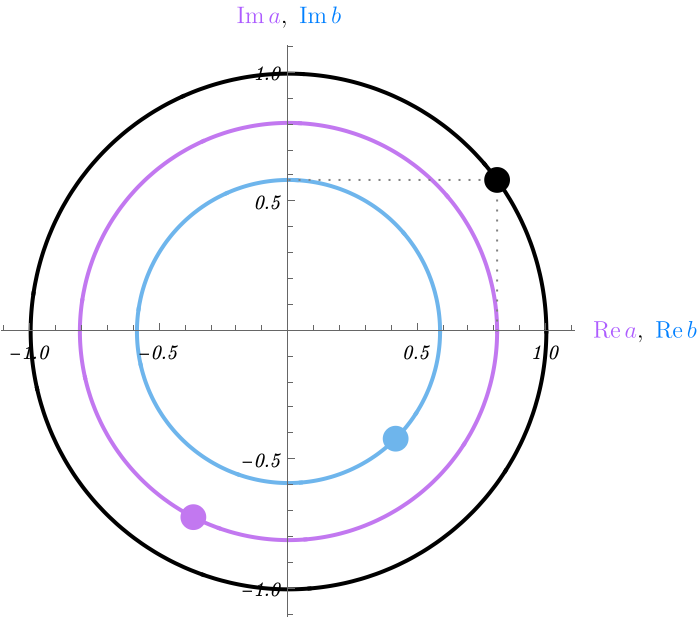
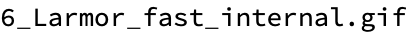
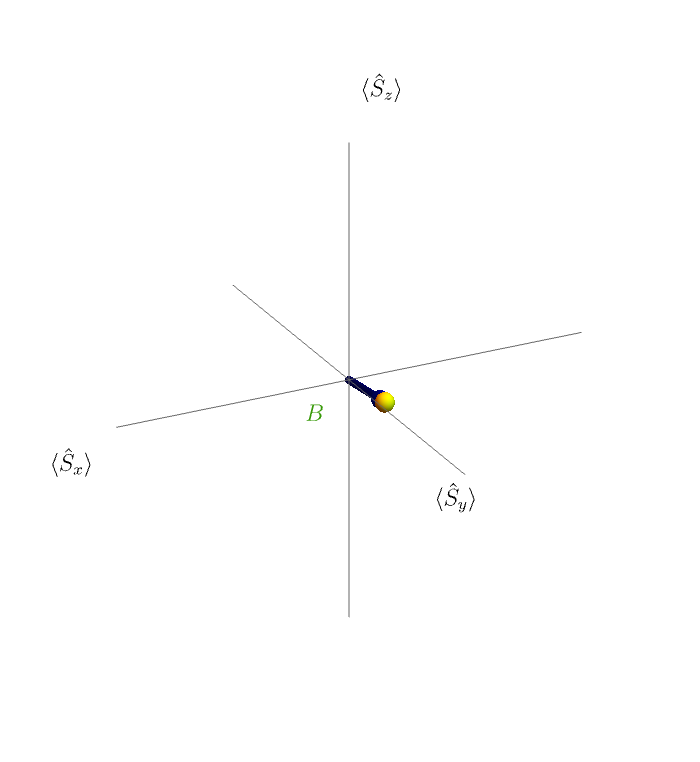
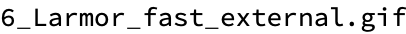

In [162]:
(* Larmor presession *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;
SetOptions[MaTeX,"Preamble"->{"\\usepackage{braket,color}\\usepackage[dvipsnames]{xcolor}"}];

B0=2;
alpha=Pi/6;
chi0={Cos[alpha/2],Sin[alpha/2]};
S={(1/2)*{{0,1},{1,0}},(1/2)*{{0,-I},{I,0}},(1/2)*{{1,0},{0,-1}}};
smoothHeaviside[t_,t1_,t2_]=HeavisideTheta[t-t1]*HeavisideTheta[t2-t]*Tanh[0.5*(t-t1)]^2*Tanh[0.5*(t2-t)]^2;
B[t_]={0,0,smoothHeaviside[t,0,120]}+{0,smoothHeaviside[t,60,240],0}+{smoothHeaviside[t,180,300],0,0};
H=-(1/2)*B[t].S;

chi=NDSolveValue[{I*chi'[t]==H.chi[t],chi[0]==chi0},chi,{t,0,320}];
SAve[t_]=ConjugateTranspose[chi[t]].#.chi[t]&/@S;

tblplt=Table[
{alpha1,alpha2,beta1,beta2}={Re[chi[t][[1]]],Im[chi[t][[1]]],Re[chi[t][[2]]],Im[chi[t][[2]]]};
{alpha,beta}={Abs[chi[t][[1]]],Abs[chi[t][[2]]]};
Show[
ParametricPlot[{Cos[theta],Sin[theta]},{theta,0,2*Pi},Epilog->{Gray,Dotted,Line[{{alpha,0},{alpha,beta}}],Line[{{0,beta},{alpha,beta}}],{ColorData["Pastel"][0],Disk[{alpha1,alpha2},0.05]},{ColorData["Pastel"][1],Disk[{beta1,beta2},0.05]},{Black,Disk[{alpha,beta},0.05]}},
AxesLabel->MaTeX[{"{\\color{Orchid} {\\rm Re} \, a},~{\\color{RoyalBlue} {\\rm Re} \, b}","{\\color{Orchid} {\\rm Im} \, a},~{\\color{RoyalBlue} {\\rm Im} \, b}"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->350,PlotStyle->Black],
ParametricPlot[alpha*{Cos[theta],Sin[theta]},{theta,0,2*Pi},PlotStyle->ColorData["Pastel"][0]],
ParametricPlot[beta*{Cos[theta],Sin[theta]},{theta,0,2*Pi},PlotStyle->ColorData["Pastel"][1]]
],
{t,1,320,0.5}];
tblplt[[-1]]
Export["6_Larmor_fast_internal.gif",tblplt]

tblplt=Table[
Show[
Plot3D[100,{x,-0.5,0.5},{y,-0.5,0.5},AxesLabel->MaTeX[{"\\braket{\\hat{S}_x}","\\braket{\\hat{S}_y}","\\braket{\\hat{S}_z}"}],AxesOrigin->{0,0,0},Boxed->False,BoxRatios->{1,1,1},ClippingStyle->None,Epilog->{Inset[Style[MaTeX["{\\color{OliveGreen} B}"]],{0.45,0.45}]},ImageSize->350,PlotRange->{-0.5,0.5},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[{Blue,Arrowheads[0.04],Arrow[Tube[{{0,0,0},SAve[t]},0.008]]}],
Graphics3D[{Green,Arrowheads[0.04],Arrow[Tube[{{0,0,0},0.5*B[t]},0.008]]}],
Graphics3D[{Yellow,Sphere[SAve[t],0.02]}],
ParametricPlot3D[SAve[tSub],{tSub,Max[t-10,0],t},PlotPoints->50,PlotStyle->Red]
],
{t,1,320,0.5}];
tblplt[[-1]]
Export["6_Larmor_fast_external.gif",tblplt]


-Graphics-
6_doublecover_internal.gif
-Graphics3D-
6_doublecover_external.gif
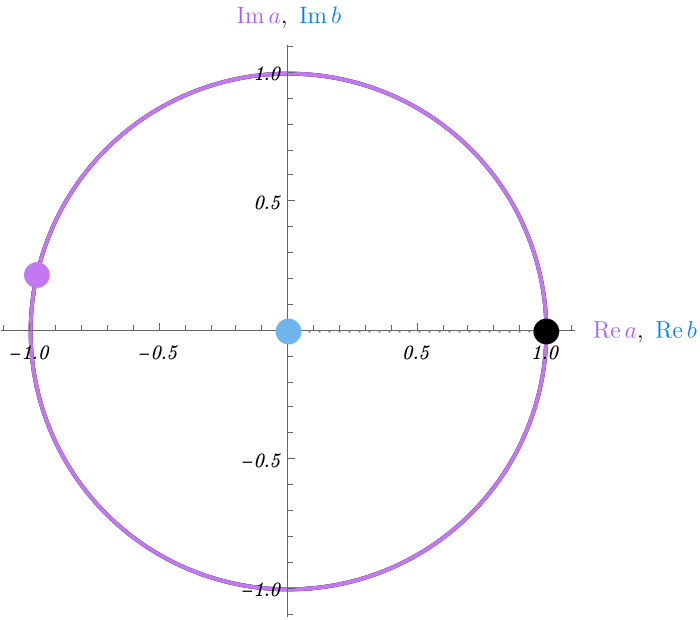
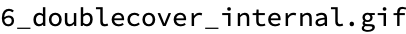
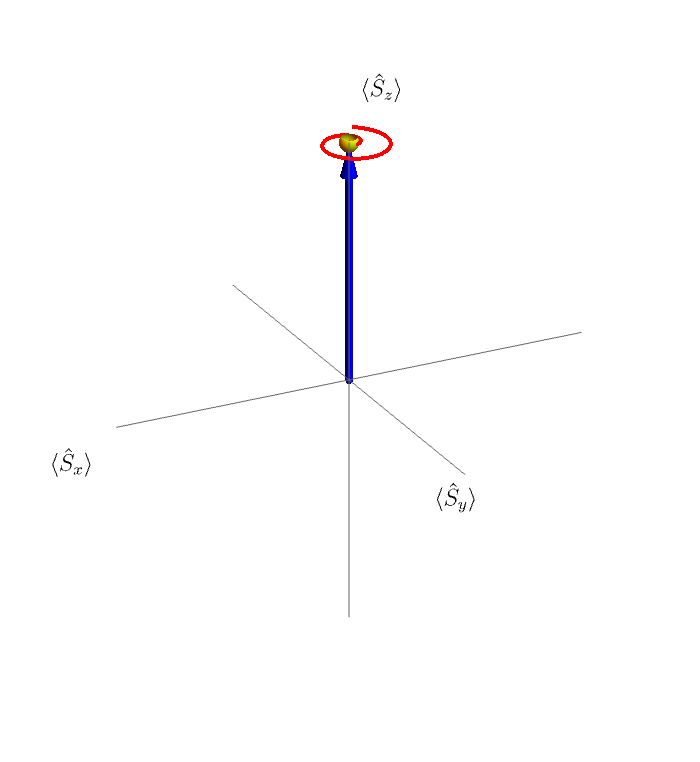
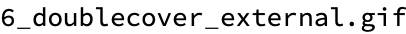

In [182]:
(* Double cover *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;
SetOptions[MaTeX,"Preamble"->{"\\usepackage{braket,color}\\usepackage[dvipsnames]{xcolor}"}];

B0=2;
alpha=Pi/6;
chi0={Cos[alpha/2],Sin[alpha/2]};
S={(1/2)*{{0,1},{1,0}},(1/2)*{{0,-I},{I,0}},(1/2)*{{1,0},{0,-1}}};
smoothHeaviside[t_,t1_,t2_]=HeavisideTheta[t-t1]*HeavisideTheta[t2-t]*Tanh[0.5*(t-t1)]^2*Tanh[0.5*(t2-t)]^2;
B[t_]={0,0,smoothHeaviside[t,0,120]}+{0,smoothHeaviside[t,60,240],0}+{smoothHeaviside[t,180,300],0,0};
H=-(1/2)*B[t].S;

chi[t_]={Abs[Cos[Pi*t/320]]*Exp[0.5*I*t],Abs[Sin[Pi*t/320]]*Exp[-0.5*I*t]};
SAve[t_]=ConjugateTranspose[chi[t]].#.chi[t]&/@S;

tblplt=Table[
{alpha1,alpha2,beta1,beta2}={Re[chi[t][[1]]],Im[chi[t][[1]]],Re[chi[t][[2]]],Im[chi[t][[2]]]};
{alpha,beta}={Abs[chi[t][[1]]],Abs[chi[t][[2]]]};
Show[
ParametricPlot[{Cos[theta],Sin[theta]},{theta,0,2*Pi},Epilog->{Gray,Dotted,Line[{{alpha,0},{alpha,beta}}],Line[{{0,beta},{alpha,beta}}],{ColorData["Pastel"][0],Disk[{alpha1,alpha2},0.05]},{ColorData["Pastel"][1],Disk[{beta1,beta2},0.05]},{Black,Disk[{alpha,beta},0.05]}},
AxesLabel->MaTeX[{"{\\color{Orchid} {\\rm Re} \, a},~{\\color{RoyalBlue} {\\rm Re} \, b}","{\\color{Orchid} {\\rm Im} \, a},~{\\color{RoyalBlue} {\\rm Im} \, b}"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->350,PlotStyle->Black],
ParametricPlot[alpha*{Cos[theta],Sin[theta]},{theta,0,2*Pi},PlotStyle->ColorData["Pastel"][0]],
ParametricPlot[beta*{Cos[theta],Sin[theta]},{theta,0,2*Pi},PlotStyle->ColorData["Pastel"][1]]
],
{t,0.001,320.001,0.5}];
tblplt[[-1]]
Export["6_doublecover_internal.gif",tblplt]

tblplt=Table[
Show[
Plot3D[100,{x,-0.5,0.5},{y,-0.5,0.5},AxesLabel->MaTeX[{"\\braket{\\hat{S}_x}","\\braket{\\hat{S}_y}","\\braket{\\hat{S}_z}"}],AxesOrigin->{0,0,0},Boxed->False,BoxRatios->{1,1,1},ClippingStyle->None,ImageSize->350,PlotRange->{-0.5,0.5},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[{Blue,Arrowheads[0.04],Arrow[Tube[{{0,0,0},SAve[t]},0.008]]}],
Graphics3D[{Yellow,Sphere[SAve[t],0.02]}],
ParametricPlot3D[SAve[tSub],{tSub,Max[t-10,0],t},PlotPoints->50,PlotStyle->Red]
],
{t,0.001,320.001,0.5}];
tblplt[[-1]]
Export["6_doublecover_external.gif",tblplt]


-Graphics-
6_Larmor_internal_material.pdf
-Graphics3D-
6_Larmor_external_material.pdf
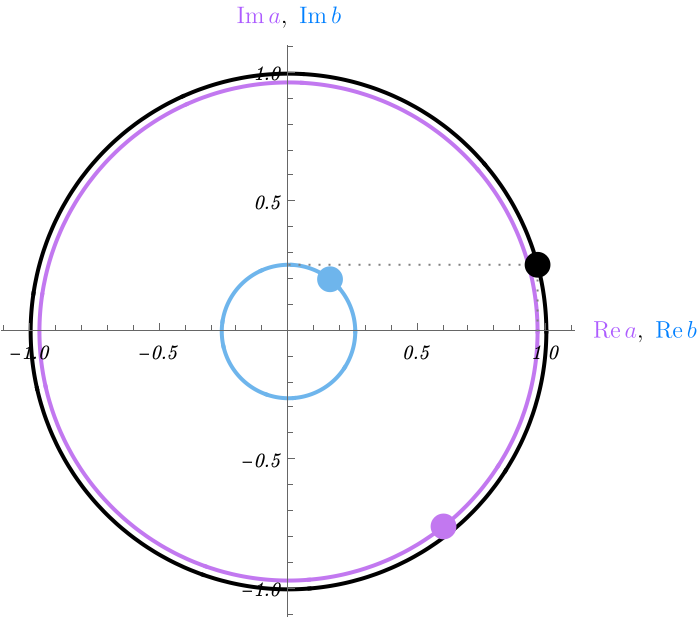
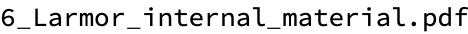
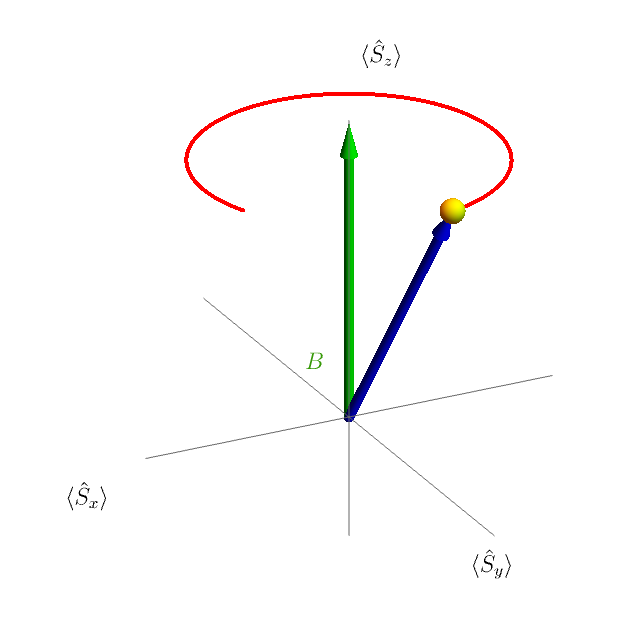
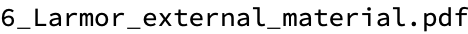

In [432]:
(* Larmor presession *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;
SetOptions[MaTeX,"Preamble"->{"\\usepackage{braket,color}\\usepackage[dvipsnames]{xcolor}"}];

B0=2;
alpha=Pi/6;
chi0={Cos[alpha/2],Sin[alpha/2]};
S={(1/2)*{{0,1},{1,0}},(1/2)*{{0,-I},{I,0}},(1/2)*{{1,0},{0,-1}}};
smoothHeaviside[t_,t1_,t2_]=HeavisideTheta[t-t1]*HeavisideTheta[t2-t]*Tanh[0.1*(t-t1)]^2*Tanh[0.1*(t2-t)]^2;
B[t_]={0,0,smoothHeaviside[t,0,120]}+{0,smoothHeaviside[t,60,240],0}+{smoothHeaviside[t,180,300],0,0};
H=-(1/2)*B[t].S;

chi=NDSolveValue[{I*chi'[t]==H.chi[t],chi[0]==chi0},chi,{t,0,31.5}];
SAve[t_]=ConjugateTranspose[chi[t]].#.chi[t]&/@S;

tblplt=Table[
{alpha1,alpha2,beta1,beta2}={Re[chi[t][[1]]],Im[chi[t][[1]]],Re[chi[t][[2]]],Im[chi[t][[2]]]};
{alpha,beta}={Abs[chi[t][[1]]],Abs[chi[t][[2]]]};
Show[
ParametricPlot[{Cos[theta],Sin[theta]},{theta,0,2*Pi},Epilog->{Gray,Dotted,Line[{{alpha,0},{alpha,beta}}],Line[{{0,beta},{alpha,beta}}],{ColorData["Pastel"][0],Disk[{alpha1,alpha2},0.05]},{ColorData["Pastel"][1],Disk[{beta1,beta2},0.05]},{Black,Disk[{alpha,beta},0.05]}},
AxesLabel->MaTeX[{"{\\color{Orchid} {\\rm Re} \, a},~{\\color{RoyalBlue} {\\rm Re} \, b}","{\\color{Orchid} {\\rm Im} \, a},~{\\color{RoyalBlue} {\\rm Im} \, b}"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ImageSize->350,PlotStyle->Black],
ParametricPlot[alpha*{Cos[theta],Sin[theta]},{theta,0,2*Pi},PlotStyle->ColorData["Pastel"][0]],
ParametricPlot[beta*{Cos[theta],Sin[theta]},{theta,0,2*Pi},PlotStyle->ColorData["Pastel"][1]]
],
{t,31.5,31.5,0.5}];
tblplt[[-1]]
Export["6_Larmor_internal_material.pdf",tblplt[[-1]]]

tblplt=Table[
Show[
Plot3D[100,{x,-0.5,0.5},{y,-0.5,0.5},AxesLabel->MaTeX[{"\\braket{\\hat{S}_x}","\\braket{\\hat{S}_y}","\\braket{\\hat{S}_z}"}],AxesOrigin->{0,0,0},Boxed->False,BoxRatios->{0.7,1,0.7},ClippingStyle->None,Epilog->{Inset[Style[MaTeX["{\\color{OliveGreen} B}"]],{0.45,0.45}]},ImageMargins->{{-40,-40},{-40,-20}},ImageSize->350,PlotRange->{{-0.35,0.35},{-0.5,0.5},{-0.2,0.5}},Ticks->None,ViewPoint->1000*{1,2,1}],
Graphics3D[{Blue,Arrowheads[0.04],Arrow[Tube[{{0,0,0},SAve[t]},0.008]]}],
Graphics3D[{Green,Arrowheads[0.04],Arrow[Tube[{{0,0,0},0.5*B[t]},0.008]]}],
Graphics3D[{Yellow,Sphere[SAve[t],0.02]}],
ParametricPlot3D[SAve[tSub],{tSub,Max[t-10,0],t},PlotPoints->50,PlotStyle->Red]
],
{t,31.5,31.5,0.5}];
tblplt[[-1]]
Export["6_Larmor_external_material.pdf",tblplt[[-1]]]


-Graphics-
6_Stern-Gerlach.gif
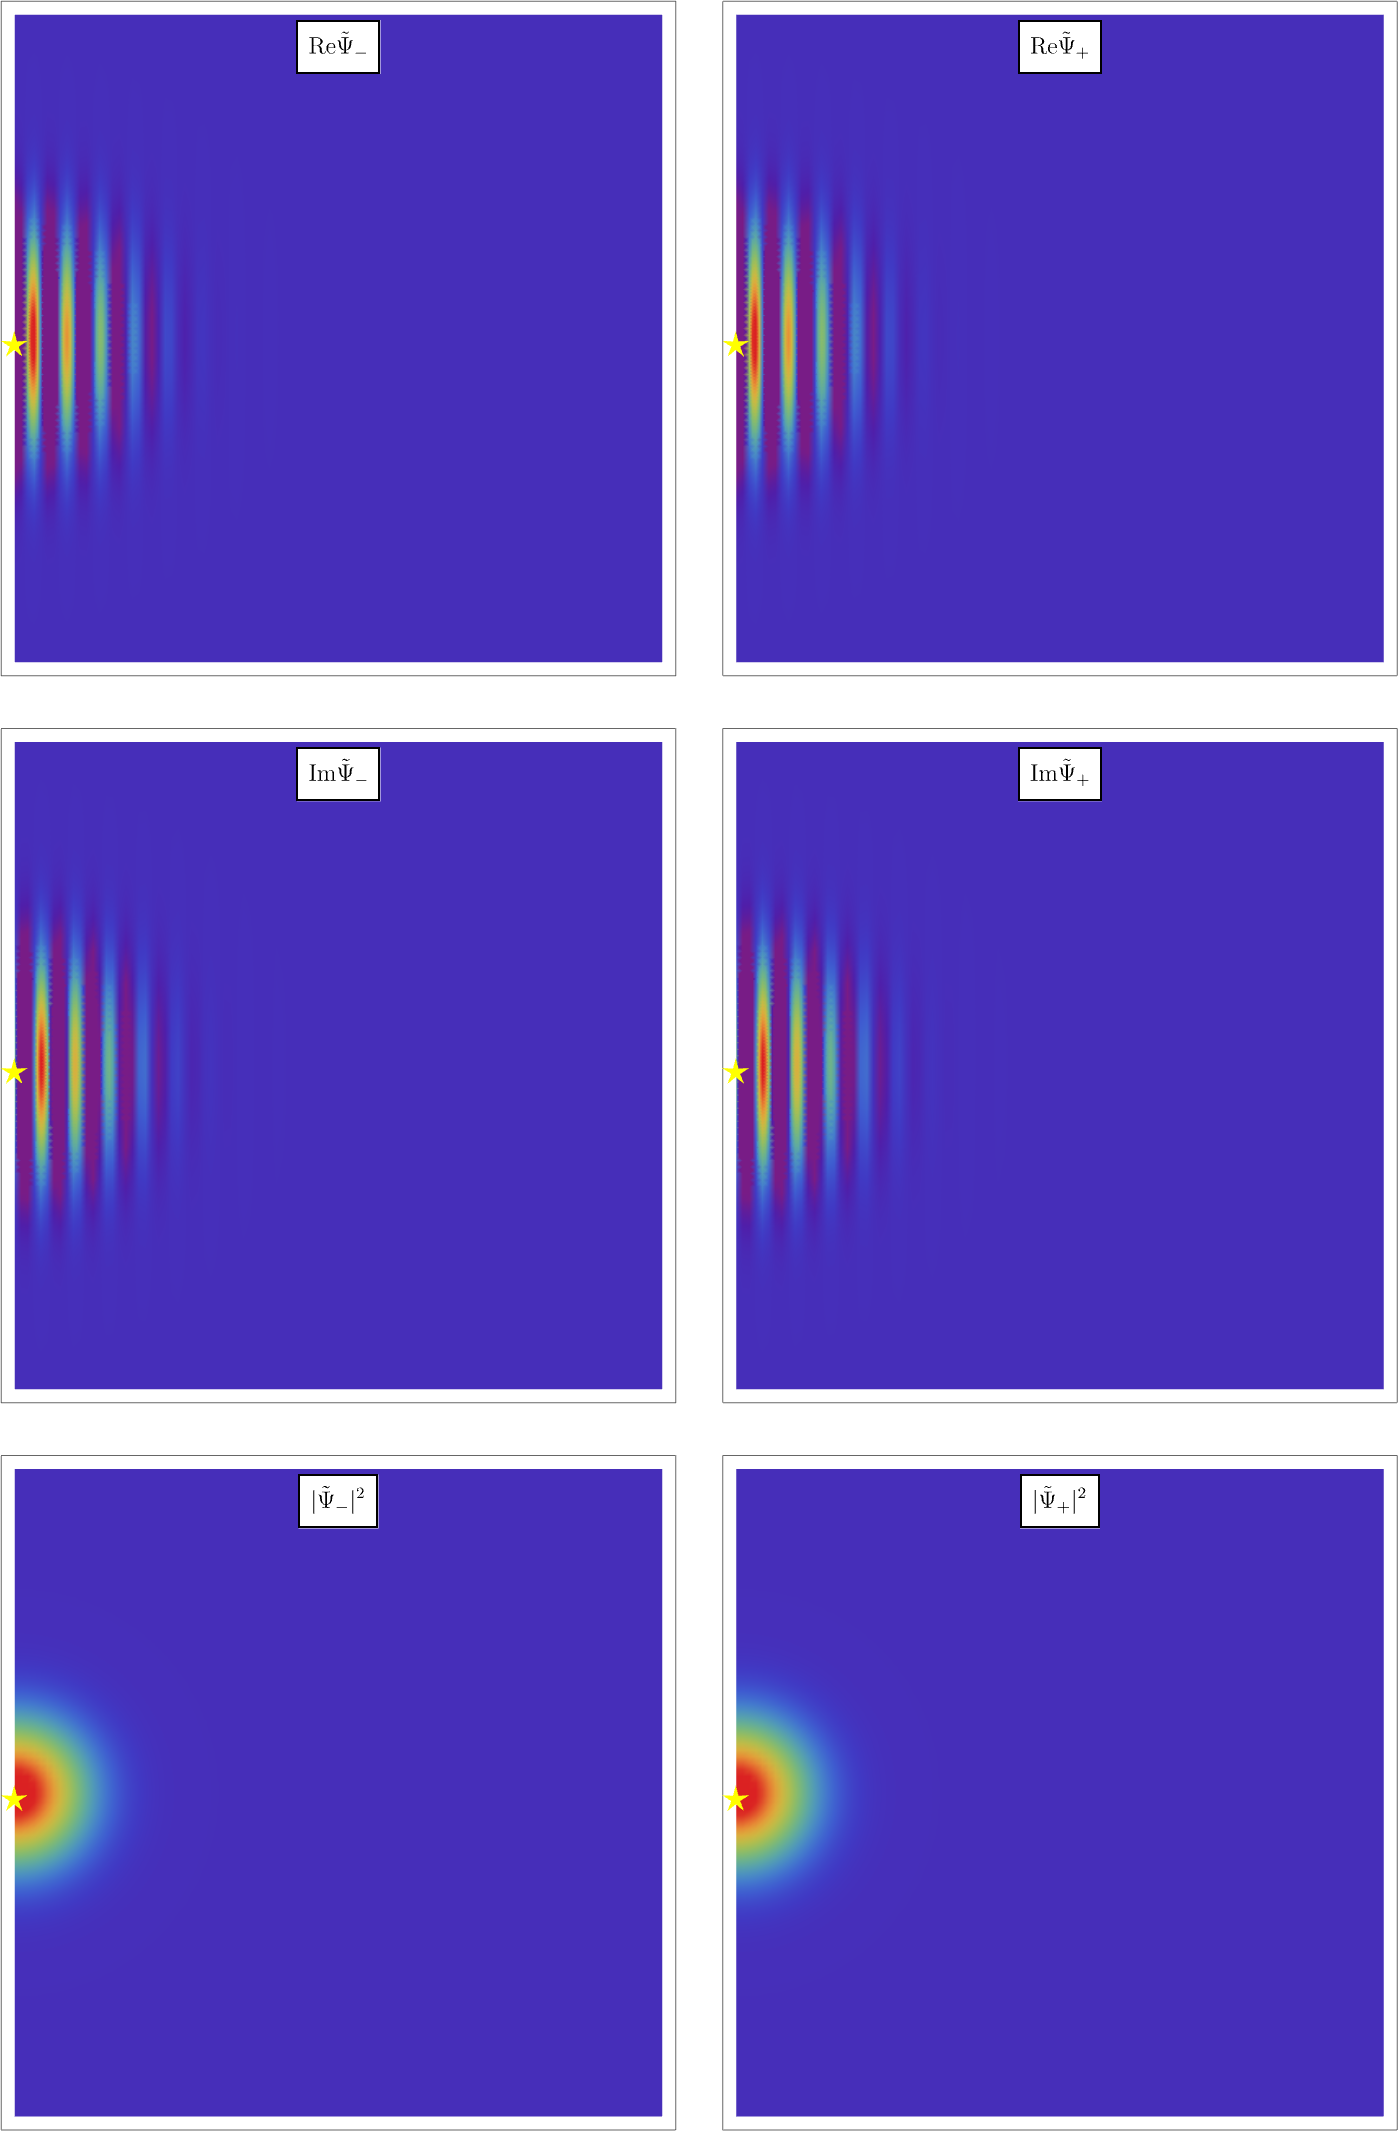
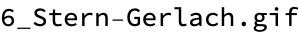

In [222]:
(* Stern-Gerlach *)
(* B0->Infinity limit, where oscillatory cross terms between PsiM and PsiP average out *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;

p=1.5;
alpha=0.01;
gamma=1;
PsiIni[x_,z_]=Exp[I*p*x]*Exp[-((x+L)^2+z^2)/128];

L=40;
tEnd=65;
{PsiM,PsiP}=NDSolveValue[{I*Derivative[1,0,0][PsiM][t,x,z]==-(1/2)*(Derivative[0,2,0][PsiM][t,x,z]+Derivative[0,0,2][PsiM][t,x,z])+(1/2)*gamma*alpha*z*PsiM[t,x,z],I*Derivative[1,0,0][PsiP][t,x,z]==-(1/2)*(Derivative[0,2,0][PsiP][t,x,z]+Derivative[0,0,2][PsiP][t,x,z])-(1/2)*gamma*alpha*z*PsiP[t,x,z],PsiM[0,x,z]==PsiIni[x,z],PsiM[t,x,-L]==PsiIni[x,-L],PsiM[t,x,L]==PsiIni[x,L],PsiM[t,-1.5*L,z]==PsiIni[-1.5*L,z],PsiM[t,2*L,z]==PsiIni[2*L,z],PsiP[0,x,z]==PsiIni[x,z],PsiP[t,x,-L]==PsiIni[x,-L],PsiP[t,x,L]==PsiIni[x,L],PsiP[t,2*L,z]==PsiIni[2*L,z],PsiP[t,-1.5*L,z]==PsiIni[-1.5*L,z]},{PsiM,PsiP},{x,-1.5*L,2*L},{z,-L,L},{t,0,tEnd},Method->{"MethodOfLines","SpatialDiscretization"->{"TensorProductGrid","MinPoints"->250,"MaxPoints"->250}},AccuracyGoal->3,PrecisionGoal->3];

tblplt=Table[
GraphicsGrid[
{xCM,zCM}=Sum[{x,z}*Abs[PsiM[t,x,z]]^2,{x,-1.5*L,2*L,L/50},{z,-L,L,L/50}]/Sum[Abs[PsiM[t,x,z]]^2,{x,-1.5*L,2*L,L/50},{z,-L,L,L/50}];
{xCP,zCP}=Sum[{x,z}*Abs[PsiP[t,x,z]]^2,{x,-1.5*L,2*L,L/50},{z,-L,L,L/50}]/Sum[Abs[PsiP[t,x,z]]^2,{x,-1.5*L,2*L,L/50},{z,-L,L,L/50}];
{{DensityPlot[Re[PsiM[t,x,z]],{x,-L,L},{z,-L,L},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.1+#]&),ColorFunctionScaling->None,Epilog->{Inset[Style["★",Yellow,24],{xCM,zCM}],Inset[Framed[MaTeX["{\\rm Re} \\tilde{\\Psi}_-"],Background->White,FrameStyle->Black],{0,0.9*L}]},FrameTicks->None,ImageSize->350,PlotPoints->100,PlotRange->All],DensityPlot[Re[PsiP[t,x,z]],{x,-L,L},{z,-L,L},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.1+#]&),ColorFunctionScaling->None,Epilog->{Inset[Style["★",Yellow,24],{xCP,zCP}],Inset[Framed[MaTeX["{\\rm Re} \\tilde{\\Psi}_+"],Background->White,FrameStyle->Black],{0,0.9*L}]},FrameTicks->None,ImageSize->350,PlotPoints->100,PlotRange->All]},{DensityPlot[Im[PsiM[t,x,z]],{x,-L,L},{z,-L,L},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.1+#]&),ColorFunctionScaling->None,Epilog->{Inset[Style["★",Yellow,24],{xCM,zCM}],Inset[Framed[MaTeX["{\\rm Im} \\tilde{\\Psi}_-"],Background->White,FrameStyle->Black],{0,0.9*L}]},FrameTicks->None,ImageSize->350,PlotPoints->100,PlotRange->All],DensityPlot[Im[PsiP[t,x,z]],{x,-L,L},{z,-L,L},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.1+#]&),ColorFunctionScaling->None,Epilog->{Inset[Style["★",Yellow,24],{xCP,zCP}],Inset[Framed[MaTeX["{\\rm Im} \\tilde{\\Psi}_+"],Background->White,FrameStyle->Black],{0,0.9*L}]},FrameTicks->None,ImageSize->350,PlotPoints->100,PlotRange->All]},{DensityPlot[Abs[PsiM[t,x,z]]^2,{x,-L,L},{z,-L,L},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.1+#]&),ColorFunctionScaling->None,Epilog->{Inset[Style["★",Yellow,24],{xCM,zCM}],Inset[Framed[MaTeX["|\\tilde{\\Psi}_-|^2"],Background->White,FrameStyle->Black],{0,0.9*L}]},FrameTicks->None,ImageSize->350,PlotPoints->100,PlotRange->All],DensityPlot[Abs[PsiP[t,x,z]]^2,{x,-L,L},{z,-L,L},BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.1+#]&),ColorFunctionScaling->None,Epilog->{Inset[Style["★",Yellow,24],{xCP,zCP}],Inset[Framed[MaTeX["|\\tilde{\\Psi}_+|^2"],Background->White,FrameStyle->Black],{0,0.9*L}]},FrameTicks->None,ImageSize->350,PlotPoints->100,PlotRange->All]}},
ImageSize->700],{t,0,tEnd,0.5}];
tblplt[[1]]
Export["6_Stern-Gerlach.gif",tblplt]


In [ ]:
7.Advanced topics

-Graphics-
7_Aharonov-Bohm.gif
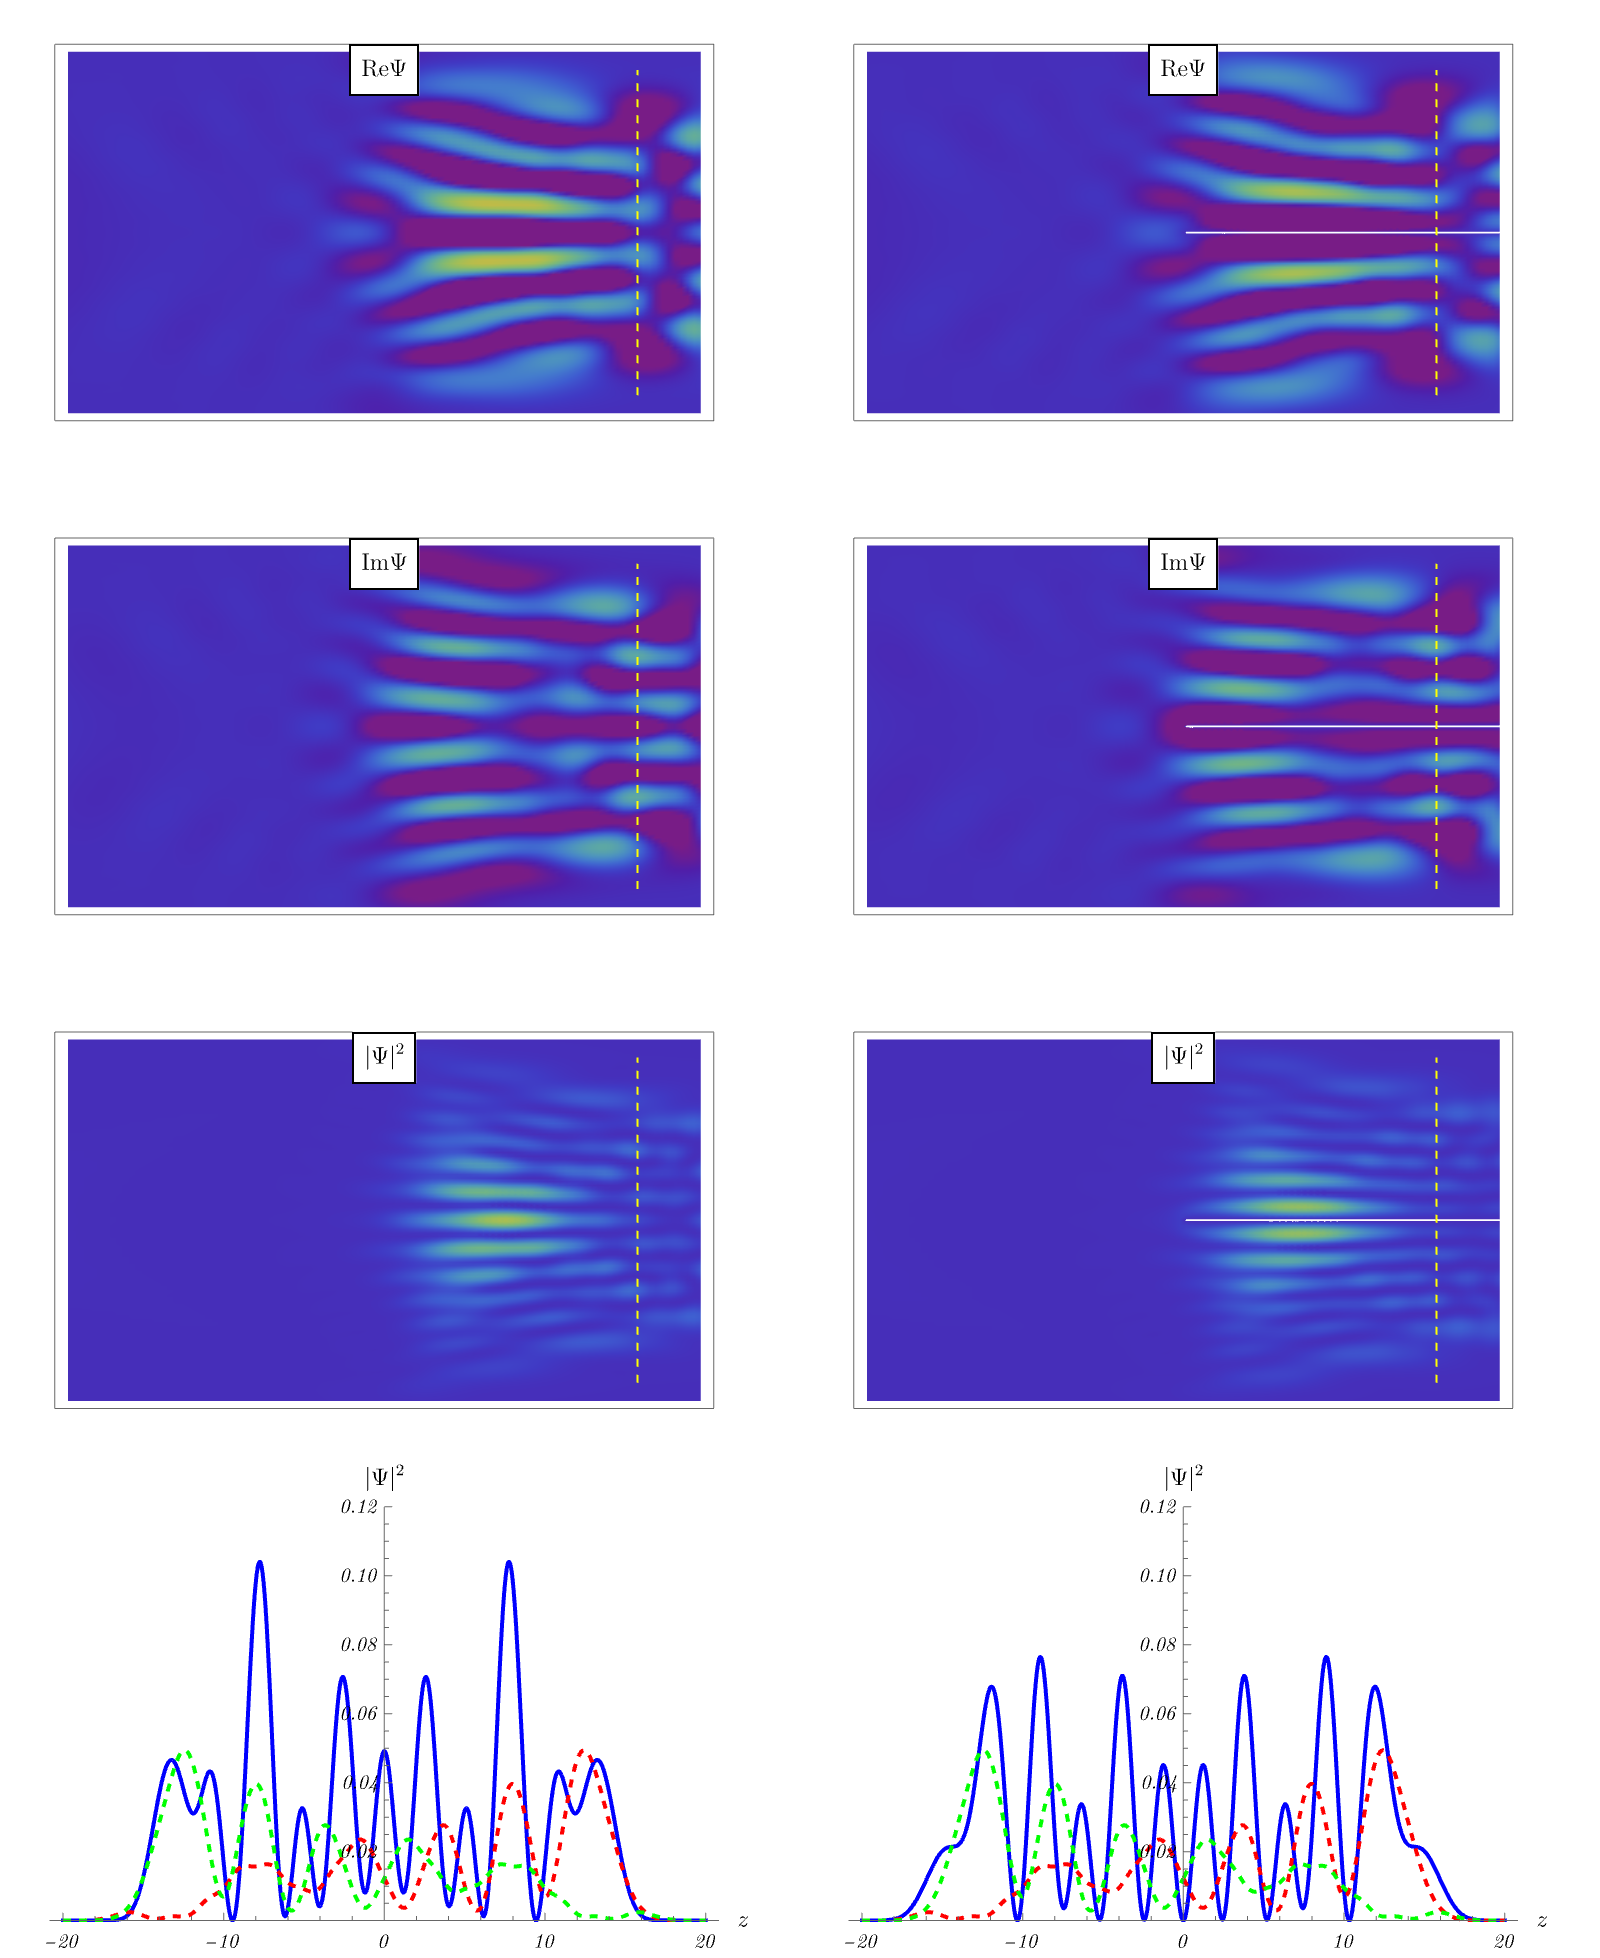
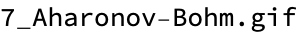

In [1]:
(* Aharonov-Bohm *)

ClearAll["Global`*"];
{konjo,akane,kogane,tokiwa,sora,niji,wakakusa,mikan}=RGBColor/@{"#192f60","#b7282e","#e6b422","#028760","#a0d8ef","#f6bfbc","#c3d825","#f08300"};
<<MaTeX`;
Off[NDSolveValue::ibcinc];

p=1;
V[x_,z_]=10*(-0.5*Exp[-(x/L)^2]*(z/L)^2/2+(z/L)^4/4);

L=20;
tEnd1=30;
PsiIni[x_,z_]=Exp[I*p*x]*Exp[-((x+L)^2+z^2)/32];
PsiSol1=NDSolveValue[{I*Derivative[1,0,0][Psi][t,x,z]==-(1/2)*(Derivative[0,2,0][Psi][t,x,z]+Derivative[0,0,2][Psi][t,x,z])+V[x,z]*Psi[t,x,z],Psi[0,x,z]==PsiIni[x,z],Psi[t,x,-L]==PsiIni[x,-L],Psi[t,x,2*L]==PsiIni[x,L],Psi[t,2*L,z]==PsiIni[2*L,z],Psi[t,-1.5*L,z]==PsiIni[-1.5*L,z]},Psi,{x,-1.5*L,2*L},{z,-L,L},{t,0,tEnd1},Method->{"MethodOfLines","SpatialDiscretization"->{"TensorProductGrid","MinPoints"->150,"MaxPoints"->150}},AccuracyGoal->3,PrecisionGoal->3];

tIni=tEnd1;
PsiIni[x_,z_]=((1+Tanh[z])/2)*PsiSol1[tIni,x,z];
tEnd=50;
PsiSol2=NDSolveValue[{I*Derivative[1,0,0][Psi][t,x,z]==-(1/2)*(Derivative[0,2,0][Psi][t,x,z]+Derivative[0,0,2][Psi][t,x,z])+V[x,z]*Psi[t,x,z],Psi[tIni,x,z]==PsiIni[x,z],Psi[t,x,-L]==PsiIni[x,-L],Psi[t,x,2*L]==PsiIni[x,L],Psi[t,2*L,z]==PsiIni[2*L,z],Psi[t,-1.5*L,z]==PsiIni[-1.5*L,z]},Psi,{x,-1.5*L,2*L},{z,-L,L},{t,tIni,tEnd},Method->{"MethodOfLines","SpatialDiscretization"->{"TensorProductGrid","MinPoints"->150,"MaxPoints"->150}},AccuracyGoal->3,PrecisionGoal->3];

PsiP[t_,x_,z_]:=If[t<tEnd1,((1+Tanh[z])/2)*PsiSol1[t,x,z],PsiSol2[t,x,z]];
PsiM[t_,x_,z_]:=PsiP[t,x,-z];
PsiTot[t_,x_,z_]:=PsiP[t,x,z]+PsiM[t,x,z];
PsiPMag[t_,x_,z_]:=Exp[-(I/2)*ArcTan[-(x-0.25*L),-z]]*PsiP[t,x,z];
PsiMMag[t_,x_,z_]:=Exp[(I/2)*ArcTan[-(x-0.25*L),-z]]*PsiM[t,x,z];
PsiTotMag[t_,x_,z_]:=PsiPMag[t,x,z]+PsiMMag[t,x,z];

tblplt=Table[
GraphicsGrid[{{
DensityPlot[Re[PsiTot[t,x,z]],{x,-L,1.5*L},{z,-L,L},AspectRatio->2/3.5,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.1+#]&),ColorFunctionScaling->None,Epilog->{{Yellow,Dashed,Line[{{1.25*L,-0.9*L},{1.25*L,0.9*L}}]},Inset[Framed[MaTeX["{\\rm Re} \\Psi"],Background->White,FrameStyle->Black],{0.25*L,0.9*L}]},FrameTicks->None,ImageSize->400,PlotPoints->100,PlotRange->All],
DensityPlot[Re[PsiTotMag[t,x,z]],{x,-L,1.5*L},{z,-L,L},AspectRatio->2/3.5,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.1+#]&),ColorFunctionScaling->None,Epilog->{{Yellow,Dashed,Line[{{1.25*L,-0.9*L},{1.25*L,0.9*L}}]},Inset[Framed[MaTeX["{\\rm Re} \\Psi"],Background->White,FrameStyle->Black],{0.25*L,0.9*L}]},FrameTicks->None,ImageSize->400,PlotPoints->100,PlotRange->All]
},{
DensityPlot[Im[PsiTot[t,x,z]],{x,-L,1.5*L},{z,-L,L},AspectRatio->2/3.5,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.1+#]&),ColorFunctionScaling->None,Epilog->{{Yellow,Dashed,Line[{{1.25*L,-0.9*L},{1.25*L,0.9*L}}]},Inset[Framed[MaTeX["{\\rm Im} \\Psi"],Background->White,FrameStyle->Black],{0.25*L,0.9*L}]},FrameTicks->None,ImageSize->400,PlotPoints->100,PlotRange->All],
DensityPlot[Im[PsiTotMag[t,x,z]],{x,-L,1.5*L},{z,-L,L},AspectRatio->2/3.5,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.1+#]&),ColorFunctionScaling->None,Epilog->{{Yellow,Dashed,Line[{{1.25*L,-0.9*L},{1.25*L,0.9*L}}]},Inset[Framed[MaTeX["{\\rm Im} \\Psi"],Background->White,FrameStyle->Black],{0.25*L,0.9*L}]},FrameTicks->None,ImageSize->400,PlotPoints->100,PlotRange->All]
},{
DensityPlot[Abs[PsiTot[t,x,z]]^2,{x,-L,1.5*L},{z,-L,L},AspectRatio->2/3.5,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.1+#]&),ColorFunctionScaling->None,Epilog->{{Yellow,Dashed,Line[{{1.25*L,-0.9*L},{1.25*L,0.9*L}}]},Inset[Framed[MaTeX["|\\Psi|^2"],Background->White,FrameStyle->Black],{0.25*L,0.9*L}]},FrameTicks->None,ImageSize->400,PlotPoints->100,PlotRange->All],
DensityPlot[Abs[PsiTotMag[t,x,z]]^2,{x,-L,1.5*L},{z,-L,L},AspectRatio->2/3.5,BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunction->(ColorData["Rainbow"][0.1+#]&),ColorFunctionScaling->None,Epilog->{{Yellow,Dashed,Line[{{1.25*L,-0.9*L},{1.25*L,0.9*L}}]},Inset[Framed[MaTeX["|\\Psi|^2"],Background->White,FrameStyle->Black],{0.25*L,0.9*L}]},FrameTicks->None,ImageSize->400,PlotPoints->100,PlotRange->All]
},{
Plot[{Abs[PsiTot[t,1.25*L,z]]^2,Abs[PsiP[t,1.25*L,z]]^2,Abs[PsiM[t,1.25*L,z]]^2},{z,-L,L},AxesLabel->MaTeX[{"z","|\\Psi|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunctionScaling->None,ImageSize->400,PlotRange->{0,0.12},PlotStyle->{Blue,{Red,Dashed},{Green,Dashed}}],
Plot[{Abs[PsiTotMag[t,1.25*L,z]]^2,Abs[PsiPMag[t,1.25*L,z]]^2,Abs[PsiMMag[t,1.25*L,z]]^2},{z,-L,L},AxesLabel->MaTeX[{"z","|\\Psi|^2"}],BaseStyle->{FontFamily->"Latin Modern Roman"},ColorFunctionScaling->None,ImageSize->400,PlotRange->{0,0.12},PlotStyle->{Blue,{Red,Dashed},{Green,Dashed}}]
}},ImageSize->800,Spacings->0]
,{t,0,tEnd,1}];
tblplt=Join[tblplt,Table[tblplt[[-1]],{i,1,50}]];
tblplt[[-1]]
Export["7_Aharonov-Bohm.gif",tblplt]
